In [9]:
import pandas as pd
import numpy as np
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [17]:
# with open("NCDLRI_Total.json",'r') as load_f:
with open("../3_Mortality/NCDLRI_Total.json",'r') as load_f:
    NCDLRI_Total = json.load(load_f)
Country = list(NCDLRI_Total.keys())

In [18]:
A = ['agr','ene','ind','nrtr','rcor','rcoc','rcoo','shp','slv','wst']

## The first country

In [35]:
i = 'AFG' # the first country
j = 'agr' # the first sector
shp = gpd.read_file(r'output' + '/' + 'output' + '_' + i + '/' + i + '_'+j + '.' + 'shp')
for j in A[1:]:
    read_shp = gpd.read_file(r'output' + '/' + 'output' + '_' + i + '/' + i + '_'+j + '.' + 'shp')
    shp['TotalPM25'] += read_shp['TotalPM25']

In [ ]:
Concentration_Production = pd.DataFrame({'AFG':list(shp['TotalPM25'])})

## The following country

In [39]:
for i in Country[1:]:
    j = 'agr'
    shp = gpd.read_file(r'output' + '/' + 'output' + '_' + i + '/' + i + '_'+j + '.' + 'shp')
    for j in A[1:]:
        read_shp = gpd.read_file(r'output' + '/' + 'output' + '_' + i + '/' + i + '_'+j + '.' + 'shp')
        shp['TotalPM25'] += read_shp['TotalPM25']
    Concentration_Production[i] = shp['TotalPM25']

In [ ]:
Concentration_Production.to_csv('comparison/Concentration_Production.csv')

## Test

In [19]:
# shp = gpd.read_file(r'C:/Users/15311/Desktop/output_FJI/FJI_agr.shp')
# for j in A[1:3]:
#     read_shp = gpd.read_file(r'C:/Users/15311/Desktop' + '/' + 'output' + '_' + 'FJI' + '/' + 'FJI' + '_'+j + '.' + 'shp')
#     shp['BasePM25'] += read_shp['BasePM25']

In [27]:
# abc = pd.DataFrame({'FJI':list(shp['BasePM25'])})

In [29]:
# abc['AWO'] = shp['BasePM25'] * 3

In [40]:
# abc.to_csv('abc.csv')

In [41]:
# output = pd.read_csv('abc.csv',index_col=0)

In [43]:
# output

FJI        AWO
0       1.279253   3.837758
1       1.524796   4.574388
2       1.652946   4.958838
3       2.042323   6.126968
4       3.175905   9.527715
...          ...        ...
273734  6.505962  19.517886
273735  7.768081  23.304244
273736  7.768081  23.304244
273737  7.269791  21.809372
273738  7.269791  21.809372

[273739 rows x 2 columns]

# Check whether
<br>
## wholewolrd concentrations = summation of all countries' concentrations
<br>
## Production concentrations = consumption concentrations

In [96]:
# fraction = pd.read_csv('C:/Users/15311/Desktop/baseline_fraction_Hbar2.csv')

In [5]:
bio = gpd.read_file('C:/Users/15311/Desktop/output_wholeworld/wholeworld_bio.shp')

In [6]:
# For ROW
fraction = gpd.read_file('C:/Users/15311/Desktop/output_wholeworld/wholeworld_bio.shp')
A = ['agr','ene','ind','nrtr','rcor','rcoc','rcoo','shp','slv','wst']
for j in A:
    read_shp = gpd.read_file(r'C:/Users/15311/Desktop/output_wholeworld/wholeworld_' + j + '.' + 'shp')
    fraction['TotalPM25'] += read_shp['TotalPM25']

In [3]:
concentration_consumption = pd.read_csv('C:/Users/15311/Desktop/concentration_matrix.csv',header=None)

In [4]:
concentration_production = pd.read_csv('C:/Users/15311/Desktop/Concentration_Production.csv',index_col=0)

In [32]:
concentration_production['ROW']

0         0.000273
1         0.000325
2         0.000502
3         0.000490
4         0.001170
            ...   
273734    1.250272
273735    3.592422
273736    4.549325
273737    5.430701
273738    5.778483
Name: ROW, Length: 273739, dtype: float64

In [27]:
concentration_production2 = concentration_production.drop(['HKG','MAC'],axis=1)

In [120]:
concentration_production.sum(axis=1)

0          0.000391
1          0.000410
2          0.000542
3          0.000515
4          0.001187
            ...    
273734     5.776610
273735    16.763617
273736    22.581054
273737    27.622078
273738    27.981516
Length: 273739, dtype: float64

In [121]:
concentration_consumption.sum(axis=1)

0          0.000391
1          0.000410
2          0.000542
3          0.000515
4          0.001187
            ...    
273734     5.776610
273735    16.763617
273736    22.581054
273737    27.622078
273738    27.981516
Length: 273739, dtype: float64

In [137]:
fraction['TotalPM25']

0          0.000450
1          0.000445
2          0.000558
3          0.000522
4          0.001191
            ...    
273734     5.270067
273735    13.430766
273736    18.255088
273737    22.391111
273738    22.422321
Name: TotalPM25, Length: 273739, dtype: float64

In [124]:
(concentration_production.sum(axis=1) - concentration_consumption.sum(axis=1))

-7.936699040762395e-09

In [110]:
concentration_production.sum(axis=1)

0          0.000391
1          0.000410
2          0.000542
3          0.000515
4          0.001187
            ...    
273734     5.776610
273735    16.763617
273736    22.581054
273737    27.622078
273738    27.981516
Length: 273739, dtype: float64

In [146]:
count=0
for i in list(fraction['TotalPM25'] - concentration_production.sum(axis=1)):
    if i > 0:
        count+=1
        print(i)

5.8740616877212015e-05
3.535809021489164e-05
1.5393971633887436e-05
7.742736262780054e-06
3.59199549412317e-06
1.7689466168886898e-06
2.1367603778327682e-06
5.694019517260302e-06
2.1127632404466593e-05
9.358262008591495e-05
0.000545459154942321
0.0007062388140922637
0.0004551429456839118
0.000869043074372744
0.0022069563655911506
0.005645640709483812
0.01529451903578588
0.0293432588830001
0.04721954911565762
0.03573898410475468
0.026430530818546072
0.03061794967042747
0.0423068827195604
0.044069206850487874
0.041129883429173786
0.03842746394072072
0.031058934458776166
0.019831161500016847
0.009414576575329292
0.0038634095666336687
0.0016782411906423045
0.0007946133479259654
0.0006184576485108728
0.001139192742527162
0.0035370632005089497
0.008436164836446158
0.02003060930048728
0.033902364111148775
0.08207999036559865
0.03260872323741282
0.010877990692553158
0.0036579366110928158
0.0008922231405020312
0.00014801240205532446
0.05210261170164865
0.11762546505201843
8.35483019384724e-05
4

0.9165104498126073
1.00812443772789
0.9698841764921102
0.8826178389994528
0.7617153472325082
0.036261643244202446
0.03488630663845438
0.028765804411567508
0.029259095539696744
0.029644138254961483
0.030204923702803477
0.8626465744812908
0.8404643331212007
1.0562455859519027
1.0723620615426164
1.0841394393266093
1.081856544643987
1.0693863294021533
1.042547046087936
0.25753953104725635
0.3171632875417414
0.40819059129666435
0.489365621756332
0.7497862633529788
0.6164499945969126
0.4452970256535922
0.2681001010454982
0.037597068330744055
0.03192514078727271
0.033958900705473916
0.0417340442404992
0.04375246435570457
0.7095564593005594
0.7690200887539742
0.841203076808954
0.8573960739337672
0.8989774194138125
0.9505965789268078
1.0456280747122761
1.097712791439072
1.1417560832600806
1.1717344751811218
1.1224843620964293
1.069547454844333
0.9743416999899832
0.8702540017819196
0.6126459438105343
0.8555505302326658
1.226395648768552
1.2267611649264474
1.247072084143106
0.03693674143637704
0.

0.9927807113105729
0.9858085454563152
0.9310948636614356
0.8901040758491519
0.833443977864853
0.8050027304180531
0.8439490501500373
0.912843363433943
1.0034790354946281
1.1108426979983719
1.4138558713691225
1.70831177649098
1.9538906136671201
2.1815290469864337
2.417579809801275
2.690848038287072
3.023990333510504
3.3301884117086047
3.9005453195486375
4.215538587842374
3.9857913897428325
1.069204011512781
0.9955066896338849
0.9250661204898449
0.891909641857751
0.9306865901798176
1.0042465334096846
1.1006394780776105
1.2163608811714681
1.5535366138283564
1.8732917818089874
2.137539889822804
2.3828949392582572
2.645078002069198
2.9822290897322645
4.055263638214388
4.021823154975272
3.5446183990319255
4.113905000025308
1.1860450558390028
1.1185229182342198
1.0444588138951474
1.0103929436452006
1.0513874595516768
1.1301240265947712
1.2327950879428755
1.3565859785218493
1.7341700414471575
2.082318685134126
2.365086247756679
2.621837197697694
2.8857723311356267
3.1916429331063156
4.127716586

0.19096852736461845
0.16885364259206082
0.17699505225817713
4.171130242717265
11.658300540912855
1.1893563531805156
0.9076086462731898
0.44652902936546557
0.4012571121823485
0.5846045808152234
0.4905118851196013
0.23640676461313426
0.2399864621029435
0.24885936341017434
0.2586460841131686
8.324792351515931
8.335051383241094
1.3171592365216798
1.2738825153920423
0.2411015009347608
0.2699816457655473
0.24418455755688484
0.24687690858104627
0.2457235334696639
0.25234695629614023
0.24316573573505362
0.26224110549291524
0.2484441240398496
0.25143635180111357
0.2461872837667256
0.2544731144870518
7.899355774144746
1.2429890883617483
0.2529622292866289
0.2921987603193106
7.734936800486171
7.675438091141612
0.24819968169046547
0.2572205750237506
7.713063650844054
0.25195956874534886
0.25591617657216936
0.2677262678638517
7.528667754143542
7.4638688635292905
0.25047226366375597
0.25946446802084466
7.504936841561332
1.3056986187166362
1.2624295380031132
0.2547063632409481
0.28242698258679066
7.3

7.421851215556098
7.337859034583592
7.210551568225691
7.070324938618206
6.596491030096607
6.548834332099848
2.3161213377380956
2.6892450562582213
2.636816021454427
2.5175240804467234
2.41317631361481
7.775207774645089
7.811682095190399
7.52473668487068
7.117359656511587
2.688386910693829
2.6339984642588945
2.5168972365573357
2.386066499921532
4.739227868461557
6.379778930903657
6.469580567500546
5.693841426931176
7.141662686659993
6.159845068166864
4.926526221353013
4.359262430271949
2.7791528951460984
6.6305282370435235
6.614733230697466
6.599434594577103
6.5489377884563345
2.498397703200202
2.351051045319115
2.6326153382429522
6.6123809358036425
6.581885719862486
6.559337409800563
6.5081889690585655
2.4582178515447723
2.330748305878443
7.812023329663155
7.40230359003008
6.35982841840853
2.2278653486534834
6.54077154102095
6.481133898509663
6.458320415487689
6.435889649584836
2.5149310408619465
2.3254568072537958
6.308768384237243
6.201629562023652
6.184978729825774
6.22248688106558
4

5.555722902582254
3.1008867323086324
2.7618601628340986
2.2207994983584953
1.0872216469878788
1.0991322697530093
1.2597454400655357
1.3355876324695055
2.1942985909163433
0.8877767496958651
0.8804430601193562
0.6876453867999883
0.6555407996940339
0.5513252475308148
0.5879844052297267
3.0407148023149215
2.9465458777925324
3.0826427514750563
3.072668106163043
2.2225216598595203
2.1980766065100497
2.2190544563125503
2.2231156389017155
0.513624583666024
0.5059653657899617
0.5084734362370984
0.5206288285400493
3.1664960628111505
3.0793173200713753
2.204500289419787
2.2210344339469117
0.5825389494246842
0.5503527945450273
0.565296704131093
0.5729589550775902
0.591562454003725
0.6155371263039076
3.13355672147199
3.028460555868275
3.1515815197618124
3.13858487661134
2.2217705695235495
2.200890352967434
2.2369093345438475
2.238509331111036
0.5382475308019758
0.5315991693046946
0.5354142307605674
0.5499961474615578
7.6368816204809065
7.156951552441882
6.430777862498855
1.606140264771371
1.0971208

1.2557425515474172
1.2090864798989411
1.0869560599264148
1.0590603443831963
1.065053621329021
0.8506820804806488
1.6991580820808565
1.7034459255448766
1.7575706527131487
1.722841437356987
1.6561391472564218
1.6549520713080543
1.4194240438476324
1.3903011993250782
1.400744086152315
1.4153888253773346
1.5194615172309405
1.5002182807754316
1.4688998229488668
1.4700889182180283
1.475574491743565
1.4834436889612377
1.6286269460082927
1.5840424945199096
1.123391784387886
1.1162254518395134
1.0428760012736635
1.0350000103648558
1.0144323355351812
0.9935800681672227
0.9696811846874205
0.9441360110364254
1.8467766747797825
1.6554425676840214
1.3539417475224944
1.3293395704074893
1.3193238002057388
1.3073498820820717
1.2945591395564602
1.296901482752645
1.3340526047613466
1.4326988408546022
1.6605622767959858
1.7608306661951652
1.5411171022691263
1.4614451411206666
1.4991642119732767
1.5298027959499585
1.469508774572244
1.434449619588051
1.1454149147591508
1.0385037676090487
1.743184126939429
1.

1.2414755847521448
1.205772441316988
1.1506439234980874
1.1231615295425286
1.0475007364490558
1.0415791944485306
1.0400715721624358
1.0454135885536822
0.7815923991669571
0.7875003798400506
7.301702189170239
3.1972524034066403
1.5500821115490595
1.6835653544417184
1.8112527355115873
1.069006333279674
1.0598489028302858
0.9407379494834132
0.8598189825141169
0.7851119833520475
0.7811050648388473
1.192838955752677
1.546332459507413
1.6219118330521471
1.5237497090197838
1.5782888155589418
2.0344458551248543
0.5001178771701218
0.4837187614922156
13.453131403554654
14.823607220614367
3.509532700457193
3.427656771330625
2.1519290206628128
2.2188411088172586
1.6832661302417975
1.5398151658206984
1.2044761656328173
1.212332834485954
1.6203235060596803
1.6582324151158083
1.730443881210622
1.8251123394618851
11.577251712538132
3.653235407672078
1.831699720279964
1.8323588431992093
1.9072910279488866
1.9626449495906257
2.081398236026061
1.4020770454271343
1.2582733362482657
1.1545943211398466
1.059

1.4851996018962836
1.6533712025119485
1.5611167527774796
1.4889689414339955
1.4331834461452218
1.3907818275490058
1.360002208445053
1.3382720586612038
1.3229223446081164
1.3090910447852764
1.2842956683168154
1.293402447961796
1.326124664868587
1.3787838407599224
1.4469394131327817
1.5084954269007653
1.6233177300159127
1.7305937138575018
2.0750573786009454
1.9385872186364281
1.6917068339089383
1.5982700695018792
1.5234471360672899
1.4908513788012385
1.3924317170962865
1.3646368360566683
1.3852464629980616
1.3966128899435546
1.4238528300922795
1.4375238289008028
4.155926164571362
4.766012538035941
7.211081825175761
7.118536324104404
3.3586917097517173
2.4379431855306137
2.225982678956356
2.169530198765944
1.504929238715043
2.2939409127978934
1.8263050679337312
1.470649087504313
1.4285763089663845
1.3792611755053628
1.45307128521247
3.278351361081711
3.2010562300981995
2.332733093618085
2.3048474812854494
2.3066818473080133
2.3266783957201547
2.4063878992963907
2.3738995606234354
2.327256

9.123693449972516
10.827590739872797
11.462736228286388
10.592070667071052
3.875862967157399
3.741727651568624
1.4600990578217186
1.3951469952581625
1.1916419922331052
1.1661945260154702
1.8482115811725208
1.8809918727966064
1.6433676955146836
1.608503007066389
1.6632194067136652
0.7792757860548392
0.8949312393300524
1.7401633201262001
1.7078216386410645
1.6533785180469351
1.6168336122581248
1.449351849632862
1.4099314017482314
1.1424116605318169
1.1381621643575883
1.1394917510751696
1.1414890671152236
1.1432111627621424
1.1544794865708994
1.1773452401474387
1.2218995329481075
1.5923613984715388
1.606810059268824
0.7272744284980064
0.6923219968886265
0.9178362118223511
0.8984603878744029
0.8910981326775556
0.8871488851257467
0.8811547494972416
0.8791721324775388
0.8776227207725746
0.8754729533957644
0.8750368117089522
0.8779686518810372
0.8349039623395473
0.9111677515338492
0.8158462769968118
1.0238198405322727
1.5475255362610234
4.957201531331341
3.9456328951984183
2.237722558122419
2

0.989943659799156
0.9830649321619447
1.0791478407903963
1.0672738410810094
7.303155471194952
10.502606131775359
1.1753855736802983
1.0745630045086507
1.0363333178212173
1.0087419242043065
0.9036321495758699
0.9067865137238655
0.9094182020985215
0.91347079363935
1.064986749020779
1.052367105320906
1.0846428281543563
1.0740524274118552
0.9221926362322002
0.913454157507914
1.0784393229137237
1.0397181918364478
1.0409485012214326
1.0533923007293104
1.04128702962306
4.128229442598448
2.766826245671563
0.4563694931659237
0.8256900730943428
0.8080099505225817
0.7887595093819257
0.7584537949929029
9.31920726458953
10.040351460595357
1.153658720121971
1.1259533948047036
0.8884154773899802
0.8494899105161124
0.7625322108867003
0.7555425792516637
0.751060483618506
0.7470624630797786
0.7969763561855387
0.7721227600828158
0.752131777070737
0.729129107211886
9.552578850522032
1.1008214405023544
1.2123089096416013
1.197113678938896
0.7765352339723641
0.7441708253600545
8.152271344353576
8.79875690864

2.693215480679868
2.7386872342731294
2.3095143924482926
0.4917560848508984
0.4970094933624942
0.33752577401239137
0.32774233314680323
4.079427390754539
4.021923919623394
2.7442740770709833
2.634925396093621
2.546973455905956
2.4984997212680824
2.4550171509594634
2.4290434142615283
2.4190186944426557
2.4166945241023683
2.4744973957037075
2.539049347092579
2.686949854882826
2.6826610504021176
2.6880678629840986
2.7021579481943547
2.4652073518702338
2.3830570672325067
7.090190497786153
9.357758598816385
4.268151195659538
4.1353684373767905
2.463760834086141
2.6075065994222406
2.384501930725442
2.6399039647449314
2.5970410565268196
2.1902602071401276
1.85945041090973
0.4880792299873633
0.31704534253118055
4.159495263380492
4.13977494726311
2.4935577566888014
2.456235302488672
2.4399299735514575
2.3933630030812303
2.341208460144827
2.332605727155915
2.736315341059907
2.77620009380297
2.499455419628191
2.431064777301046
4.025693457112439
4.01708370641942
4.200158586449962
2.9756082610810424


1.272902525209322
1.3217995467532502
1.3960487667535109
1.4804140076155128
0.578613586873761
0.5735704777582598
1.2343972560041423
1.6013745173086882
1.2082655543421783
1.236357476567001
0.7054164700683998
0.6929880208591719
1.1259784407281126
1.116685701911413
0.5836155338322087
0.5638225587080647
0.5572985548504974
0.5522878931161124
0.5509005650188072
1.2944347525890048
1.3446801004968645
1.4178235527727643
1.4861443465698851
0.5744929101429648
0.5690223620938895
1.1718048569069808
1.7375057215978034
6.762485090582885
7.226468305402037
2.3391389420448263
2.27674896522079
2.1064138204761633
1.8689976952397558
1.4024154181997943
1.1381814851274825
1.0351071240817618
1.0028826932430732
0.9668799347830834
0.8969007690254571
0.8625023528452669
0.8266286585647116
0.9199340537515521
0.966315910198194
3.274642931914455
2.9498340214432366
1.1223198312806524
0.6816091028669629
0.7366730902457768
0.809463990458017
1.114603084957512
1.1629945816257958
1.1276340399183002
0.5461135318410228
1.144

0.47282616434411295
0.4684214766883201
1.258094912980134
1.2414898118018893
1.4949409019589304
1.4744740675538264
0.5065906824376611
0.49830022764607307
0.4924652776502647
0.4879134887689318
0.4846394694783953
0.4814248382354194
0.47792816334331434
0.47367246110702865
0.47153011575010595
0.46985588166455017
0.4687658361668312
0.46685146925737797
0.46320203606989807
1.346276175379474
1.1414412658496484
1.144560409388152
0.8820677648556519
0.8242399597556869
1.5157945028403006
0.760352235488778
0.7480375835369308
0.617279643582922
0.6192774975616508
0.3643210844980942
0.3553159172315645
1.4887056785340018
1.4709996520103026
0.4834171433182348
0.4803147367757816
0.4761553951909434
0.4717987455762582
1.3000239011150132
1.2831501663552132
1.5067254873081755
0.5030416762867986
0.4928059801992575
0.4851768656181292
0.46445990268217585
0.46204084566523207
0.45945539366380217
1.50018696674171
1.482584495400939
0.4797278430425962
0.47587563906115804
0.46858517277499345
0.4653146676437352
0.00155

0.43966557532694495
0.4875520821816721
0.5323555292831941
0.6370315465530467
0.846402054773904
0.6033246058669022
0.42878569268417976
0.8483676101918256
0.853612867420896
0.4101711859973314
0.43714372064852114
0.35330992800949623
1.1928486735541703
1.1909559729376014
0.8600409197225432
0.8508748989323998
0.8454192122392996
0.8463947301135732
0.8669729640353196
0.7125144571301671
0.7290282593042416
0.7406089747794073
0.7465971983044408
0.4021964673361129
0.4022307298977701
0.4002699564938581
0.3983037431536953
0.4586683843071384
0.505987149895958
0.6032901926441241
0.7983287913005768
0.567070262150267
0.4097493456504111
0.8508093956193008
0.8555574707346842
0.3349191828278091
1.9104066303199572
2.0099284722426747
1.2075995600779077
1.2002591459258145
1.2011508046399744
0.8816111700847813
0.8980486668787764
0.8770338924382788
0.4075813893859781
0.40084956065226685
0.3963093128137878
0.3946951899846276
0.399863224490991
0.39463391027922157
0.39454309767178586
0.4092007153855661
0.43388865

0.48917567606668744
0.48618843831551395
0.5792019471657159
0.5908098335485032
0.5992832275436788
0.6131166042533138
0.6417766067940018
0.5011854985751611
0.49606726936550416
0.4343383280296713
6.167818953698536
7.021126823601719
0.48467534337939266
0.48557406419028215
0.5478411009867887
0.5595283351562852
0.4294774271290045
0.42622517994511
1.0196473311265262
3.458894318695325
1.1427380355708312
1.8137719071243517
2.0588990753136365
0.8895318740808786
2.497834357751369
0.45027334621580284
0.4579772655946961
0.7592879832225936
0.7361263199615395
1.2071402482055884
1.2413141484552792
0.4747289295700625
0.4710221954598879
0.6083572518566065
13.559646835006177
8.82770026021537
0.4556791571350516
0.606529402854675
0.6054293506458874
0.5740787597740615
0.5506779784023257
0.666615108351766
1.0331131979974675
1.1921251341733328
1.1277373633073822
1.139676427377168
1.2598213695031903
1.2219489830316679
1.2416162511675495
1.1927562576451756
1.1860814545724967
1.180803371869743
1.1788517488801933

2.0578903059475167
0.36106145738014206
0.28316978918810065
1.5925508573325686
1.6085353866485406
8.00173409753701
8.111228455390233
3.738211631288838
3.8260301652561566
0.34453991543092854
0.3234741398250378
0.3035041271734258
0.28429577616535084
0.9936216979958701
1.0828314146031914
1.2069481009728946
1.3803906780009925
0.37525456600475593
0.39133090501682943
0.31824475709237987
0.3061390994561961
0.2979147550163006
0.29048721022537194
0.2791115946645988
0.27624391178287766
0.2744215981042615
0.2736380694859548
0.2740539889974549
0.27522926042832196
0.7618638888364018
0.8639574924051985
1.1485943108917454
1.764376457240374
6.548263263264104
4.713609277682039
4.209172226658335
3.80290976435462
1.6194649613423735
1.4101673998404216
0.3772934142929323
0.8836034364043712
1.9162327991865133
1.7086168199446163
1.588761118343541
0.7595372606127242
0.7423207218552381
0.41063600754996443
0.41314894287799575
0.3507541925320261
0.2778254720600728
0.3303335086375121
0.3269894600317862
0.321806150

0.8233796646869447
0.821725196110199
0.7910468874203787
0.7797709703114837
0.7589890556793666
0.7472401504682296
0.7228755922002179
0.7136222532229137
0.3456259617659114
0.6745267947085978
0.7267489926935156
0.8015986913755171
0.8968126251559454
0.812403814333674
0.7787536876711947
0.3334013987166031
0.3370752364340497
2.0013639082558257
1.978862191358317
1.9676753127030224
1.9065988251387438
1.8280378830220911
3.3544585167649643
6.446785260868069
0.7517875098115283
0.7407197466555822
0.8127477294652863
0.8582937062269238
0.9183051275380354
1.2498368505511621
1.4039872555452604
0.8171653692304623
0.8608486022501616
0.8593885140845945
0.7142265168945627
0.6088474534666197
0.5895219564139538
0.5740467219001957
0.557135297336977
0.32942576486622244
1.966580663700796
2.069284628704281
0.8166830255493025
0.8172863107501627
0.7969143531141967
0.7870178202764926
0.7782698000868216
0.7731986688415766
0.7380538228508602
0.7264999057599635
0.7368336570918359
0.869716792276904
1.0031729240133984


1.274496439565695
1.137796599834303
1.1298854586311506
0.9373583059932038
0.9529862310948403
0.6449312185852847
0.6275524596160729
0.39788563560938783
0.3950724314596421
2.5464757747396938
0.8096622936869924
0.9800395312896768
1.5590041018617313
0.37933549333963335
0.3761938306288908
0.4047538382040008
4.225490147135524
3.737288245931019
1.0348432283835578
0.9712684089488093
0.9421335019239407
0.9302402099630243
0.9839722930833119
0.9948216151062468
1.0117172424310468
1.0373346130158154
2.8274997421028374
2.8900230671716116
2.908189513558739
2.9028905450511218
2.1747632526383427
2.007707966938735
1.9242824168317654
1.8974909500156585
3.4253542588159362
2.4961935205502073
2.4052937704734703
2.686746420147358
2.838408055261283
0.6889007577275414
0.6599747545614516
0.6340478708195079
0.6062547346367158
0.3399991053648783
0.34583815958828623
4.58509661957121
4.195763488628629
0.9756827156632824
0.9253548398071167
0.9085585727156058
0.9113819803056202
0.980369248311689
0.9961862669606987
1.

1.7356748598047638
1.9010586595078802
1.5891167968472182
1.4963827070499978
1.655355611640843
0.7763914914265442
2.2301847212897883
1.967198033430913
0.5432731271251328
0.6237033238403598
0.3618638369802749
0.3261684484870493
2.4345435090279466
2.487606981896498
2.511066420407076
2.523941193587433
1.8124228294782299
1.7536447664282484
1.6904664600144539
1.6705056258201907
1.3054231996162855
1.314100169681634
1.316982154358712
1.3215248425143145
1.3457873730290828
1.3960958370502397
1.4726949258859676
1.585900544598779
1.1838410111591422
1.0374150187777786
0.26718799299090534
0.2664775389910794
1.9317680928314154
1.6817539342723755
1.293691369361735
1.2851356552940203
0.9664623504674026
0.2710542207607176
2.4363897735800464
2.5006880109101317
2.5373384832423227
2.5513599729647893
1.8964653933271745
1.8310072213458
1.7589921234951458
1.7175735775840657
1.3052965605667168
1.3126551681710374
1.3154444266082166
1.3163465822754645
1.3322470719625201
1.3769250475687826
1.45038764032428
1.5636

0.12651277511395165
0.12650980559754288
0.1271583718696796
0.1309443942800037
0.13264178010094696
2.9862306228624798
2.8701995979926007
1.3378936074242773
1.3139223724288982
1.3430854709427376
1.4304801806617071
0.16505522377661208
0.17912864260113537
0.1843739494849217
0.22289664728019076
0.22452132987474016
0.24569948402884378
0.12891768491521916
0.17031419676195725
0.1740664726557526
0.2542703469258143
0.2667779762861713
0.125451251459598
0.12584623730661093
0.12646873036844397
0.12714454320293456
0.13055072996959183
0.1323892057916609
0.10890319885346011
0.09965914574330514
0.13711200418502245
0.1331583584354783
0.2023103924998615
0.3271016619751308
0.23465920189085132
0.1310873187631061
2.636398100955354
1.7951250312984115
1.730134544353219
4.703002827542361
4.61484968637832
4.427785940497458
4.1428466602640714
2.526755250639322
2.0591134007957304
1.8689576542157993
1.3930591031287802
1.5242073819845654
2.5740219587818807
5.146804148990519
4.205346543676759
3.1568936271240364
1.69

6.061986217635724
1.6077267627279146
1.8079181819507648
1.4375759345033536
1.2507587047150688
1.1383253271561777
0.6199108144515186
0.2957555393264295
0.3162366055717003
2.0686688299311697
2.2449046160336934
0.2603715187399551
0.257983163893984
0.25173890334953164
0.24821095604262666
1.903211354539316
1.7743106575597674
1.8532185537823116
6.130835012225726
6.406658665802112
7.273802983864796
7.170924112129175
6.717952617524537
5.936558882581409
0.93585000750614
0.7268116086128167
0.2630805322548717
0.24270977057709153
0.23339929413432614
0.21904070244099572
2.0741183517920376
2.2270405414529364
0.26591164182428884
0.26430097076940484
0.26035785840961445
0.2552848210660841
1.2948044264280796
1.396276659323945
1.424697651202747
1.38239806171579
1.103955961414833
0.9321029411295694
0.6335088351289357
0.4807759411680941
1.730181022426521
1.6817106366512746
1.7248159228268776
3.704112149671137
3.318114369618725
1.7202533221887801
1.9227359859626336
2.081576052390913
2.465109975452922
3.0881

3.3286455860388635
3.225063426449722
3.0716658420765484
3.0946563002157035
2.9586174582044578
3.963937276482852
1.418337402599958
1.349337541677368
1.262009770801325
1.1891668516396021
1.4901612708818632
1.2900231127897221
1.0070561433298266
1.2809934335067794
1.4382439553745598
0.587882262105218
0.5595421216826661
0.2050007726516041
0.2056835561501984
0.27939718816953096
7.127142205447285
7.209165414378091
3.1314399454656368
3.164919070581373
3.1704514233333114
3.1641614014181343
3.077235754688502
3.207105561191497
3.3903733208439917
3.6344169472012027
1.0347545325004006
1.0938202651518054
0.2795877209280029
0.27824489822448584
1.8300681989436853
1.872268754029676
1.879610894858061
1.8786023347868692
2.5460269700504092
2.7994588828021456
5.295227380910946
4.255550756197677
14.149646639600313
17.53927712603194
3.4624243576194687
5.821092332838674
3.4612901378966967
1.0681946896677463
1.74662375221935
1.7823139064068094
1.5190587249885628
1.184814281657669
1.696689987684235
2.3638895945

2.8246192277832307
2.589443005235127
2.202910684125378
1.553707736711587
1.2263695762986089
1.9105774068948822
2.134985513392582
2.6622031067793195
2.34056614786984
1.974698378840504
2.241894484542989
1.6563018195655843
1.3097398665556739
1.9203667650997982
2.0957555735896083
4.620739177884001
13.187240440425992
3.7154851696263034
3.3461371537735243
2.6188389461785437
2.730037300529501
8.476111101388485
3.8989013020105423
5.334540227863783
5.307397264425643
3.371523013791105
4.446673480587136
7.337449099207907
5.790858388515497
3.5550105656792654
3.083990256710341
1.3156371804978084
0.376711842595185
1.9087200315960402
1.511504999640124
2.4127402630589376
2.161157231429584
1.8312044420924014
5.756304872961355
6.673111191062006
3.5517574177392817
3.7176897066331662
2.9066654743527085
2.1589079307364596
3.2796691641013993
2.7868134842724093
2.4433742181120497
2.7679313469715954
2.34523973137983
7.731977981506692
13.868883776829591
14.031186110677487
3.3915700030319744
3.3150263370965156


1.4621441219191404
0.4073523687052649
0.1667305990483694
0.23965454425033172
0.2313045212951872
0.28056010878982907
3.4792307798553734
3.521063553380788
3.5656275840598393
3.6182274314165577
3.727999307968052
3.929531227676987
1.7594939586281444
1.7756856373315717
1.363528136675126
1.3601202375960328
1.396978400497717
1.2820017328099431
1.3789270226485102
1.285641882064442
1.349613350721504
1.4269613801956984
4.409221134143103
2.954285743532936
3.8965816625000564
1.5760516576236063
1.0716997725695019
1.1088687882358457
1.3137931490575498
1.1260291005766452
0.9264383154695985
0.20345632549191617
0.20036482368134578
3.433055343788178
3.4480654323801474
3.4559692104200526
3.460659879407123
3.399446800612272
3.397624619988589
3.4604876028911526
3.4644068865847526
3.774484414401986
4.010892792417393
1.8175476536892823
1.8188127441647017
1.3331124134266834
1.3366175981671766
1.3577810814144509
1.3283561551461478
1.1811543600539771
1.1404841144001465
3.38060608856844
3.3837500328451817
3.3976

0.32179738644877176
0.32336138797423075
0.3253563422470016
0.3274093978508432
3.7155672103996054
3.7445472479041113
1.6550761494583157
1.6316954587379626
0.7060584935034839
0.7667669005628408
0.7830587808504976
0.7183793525325513
0.6452643590454485
0.40604032532016276
0.8698435610178663
0.9505782393785518
1.036856369901769
0.926918410335059
1.0393713904438497
1.231949940077425
1.4203882965095254
1.016563076111317
1.5732782411517405
1.8842056592402523
4.796452089148789
4.717141600591802
4.077549153856747
3.981909764780241
2.637885311239427
2.8551701396489415
2.966334768113305
2.9333114284557262
3.6051956015859625
2.355065675346663
1.5618227131832247
1.571930296988013
0.33343582224143375
0.3344939075787039
0.3339021217650995
0.3319993348201322
0.3303689516712254
0.32771164269558994
0.32332955107757044
0.32053493061776095
0.31891078763123915
0.3180676235079005
0.31773023492557684
0.31756613770047437
0.31841456008608304
0.3202587299997184
1.748851922674639
1.7184466915466672
1.649922575595

4.5542625711453315
4.370616128504518
1.5167286280310848
1.4891585267820024
0.9157964785430468
1.1298851136002663
0.6919777512285794
0.7071860028928052
1.6803164850963128
1.7058293179156827
2.3387900002184807
2.321609657033253
3.6057315001633583
3.6289875266671743
1.0588964441141755
0.9847971104541369
0.9494676813249292
0.9332049523321819
1.0147233512823357
1.0354294200458831
0.6717996919648312
1.6230856262603646
1.6337066456174472
1.7165871752024118
2.3134634112486534
3.667248361671545
1.0587354818241703
0.6734520924216607
0.6902293923603864
1.6388350963984082
1.6609581942587228
2.296207498352395
2.2824098390594667
3.5782410685313417
3.6015858221333867
1.0642578318309486
0.9876632445226736
0.9562597041991818
0.9388881521470722
1.0321393811399813
1.0478729482656983
0.3479505889697645
0.47167555221426305
0.5119457909945302
0.5651271479667477
0.6231212001979287
0.49735408791408453
0.5459764480104266
0.6073907233997655
0.6836878651455418
0.552360897924248
0.5914430941393656
0.9948526310363

0.8418148805188972
0.834106309516816
0.8233417340833045
0.8329903482792336
0.923737664744432
0.9472310542051421
1.381232330297646
1.4318771371089998
2.146061497038779
2.0549390572360515
0.5341151670338569
0.5368661019084424
0.5328342095834087
0.8160133192120185
0.8123196970808744
0.8439410171779507
0.8388796727987966
0.7927087985790191
0.8100919573838024
1.8877963834914082
1.9405699936042242
0.5362868693647034
0.5385902970222132
0.542108367246275
0.8128802374142863
0.8412870994439743
0.8215562016189466
0.8425704864054957
0.8610991860644077
2.0877692125428178
2.0444304380376295
1.860557859554857
0.8100786490671998
0.8106404184719276
0.8333427384367447
0.8263266508637841
0.7793504526725243
0.7946956167594266
0.8066778094288054
0.8140195650244362
1.894818409672891
1.9477112046070966
0.5372301363618908
0.5399689756603729
0.8122475334959676
0.8373347729533318
1.8594579962071167
0.80680131014367
0.8075129922474726
0.8305613981410414
0.8229875182421083
0.7751419418920342
0.7924949404635129
0.

5.178665384755405
5.224056041776322
5.195945763539031
2.569281611011432
2.6025274074553923
2.655863085846031
2.710229099384577
0.42205690477154434
0.8858645729142403
0.8025679810189708
0.7956151948289243
0.7851651163624176
0.9401182840091362
1.105849124711721
1.0953881708306827
1.0948631465432364
1.2984000206022834
1.3553080076464958
1.3871810576770471
1.4194786368633903
1.4546751692120345
1.5588460433519797
1.923330117874393
2.2091124426415654
2.4179538879698423
9.587718890967464
2.958367139962697
1.6817026770030759
1.5772499839699359
1.5246096464329169
1.393185166060047
1.2813924437952364
2.6705141348834815
2.978078079537062
5.22367745801258
5.2534351557585754
5.088865825842865
4.367490669612451
0.5335268191042246
0.5626801526480492
0.5881916146510306
0.6121154419775507
0.6348210695621361
0.6550933044264298
0.6763302326204439
0.695986614784033
0.7138181452615697
0.731058498891116
0.7727985725860549
0.7938505995548226
0.8177922477164756
0.8360107263906613
0.852006852572039
0.866109352

2.734714302545836
2.7698168479052514
1.7420162851406849
1.7218225739280406
1.6198736359776502
1.5570266493397984
1.4387973201475575
1.40344307170394
1.216655072497737
1.2260175126105608
0.7472989133073824
0.7808905693747334
0.6907700713595268
0.6889492014838794
0.67011471880069
0.6691088072358511
0.6706111960107108
0.6733490372532884
0.6831781519720437
0.6815462721311007
0.9748172181623183
1.0217709151084868
1.0263072598123912
1.0372293992065487
1.0343297986223092
1.4473585013629133
1.7719902099250815
1.7815343516171103
2.3071849793716313
2.2965424515859434
2.1885467326281525
2.2269487718702443
2.2898325392854524
2.4424193880719685
2.5054342514708825
2.5887101721446495
2.8279578980438638
1.7142993434778866
1.6429979575024731
1.3657336812902159
1.2270763522055113
1.2038794602046092
1.2301597314971673
0.9536412797937146
0.9608725092619004
1.4898686226025823
1.5370242959889957
1.6074136359682676
1.7026227904543028
1.7528701150827555
1.7779721096837235
2.374643645155844
2.4623190853548325


1.8598064728434736
1.942365722535591
2.02407782876665
2.1070395935006445
2.2236955606796656
2.346264365723087
2.1504499484767585
1.9976491812107007
2.31199748311791
2.3448532975618477
2.376960592566334
2.392600375162992
1.0397066996742446
1.037513140886496
1.0402795460476142
1.0506258304912137
1.0787055020826415
1.0906360836613764
1.126349011594435
1.137944301154299
1.155517083420328
1.1644398559525868
1.696119438178254
1.760013367370135
1.9668608111133068
1.973975305821547
1.9568244608831993
1.926315550061588
1.9695212055837592
1.9846455508954355
2.0080447723590753
2.0249763257148246
4.400801992624969
4.170541155896306
1.8171167968670403
1.47499785606513
1.550769713476864
2.252411336313269
0.8430796743368987
0.9058607255134774
1.1185959341497878
1.1753512281594212
1.0275262713389424
1.1757082396069158
1.2293177306168879
1.5072209559235894
1.6079255001460773
2.312585544670629
2.7056611224262603
2.021493854478061
1.978122347821163
1.7121089482949134
1.6791336039807288
1.870691314171994


1.9068649417705856
1.7155707700362588
1.7342181537314336
2.0284865007270927
2.0559230627959426
2.1060687887439533
2.146004388666963
2.2192703124960946
2.2410833128256566
0.6075948963543212
0.7758036440027922
0.7991471229095453
1.1416626765520164
1.2798850610567385
1.363649783700339
1.5465129189577986
1.7382881164143171
2.506820212862582
1.8605105493167802
1.6951716443264253
1.5754274282631133
1.5013420912724804
1.505865690321989
1.518728058933628
1.4913966160642822
1.488882763554793
1.4585999352560606
1.609874138787752
1.7361921230546904
1.7411196124588137
1.8221631882041476
1.876453533265341
2.333668182656911
7.538115860294969
3.5769329727804706
2.196456633774366
1.830151231331815
1.4369971860184467
1.334610506909053
1.0828280232127812
1.0401109683509069
3.1537951144984513
1.989223251361345
0.5234177780574143
0.5320843573477845
0.8503836642942275
0.8747486836633698
0.9431294485699198
0.9728559399645604
1.01007168555671
1.0385113192953384
1.0733120297573606
1.1022167888473149
1.1788666

0.9831335221779387
1.03346689760156
1.3404589806580702
1.3718410911485375
1.1566909718143208
0.5438438017082063
0.5806186039727379
0.725579188521948
0.7448599515610113
0.7692676576347992
0.794062498945209
0.8175875382044637
0.8407181509942916
0.8635969620784749
0.8865187952038696
0.9099350128290098
0.934535850479449
0.9589272103997928
0.9841261305720082
1.0119506677222034
1.0353374613773667
1.0553729635705622
1.0726674527315367
1.087494940127982
1.100494169350867
1.1102239999082428
1.1191672471993286
1.2450030354870503
1.2891439863100125
1.3700793655242123
1.450908911548293
1.1609663855027006
1.2012334290907534
0.4977425244362266
0.6897758504208866
0.8394692138422712
0.8060655791613343
0.7837120261113597
0.8065174306300733
0.9059346469192153
1.1887167815655069
1.2888656453215876
1.3020609826642247
1.409527908471894
1.3546123773638552
1.3403920888173957
10.804779563158078
10.969131806008757
4.27912154448741
3.3559914014374277
1.1883811050281579
0.7656194153772446
0.791622845467657
0.815

2.368680424228879
2.280505259183057
2.544286273819548
1.1953995480061437
1.3116378954699357
1.3988612716945426
1.47690019768973
0.9920828814435865
0.9919907910699166
0.9860276231493543
0.9828874873485702
0.9894639845352522
0.9925267506940578
0.9959459102184383
0.9988128820204452
1.0191370741271726
1.022847393042337
1.4185361903179086
1.461392614573711
7.406645415266796
7.132348756514282
6.746011356524743
6.429712978176793
2.442893754036911
2.3812514269310068
1.5504703030857243
0.9833091562081435
0.9796577015457224
1.0292554364341875
1.043872612779527
1.0751685551040957
1.1344723270094015
1.0392352855165328
1.0054966390161368
1.0150009253546592
1.0313975574676242
1.0987964911222843
1.118693278879011
1.0600780870176756
1.060339218585077
5.535115236947115
6.000140732483796
11.349867687781561
11.652149663906087
12.556008135587838
12.820489095905966
7.932684723732427
5.842365864963666
4.9926863181173875
2.7820154333205362
2.564183410183672
2.243464221001558
2.754520481928637
2.2173525267265

11.285171941277802
9.957332405447614
11.513161979281104
13.55890232606298
13.362724909795396
6.56738241553015
5.0373252246894
4.399941513582781
3.2169186322731305
0.867804061897715
0.9561348758275301
1.0174758112578672
1.0639351980766776
1.1029812523522935
1.1403039350727795
1.1566786919135836
1.1568899860857869
1.1428000814496357
1.1334068534890065
1.1238704184936381
1.1091278454961326
1.0585994127428364
1.0663995028051865
1.0645221333731243
1.0779029598953507
0.7525714696342565
0.7547636501223107
0.7628245907035471
0.7725341048194476
1.7183211869728439
1.9418039462139234
1.0543245057970871
1.0482333650032842
1.0640646563284868
1.0264762033219093
1.0989536506278377
1.0933974300954041
0.7525810320278716
0.7828979002679675
11.342787684680845
10.446156475750177
0.8449371236934837
0.9134354782895855
0.9757988966076709
1.02485005816348
1.0661085909619317
1.1056770151253374
1.1246859787068786
1.1282740640068027
1.1184238847184815
1.1126656547820488
1.106989188564853
1.0979265102816669
1.042

0.7613565496043684
0.7533013642521205
0.7536422508596843
0.7604818858254916
0.6677973585576278
0.6755230086462456
0.6600910887006859
0.6851144386330899
8.509055001643498
8.283231374697566
6.250458354659367
6.065853981677812
0.6018268406692777
0.595937156293409
0.5866299100676886
0.6144536756881824
0.7042256826195192
0.8922229184942694
0.7563691393694421
0.8721541147960981
1.2270057723771641
2.411977655262974
20.66366513168385
16.372775351528727
13.879010496524
10.572273571646958
10.130522698857142
11.442329940828486
15.427524293841815
12.745945635237273
10.050980661945664
1.7651565517084133
0.797882306933122
0.8025000696984463
0.7614131554084196
0.7533252804566786
0.43349755770342924
0.5049159304390525
0.5744246163002664
0.6320621074920929
0.7833550210614391
0.7856859052473233
0.7902743050078556
0.7346849984806241
0.7315103737391215
0.741470572666131
0.748178126026156
0.7547006139531884
0.7536542781760662
0.7600897389262169
27.04537294408131
27.321250006413308
24.068284735234712
22.380

0.8871068936337987
0.9408838214776409
0.7358573215966495
0.5981777459607969
0.5820630636754545
0.6310808395798713
0.4419249336965514
1.1141222621687255
11.699029364103675
12.27407466200784
10.24981502173432
0.5279924690598676
0.5290879767230052
0.5575671603029662
0.5927831296781108
0.6355334453307364
0.6860840895745639
0.7325457180924388
0.7864251450155564
0.858869700098623
0.8882624458567676
0.9325458782920251
0.9880884141873274
0.956875527198112
0.9568088896960303
0.7125824072821225
0.703077132090733
0.6376611208021368
0.6439084594543742
0.45255128714414283
0.46672427793491167
1.1983692088646958
1.3866187816674245
11.496898822676712
11.08730073846499
10.929732514771214
10.77234023814402
10.277917010693942
9.571541555406649
0.5229617413197811
0.5188077511538562
0.5848142120073301
0.4350359991001489
9.930395295439203
12.171237971351744
8.06230489741535
17.228876287318144
14.821069271335958
1.6193269184088699
0.4400498312519261
0.4724067659987412
0.5046841804559676
0.5394331096552776
0.

0.4860577010393734
0.5177943223319681
0.5118104197335382
0.4513837555124369
0.4597708845731163
0.3311130214993989
0.3649066573160571
0.44865947843056375
0.47333327460908237
0.4888589544126134
0.5840559985155345
0.7030595826185877
0.7895893947489077
1.066495291569701
1.1199327366505925
0.9141568414620731
11.508574862229151
11.6885902285719
10.053270772980012
4.893799622495972
6.888922500922401
6.962131485696734
7.486067622316179
9.266555074600298
10.44044189248488
17.953876109737756
20.312695161154203
13.28121554812047
11.796635346041443
13.024435131105992
12.956414839385296
12.086676201768917
10.824868152649081
7.4318643996527065
0.3879469690172086
0.39420998435808086
0.47030758061785916
0.4981305637730471
0.5197730329876578
0.5455022419119473
0.44217928919499805
0.44621607501050375
0.45755120220483647
0.44054542614514336
0.42487542337621464
0.4207609648516555
0.4124606675793512
0.40407094938915966
0.4129265143703904
0.42809103316335495
9.32793080329653
8.712806284475786
8.369977757555

0.5484404087365133
1.4966926339829705
1.5447585706984688
6.669857156383834
7.438406940056966
13.611738397770367
13.405346407306212
11.19304523654186
11.445581559406468
0.5405295575473779
0.5342878180465012
0.5421226043367118
0.5445794891133042
0.5154503953391236
1.4489947753997727
2.102773099892003
2.075699322624464
3.2952848748441177
3.766479282707074
5.207333510342968
5.793872188439604
8.02027599718138
12.991949189708206
11.052345836736546
15.338150208893037
15.673818020745347
0.48191955372357853
0.47777435568821724
1.5815256033784468
1.6260431964510431
6.4224685803279
6.986666015339857
13.944066717587287
13.678484482061158
10.850767088700085
11.012329103744193
0.0040416436228326615
0.009089243398919679
0.014005000004447335
0.022238157236617026
0.028551911263628438
0.03906873872907718
0.0642947164150095
0.11762156705125837
0.20570310669527825
0.3489954719960102
0.530229870222783
0.6838709369486766
0.7763923722050317
0.8946903471508261
1.0245314024870202
0.9819156064966403
0.725909680

0.8998140503563974
0.987235867967005
1.063737622803357
1.129058497819086
0.5828753901042485
0.5903657071962765
0.5965183999573647
0.5989074545924691
0.582432278775336
0.5749685455604414
0.5330934138434884
0.5280705270354016
0.546009306079597
0.558833993975437
0.6049747755476815
0.6269391165193525
0.7034861663056198
0.706341066050177
0.7430063723382059
0.7453197305114436
0.7524067445932516
0.7468446672942335
0.724379774702884
0.7033463328252232
0.7575591394037193
1.2161230873347808
1.2947778138574524
0.564466003312293
0.5245376768623089
0.5823506263267575
0.662870504870245
0.6943941912209546
0.7266808822240414
0.7088525803491539
0.7189819514337454
0.7256638944606557
0.7236339326868126
0.7209291328468179
0.7397863433179852
0.747321793251408
0.7455839478735271
0.7500102256094152
0.6762339902615242
0.5310928617071191
0.6051889583000154
0.8276973445094917
0.8744717943450517
0.9391995071995769
0.9991345970417704
0.5807536612636275
0.5869783877205759
0.5916975394324044
0.5935678080707119
0.58

15.632988018454057
16.159039791085885
17.010940793977156
1.1027904550316698
1.0558764133344845
35.21778349309263
56.358725165756965
82.88466619407804
1.0034448593878675
0.8053617025979491
0.715828222741175
30.238823917484485
30.544608982277353
30.945569567251493
31.1329599478155
1.1262767422776587
1.075312535698517
35.77042856132981
37.81831014864932
29.895243104278922
31.205694863442233
1.0427442952936659
29.812388660746258
30.04605040258265
30.481001351217337
30.84423755381666
1.132114743709069
1.0886764064621968
15.91772127763008
17.09534089159179
15.555589545562999
16.193916195567443
17.015639106396918
17.950409426297426
19.406302027150772
21.250162054265388
23.49980543211607
26.325602472672397
30.157511861716124
39.14141509595638
41.698197394453004
35.3371941999095
34.41223821690269
33.12646792908592
31.36427056566412
30.47283682979738
31.52182743953751
1.2609851244841437
29.931946501245193
30.33863467510931
33.988717793661785
36.23667175570766
29.112463222136256
29.15222371282718

30.59134533258502
20.41332717415009
13.538099295888019
10.495201291783399
11.519972673882005
10.215008789304264
7.788931821852241
5.727854071066343
3.9722286331711025
0.6796126841901433
0.6729302200516436
0.19865389950028867
0.18601774227684942
23.93564584108993
23.609127021178615
8.782698351373973
8.518482717270228
8.63492207078772
9.030635877961295
10.159124434228737
10.67033384304198
11.251128264330625
11.924185087933893
23.46479235829112
9.857113766037354
12.813402597661007
0.7386072107987474
0.7048669654762953
0.63814382200664
0.6168402291253834
24.07273377511843
23.753093747470434
9.567757467380364
9.420145596939435
9.49479576400853
9.708381376421713
10.852212099510016
11.403333903561343
11.920052889733554
12.3660881181932
23.319223408667625
10.123972663535394
11.938830370991244
11.575034639369878
0.8082338886848905
0.6006857221830781
10.427315286844184
10.792261969337016
0.7164795788482188
0.6969542872833561
0.6358654751939792
0.618263186852726
23.993487139655077
23.628637826330

1.6765499576748724
1.641990064945162
1.6205133399750267
1.8430386703427768
2.729853681827308
1.325048491261816
1.3366955660220516
4.198290719233986
5.366222984072439
7.170318247901795
8.962180939592237
11.097620105898505
12.994835677554399
15.048425351572039
17.67924133198524
19.682647161247793
20.97145303653953
21.96025302070255
21.641902362823593
21.717552828463944
22.180841408850085
18.139101951980635
12.23595625505342
8.726812468634215
6.801916341135531
4.863338406910373
1.5977254878482796
2.0775826943402276
1.59877217038105
1.4718645326688193
1.3324671128322638
1.2507692061320927
1.103506021239336
0.9515041919979694
0.9457471944727747
1.0154484631610048
1.0087036285430617
1.0168514884111257
0.6825087406442076
0.5612381877314174
0.4398697712795929
0.287658441740442
0.11188574121071504
0.10618850148878778
21.94370807687877
22.228093312900683
16.006607827820467
15.382130371424289
14.786118372865523
14.259843389259267
3.848948984180616
3.695444842813238
3.2721160026394713
3.0616502811

4.451886677536887
4.60560628165943
6.698494985234241
7.666090511199844
4.613049889224811
4.2795671360302325
3.712586997301287
3.5302284154009183
2.972115243897184
2.9309703443631676
2.8716210267095335
2.810403418827663
2.7091735205728433
2.673563974821043
2.6529651511615704
2.630499400958538
1.4432224706016985
1.417951144984972
0.08388055606834932
0.08326092333348978
1.4501967055954568
1.5224914563709429
1.5874045819644858
1.6266880244842072
2.8052838402773617
3.0180073024896883
22.442273241833284
22.601144203666813
22.895508685482028
23.20043568025812
6.024287541642579
6.108093353545815
5.996549572243957
5.719666968893687
4.983607696456339
4.464455257649345
4.027331811758774
3.8943554101844455
9.122389788021348
5.090224216066668
3.3219051248896836
1.4120843272891133
0.08278115106017125
2.032997629611601
2.238236793594205
2.8906488778516577
2.9267422819612383
4.453508010611671
4.502165986183208
4.630686604901772
4.760101404398444
6.1750132829603075
7.138941309145217
4.458438835956473
4

1.1655154887223578
0.30022618065983764
0.29861231302697533
1.0189567809666507
1.0544674072154905
1.089899442653234
1.1272885423876815
1.1718539224593254
1.2013994440532887
1.235980167159454
1.268549876995948
24.378172859932462
24.78790621310906
4.630277834591787
4.478534064604114
3.997719330577553
3.7651012526619922
1.0991049050348938
1.070052304550261
1.035772453488688
1.0063001441141939
0.19927645482787604
0.19916235288170014
0.19827346347094732
0.19675339956677718
23.581915563632133
23.838689848804766
25.192457382279713
4.741828462921614
3.2279334255822825
1.9514972312226417
1.8482257292181954
0.19819371108086514
0.19367556772975192
0.08221166985273509
0.08034707602691338
0.07796543708366421
0.07606165579585067
1.0163168140586478
1.0576629204947885
1.0928908865328886
1.1268332338949527
1.1624944423400478
1.1941201884269184
1.2260075181921728
1.264501160886546
24.51261314052718
24.8515057195167
4.631877881192338
4.4701908644619035
3.9048210999575304
3.6748556697112527
1.1108396389528

0.13795728732666213
0.1367891111477526
0.11954293760924273
0.11546059754377946
0.11621581479185217
0.11514076651891436
0.10918459195339913
0.11039188483256268
0.11015059121251358
0.11169029709164402
10.469772808710019
10.225555579124673
9.987781143090384
9.694151683955194
0.7227692197942268
0.7199990256034994
0.6474367834856931
0.6309866532325206
0.601583336151025
0.5858270643893952
0.5637644832940119
0.5450030826278596
0.11327391518392638
0.11304813836038097
6.166609543443874
6.785378107008189
3.305399782326461
3.002178033366649
0.7282398831982739
0.5281074979883496
0.11053510131437605
0.11029655198496968
0.10986012277798274
0.1093048945913857
0.11075076357693092
0.11250777291970415
0.11344893040282322
0.11371326361290102
0.1125234709208085
0.11537589869794829
0.11372283587530774
10.433836116139435
10.23960155302668
10.060792589361476
9.81113811148791
0.7285217589494906
0.7254612718200253
0.6529182726318687
0.6358116152060784
0.6059640026802153
0.5878127256058949
0.5621110514760304
0.

1.6590324398398657
1.4203558591814733
1.5984104643811516
1.6266026286498425
1.6685396183098948
1.929862231061266
2.150723645118328
7.454597096482225
7.236737572217885
5.615723522881826
5.713362185043049
15.492912430204239
17.403538464525575
23.609932272175655
23.287295175025655
22.968651401208056
22.80988304403457
13.228333073613072
11.885585348721818
8.48211068261421
7.956683960987174
7.4982700404707
3.8497190735917126
3.5021359901136186
2.7221502559714903
2.529248272591918
2.353486550916063
2.316387947104614
2.2912333329760344
2.2355870450423456
0.8959951302694318
0.7009837908006702
0.5367821617224529
0.45004083051278876
0.3126506522443373
0.2992983409880985
0.28797595834731915
0.24599247661721968
0.22077548881757814
0.2168860773694803
0.19341135160360956
0.19423569308480104
0.19495510014503203
0.19237374081259695
0.16196301447399541
0.15699628149775968
0.1394022551642582
0.1345040626994365
0.12021949266127585
0.1182295788367469
0.11003067896759156
0.10720322935927307
0.1024862407957

5.136922895896284
5.426504801710276
5.365684768378891
5.277152326665224
5.182714757216704
0.19706943191538073
0.19858381545723347
0.11965102906527392
0.11929704815023179
0.9494653896951144
1.237970287906128
4.874675046687141
4.859735334441652
4.649701623828481
5.509617505341097
5.649355677359743
5.25865992469765
4.97342928730934
4.549812451709446
1.4467254333142172
1.3563616956782063
0.531497407771667
0.5045608723488222
0.20101678860862648
0.17114975674972932
0.16920156584573576
0.16645191488938593
0.16305408495175477
0.1602273883312737
0.15731801942521884
0.14493441988222955
0.14177862929459373
0.1386410566097549
0.13617293312113965
0.12295971030814457
0.12127873560645064
0.11408926874617009
0.11233737153113132
0.11803787106018149
0.9851085601587863
1.0279180966633712
1.157159170885313
1.1867666688141254
8.157669573444766
7.8072818705551725
7.537986986299291
7.356305922271094
5.567341876365923
5.289191323795201
5.068740435781386
4.91002566125244
4.783589880498763
4.942147993943312
5.4

0.4522409905112328
0.43265143642748427
0.44456536824440995
0.42306988569411974
0.40790485636157836
0.3709912678512026
0.3545283165164568
0.3521701145618632
0.340941683311927
0.324879627347447
0.25487399526752075
0.22045244907411465
0.21038635539309425
0.20499300485844252
0.11882860488517899
0.11309167097885897
14.209551687157008
13.735450192247336
13.319547837878035
12.903027553247169
10.180708842872619
9.748805682980818
8.572801534198952
8.027022711262429
6.303042170283984
6.068044685171074
5.480109490583935
5.268703778800486
0.3011148900647065
0.29768133636067695
0.29033095372746587
0.28707647029224326
0.21600693868155574
0.21007641145423683
0.17143536141042048
0.17078328850424285
0.16978201990944797
0.1692636351384813
0.15404983773025904
0.15288023298658615
0.15078090109570397
0.14821414609290073
0.1269908256117489
0.1251574752338449
13.605230363824017
13.896077198270149
14.552832072429247
15.311883449114667
14.94071289778526
12.426976398983626
10.871725289411211
7.567923069976024
7

1.1506259031194546
0.7102976798799006
0.6801043345198483
0.69009810271411
0.552927594032302
0.46359864669204764
0.43483326894220564
0.4035062716631801
0.38960766796346125
0.395894120314197
0.37749844867632554
0.31616195035928385
0.2953949889442704
0.21019487017234084
0.19778251259501722
0.19748644154083728
0.1909463355272223
0.1948673134592216
0.18944469517273177
0.15577554683659045
1.0779584580160275
1.1081774387116177
2.444587713755798
2.5146296456794595
26.15444554586101
26.13471436014709
26.115528894681304
26.1002393197129
26.09025864315397
26.095019086561337
21.724958419847404
21.199110157253518
8.631103511418587
8.102247069814158
5.819914542356695
5.339434971306716
2.662507087189681
2.595763973039247
2.5302515469559523
2.4588186701268455
2.377193230192617
2.2901969708450594
2.1913398162715154
2.0758967033095033
1.9898977875347938
1.9536457382313799
1.9088466542730274
1.8594102876531515
0.2494454981897043
0.24614408181874126
0.24188162384797884
0.23922363940806513
0.23468325025139

0.20827763929743526
0.20613850249122123
34.5598325211733
3.132365407326354
3.105702499595612
2.3712170340808427
0.00015342068599188963
0.05203358872237196
1.102729666451733
1.1277454751043834
1.1696145850106632
1.2117214858684164
1.2624444578720215
1.3049158689367317
1.8234475729610224
1.9812186606002626
2.0823139929536865
2.203253717735727
28.003198473821897
27.828103142640224
18.726368782042847
18.11401562101134
4.643508011057712
4.289781585973643
4.022253485182851
3.8169290159914233
3.648080861108994
3.5080599166992243
3.3933952132326013
3.299862145673096
3.2230606330350753
3.1657101449208938
4.00614575466734
3.9451674993642882
1.9773064353409424
1.8986914561471515
0.19922876792626454
0.19744936966887394
0.19438341371979106
0.19216348757681345
0.11984819314572093
0.10831807497662282
0.0978359026857305
0.07965430779971427
1.0792008948164362
1.3995745169895812
1.533843924189199
27.61872033678563
21.05302766816004
20.17222475998976
19.69189252950438
19.25679235110875
17.37689509281171


0.22759017441581086
1.4935254175141068
1.5240059012555491
1.6027694255285496
1.6639369282331202
1.840044978270278
1.928672325601248
2.0040137146976633
2.217499586909625
2.5760224485870253
2.5750932714688872
2.576671429332464
2.577728311486041
2.5776924692719447
2.575736695599744
2.7107178656407918
2.771212643314829
6.97925502285451
6.284977276330466
5.697196859825414
5.2125429543152055
3.7943919448249837
3.645844335811539
2.589075959462825
2.5819060657254624
2.5896993398760344
2.6914205341114865
3.0051414954395383
3.245322111939746
7.914161914877829
4.766363821302809
4.507734154463055
4.253973723473262
3.9691381535871884
0.2661258250234617
0.26147572944040753
0.2538600463964684
0.25040017601896203
0.19330346593919145
0.19078507807166645
1.5269907562528537
1.573778908381243
1.640902405586111
1.70352240891377
1.818245556258745
1.9090032454852448
2.02559416595944
2.3224150648287036
2.5929841044310677
2.5985604978653427
2.6032544301752125
2.6064167150167634
2.6090848933235478
2.60556935389

5.912128937845919
5.267277561646402
0.35987868204944995
0.3694131006791057
0.3697739507919646
0.3675548792465211
0.18508279674774286
0.1765076533001455
0.15490299662034346
0.13238154562524684
2.4517246825455583
2.528665064918723
2.603092453483974
2.670313278903265
3.188327986410858
3.2286163202453544
3.2706065514418867
3.30501982242016
30.790387931364187
30.739393629786964
10.84912947760085
10.342108890782988
9.923030178259353
9.408828313679866
1.9682602010248722
1.899645201205205
1.7733559790199624
1.6157317231172392
0.36692964165635544
0.36955329015938077
0.37110684021325824
0.37167846073368516
16.11682859471894
15.98797442697175
16.076511470471093
16.25151183019144
15.894631148157373
15.818341206080333
14.649328881687396
13.60374374061107
14.724925124804717
17.650519253299027
30.37431323049878
30.49811175958969
30.70797453883055
30.760114749425085
30.590061593045863
30.61113690641821
30.66702684899018
32.47434814790914
31.727926192691463
29.43588292032973
22.59189252809261
19.364511

0.12973728670472529
0.011961229337042134
0.03009860167480527
0.022739712808629076
0.035735145611239805
18.503979330923933
18.5129964759459
18.467755780097175
18.35139043730529
29.837436869713834
29.783063565061987
9.49694629242844
9.124276375796077
7.063196148864192
6.654453898859256
2.0206478908829038
2.114878928804206
2.1061672247962555
2.024822079560284
0.45976932602320986
0.45397838876443686
1.7046830180029833
1.7378454834295596
1.759068075085679
1.8016585627945148
1.8629174076356243
1.9531469149507252
29.693441805219404
29.496241564381837
29.271802124056897
9.707774346146117
6.198930978199709
1.75575817186993
1.8763271148212226
0.4624732657809467
1.1708253822643595
1.564773476071423
0.8907114154281643
0.015550303869435567
18.510278247069085
18.518554405903938
18.45965655024314
18.320200688351786
30.061452846871834
29.99496067897193
9.306714925648768
8.922768252778889
7.034534381111081
6.679270631729533
1.9755221763074253
2.047414714678373
2.0468416691091065
1.989881552094623
0.458

0.17068512304635064
0.16944843414117372
0.16952412271725237
0.1711771914520952
2.474043681299875
45.8631271658012
54.20248621791699
53.51692248463352
55.83580320116205
28.347343923340524
27.20847044619554
25.082639418450526
1.8057592670217488
0.1041787073233289
0.06440513562553551
0.04814017814845428
0.03969469595636399
0.04718203335985116
2.99380558798293
3.0483894737990695
3.0984381434171624
3.1242485464326855
3.1396626933366854
3.148079129348414
3.1475114442220296
3.1492461566914542
3.138547181585686
3.1257932054826583
3.112832994744842
3.1009367229850255
3.0917826238615547
3.08932169937556
3.102201002014425
3.1309469775691667
11.537741301209255
11.948145967886546
29.036816454388976
28.69657592984712
15.351573716446698
14.558535115456575
8.997315366471916
8.538910234099037
4.893118497185476
4.7472921770763605
4.524098076968215
4.406367323942881
1.0169448188302574
1.003919490895484
0.5311903206434181
0.5246835991142031
0.5042200662097613
0.4647192881930735
0.20289073378611633
0.19521

15.730431191464444
23.60051998434513
25.521818310315822
35.72268771263196
17.475099407439714
16.256929618149528
12.272676378740739
11.539120412984332
7.723765246358941
6.072641032059991
5.620907822865547
1.5076951565257062
0.7470848820151659
0.6836383879817518
0.4832303716716364
0.4212733360630665
0.41961639229201353
0.41543021350331344
0.4077345177606606
0.2020805196658806
0.19908339745844472
0.19372007251288892
0.18549365810461182
0.1813771829396984
1.27086215824135
1.2946374838274863
2.3511243679487315
2.3799967837559137
2.409913579349258
2.4410717994685633
3.018269338546993
3.0490532397660175
3.0898148476246803
3.126139075013768
3.1644223844010853
3.2036064706639777
3.261969455864101
3.3165445933613533
18.978168141408048
23.786122765673106
22.615290607276165
21.524627406807102
20.54371602070109
19.643561364597883
16.213184500447582
16.294086863872327
16.34480239598649
16.41631676732583
16.61446237593418
16.719347851277366
16.815469556857703
16.976759429935328
17.483489980984068
17.

22.65645991456167
14.503067895241522
12.186119844294725
8.007552145222238
7.420874872022356
1.5914882132461692
1.6202574190479737
1.633944526789982
1.6455243426952961
1.6387656411695666
1.62081245772465
0.20677236080675243
0.20772862976726003
3.127164158727876
3.142702804634375
3.1512137083849616
3.1537066002896132
3.035667144362826
3.0379521576860355
3.0443467654910066
3.062986720974777
4.237198435936882
4.34749466544784
4.459144524452348
4.576136223001324
17.406688725409744
18.26257519445692
25.99557655431252
28.049101105305308
34.01624493467898
34.989912857862386
39.46700138210832
39.828991420239824
44.82110541338194
45.59711801979293
22.68304825441696
22.583502250735428
22.538834528797537
22.53993433139494
15.761048181121232
14.863617300472603
11.158080404063364
10.373962778134716
1.6089295065362208
1.5882400513036394
1.5075926528200654
1.361701067205484
3.9862420077719616
3.282176927073534
2.9936017116646703
2.8793491539964755
3.124725858608153
25.567739905193584
3.459019330860457

22.44171629566901
22.002249447982507
21.481271010525923
20.160530680603173
20.251402177909554
20.445557967680717
20.806010320263617
20.086971360137355
18.468953616841176
17.733055067050763
18.711167912993794
28.641408608114325
37.14288248839768
39.635860240892725
40.88105296271381
45.90478704239734
43.97400605308357
42.911450808464664
42.64424048961044
42.981704916815595
43.19145444265652
43.51243211245915
43.61855758545694
44.05033343877829
29.354901414077297
21.94309443584844
8.337220575760231
5.281749831369941
2.84726355174584
2.796260793924949
2.6718640829103
2.5440739559679653
2.1002010833982414
2.0928927762242218
1.5562811121635178
1.2199155321354596
1.0390897798038274
0.661757770420845
0.6040507958197008
0.5631605573694358
0.5484771579189456
0.5289666308578234
0.5262725233640317
0.3445504053395734
0.29667798087548647
0.29997588165342925
0.2982857335298821
0.29142007758424526
0.2787062355101444
0.2975009849204291
0.30561832816437295
0.31057297417918406
0.3170553629508248
0.321516

0.22569674246143023
0.21811027518943504
0.20700478353557017
0.1895159805851776
0.14862319570983473
0.13697862871559963
0.13289925263118185
0.12929384906358976
0.12909866214795507
0.12426534050885962
0.12038124734873357
0.1181973007777053
0.11872758218773782
0.11845402913603031
0.1335572345984417
0.13045727582377964
0.15255573068881567
0.10018624367381035
1.9410240792015827
1.911982499907694
1.2177140524217478
1.236826054167981
6.822762218917136
7.006535054952765
7.583811619314956
7.939530371592285
19.505214031200076
19.668082686739687
24.08582387801878
25.170283482317515
1.4763052871534725
1.4503182714280456
1.9901180194641626
1.1559979603530195
1.1551300868665049
1.1972149556524805
1.306561870701774
1.361233148662306
6.793591006970958
8.528873437301897
19.710541597806483
26.718269890828427
30.605625784628117
31.995739440543506
1.4797888056979893
1.4578985370648816
1.537509019768052
1.6697518254810646
1.4212902867109918
1.3964983943689013
1.380137070600714
0.6407348487277318
0.58283503

0.25989193806396926
23.12631603812104
23.10997577993645
23.189505255088967
23.344267025416478
32.68151713629001
33.204818251117075
33.8163401616648
34.23154825509963
3.013082569852749
2.9722015339917007
2.592863133460046
2.57037610529677
2.5463580307984124
2.52447616945895
2.3501249679036142
2.3052083218282
4.804687288213435
5.063204383413652
4.717164630304023
4.745933636433568
4.836816489365173
4.936908147943594
5.0461646856654365
22.100227666437398
23.912155981084656
24.20968501236334
24.379330134981487
25.83151872400111
27.51542929879041
24.80069227045705
23.710460542209336
24.8444048107392
26.837492816499704
36.332994828227726
38.02163917355723
39.69859147327836
41.792346506710864
44.27462538467197
47.846762149759115
24.04084616806335
24.793718190963176
14.075916140125212
12.112110520681938
11.948838732232009
10.585950313456653
6.659643650434305
5.345695036419343
3.0187372961981147
2.453188302844392
2.533272222070817
2.1450467134195534
1.3408758965676242
1.1738835251906607
1.167770

0.31272581476173755
1.3399901492987727
1.3272966159000639
1.148089344064097
1.1213001293980618
0.5341114001268394
0.5253862242983409
0.5147547083143849
0.5067791214109967
4.715719300005855
5.04792025454822
5.633659222228536
6.189867031623233
28.396367106425537
29.811352864302847
1.715671277315975
1.66860682593407
1.3552342387686611
1.495252339886612
1.520786470375839
1.676766313408681
1.6148471327937877
1.1923818195501994
0.5428091400641968
0.5006642275643749
0.3099170051917248
0.30667658863141156
0.3094310255650221
0.3060259448229594
0.3028955806138178
0.30063839723931096
1.334239276816291
1.318693120761349
1.1684122648891062
1.1395478256707605
0.5382319994628002
0.5319066053821189
0.5183039728487877
0.5114436305450702
3.0026743666991322
2.9137547021823966
4.339947064924663
4.502438369899573
4.666755847042762
4.754523290880545
4.954189791622429
5.372088314989222
3.5779979914001903
3.815275994186864
4.420570459382629
7.231021046794076
8.390454321565729
10.178853685722796
9.898567518877

0.3042710963724886
0.3058588048046147
0.2974147188376719
0.31866190715903997
0.31086743607450984
0.17677517222661265
4.726956231435166
4.526039023160923
3.293647137581541
3.1064554105065714
2.869043434534561
2.793673907194375
1.4307652837941376
1.4561467856738695
1.537158119875901
1.5641348102727228
0.18391859727054793
0.18193490001982937
5.043808151109159
3.5748359312028875
3.0853089387179047
3.036455013498527
2.9304955140207483
2.601776147564969
2.6542921682055116
1.7250717629361336
1.600918055244918
1.389294341746913
1.6107018323776927
0.3045226192213981
0.30276152876061246
0.18646173212907513
4.746301680857597
4.501185592850261
3.3179469013796314
3.083761686929229
2.9261428235961766
2.863750983822438
1.3886942270621248
1.411969772206632
1.5379652177320473
1.5649767578240912
0.18489894498122084
0.18225685409871062
7.3322659127027485
5.032802110694668
4.685311140708567
4.362215419414735
21.22890469746046
21.144218889679152
19.73291714201168
19.62651505371622
19.72007153856723
19.9983

2.7387812109171144
2.5444327246860645
2.478492765180034
1.371273848701847
1.4259497058055928
1.4891778976090926
1.5288978379800628
10.58212646690881
10.005762266177713
9.156527467906933
8.829985479288121
8.76525189423505
8.407440402736253
8.776578930144652
9.771563066705093
10.53843486927109
10.971520707205627
9.683779442474425
7.828669859466451
7.067867070352268
7.746610640724194
5.266705159039205
5.017938101505558
4.86016142880048
4.76934640147728
4.612132302508087
4.224992153250673
11.720644937871656
13.052478365651682
21.114585729600066
20.775984873680315
18.41377605972455
26.780030799487626
30.385406141052385
34.93793876909213
48.08331909825763
55.81752337645621
65.38009706324098
14.245627344737457
2.6863783396826566
2.8605119253090496
2.759498645529092
2.199958980014493
1.9357901919704723
1.4492334673439267
1.6615347878593738
1.3822798139408548
1.299421085832968
1.0214001544948665
0.9819804602947428
0.9943937840430372
0.9039494376528427
0.6486328761344637
0.5568620718182515
0.454

0.08157464582224572
0.08565260984202716
36.03658077391718
38.1740306797897
39.702367348063916
40.875890520474805
41.75985022944272
42.36742434509306
7.498459467902208
7.443664829426346
6.846052639729475
6.633037363212939
5.753856842737985
5.6311956043191636
5.481872974530976
5.409425632029727
4.952969613167191
4.9502275245905025
4.558013789097437
4.320750655542849
4.105147613208125
3.9109391809212717
7.553566158898983
7.587151934274395
42.76538676081733
17.01099182142221
16.184142368496172
7.4501249132684535
6.468951351800872
6.0259281105019795
5.312615173740593
5.2276846620586035
5.127533688016722
5.044770644638053
2.4053353750945092
2.321900500412516
36.08722919917421
38.21817636119331
39.717543141766825
40.85078266566152
41.680563675207544
42.188725326001524
7.334874920265751
7.2775995121454145
6.802171149425952
6.625784807780331
5.806251018571849
5.653154128022663
5.523398078315118
5.427484413286784
5.092225802842545
5.1070011915699745
4.688320515127565
4.483847823749201
4.23250952

0.4354386752740034
0.43457031984912575
0.4135783333268108
0.42008649073465776
0.4112004923944994
0.41581751755581564
0.4016853678295753
0.40254229606135894
0.40018632316351344
0.38274290633446384
0.36634229582484323
0.3388441487327114
0.33086586816745367
0.32527447116820696
0.3101997234349163
0.2980898805104779
0.08884453175314233
0.08400794669752631
0.07622860212699445
0.07738353187247782
1.5771559820559755
1.5516621236763868
1.5438382630929013
1.544504262245125
1.470180859866323
1.474407201222233
1.4973833370551333
1.5274639855232977
1.612677808911208
1.6644553890291185
1.751655647148592
1.705079296394583
0.4317210905302531
0.41257480090814624
0.40061541107085574
0.3928130864520192
0.38768190579358475
0.38696101714964115
2.450971755620687
2.4330589910145672
2.3701752911579295
2.2894744845928177
1.4864462293706868
1.575301559412365
1.7354837047877183
1.663510579378812
0.3929232208791049
1.604167448273902
1.578808919310097
1.5631068943165083
1.5573329629848391
1.4936013830555606
1.5037

0.09272892532029431
1.6285318230134358
1.8097283399174806
1.926571645728755
15.148831590244205
9.228250169442628
9.277804586076565
3.23443822741444
3.1143358180440437
3.0491574043609724
2.9922519521642172
2.9187922796828154
0.3173896245552861
0.31510005057636903
0.3120585067871673
0.3096180224028302
0.09352677369133477
0.09456216937167738
1.7116458810914743
1.76604925640091
14.925938889082602
14.863271108630995
3.344214672765279
3.28613769489694
3.195826031941049
3.1578242302171553
2.8495569481500986
2.7911483317531385
0.09685744792110995
0.0951563268789517
0.09411237022384178
0.09367368600628545
1.4985818562479931
1.6054145463130993
14.885843345057701
9.174315641770482
8.819560948645517
8.413009314073472
8.119323450018502
7.916373428242717
2.520915638720737
2.37042446246177
0.9279128802538139
0.8659235864610366
0.8610045064567302
0.8740830353642508
0.7348745587174328
0.7092128222561129
0.6157048887975662
0.5813041075852325
0.4877365745412341
0.4684098067163802
0.4622416905409814
0.470

0.39779224462812124
0.39245943097216696
0.38431372873813174
0.37804153179838806
0.27468181551576976
0.27187155421712816
3.6434130244912772
3.0146847881043506
2.367085828837453
0.4020561729362413
0.37167388335440066
0.267456013661441
4.036900218223046
4.411254879474004
2.870378594825702
2.7273628347742225
2.354544182632168
2.3470988686154186
2.212195637240825
2.154341836328321
2.0917830755340177
2.0426230172786966
0.3979119992546458
0.39328329352739644
0.3823624400975518
0.3770370231014617
0.27320998344030656
0.2707903500041411
2.7150798435109653
10.773836405413036
11.87468805740302
8.364389853815682
8.582550128389096
12.020118262819228
12.546080183187582
16.057370651945618
14.034924060399032
12.662274534007878
11.088683274331945
10.491273746213398
9.97179311195465
9.2770880766233
8.419295056683751
7.507018819021442
6.4803496449959965
5.725345348120758
6.031503055365828
6.694567939753825
5.011665165620065
7.131472961841798
8.845488257682005
11.225738552022573
12.714649558234804
13.56421

6.867726664585683
7.738843019075391
24.840850577015473
43.48708828558418
22.970697523066757
7.844046244940543
0.20888464102011195
0.11006206811495423
2.673499295452543
2.8532630351767496
1.4194271057820345
1.4074600885742612
1.3012511528550732
1.2741501791964964
1.1292411650618632
1.1328153955899012
1.1330993273430892
1.1314758758368484
0.6971785232894199
0.6834151420864174
0.6655874399750275
0.6443661204675095
0.6214138976228583
0.6119949461374397
3.4331545286249634
16.295433892019567
15.92717811478862
5.031450714215659
5.020130843553755
4.971843817097341
4.852934152457635
1.6024769813361601
1.599971088094712
1.4529340062395448
1.326141213923563
1.1190420666478929
1.124202793194197
1.1208906741291997
1.1211829171905485
0.6073251357958362
2.867139347909326
3.059317037799916
1.438116001144678
1.4221106194788646
1.304342647162521
1.2756304570924968
1.1162229374141504
1.1162246273287337
1.1159695291646656
1.1172362094078352
0.6958332364538755
0.6820433233403165
0.6658174995561978
0.651618

5.691010039050028
5.568955553672076
5.454520433588435
5.37472095723281
4.50015295829229
4.473759707267533
4.470923944130973
4.494825675218351
3.7528334654673543
3.5990030344286765
3.680328706659516
3.7038292968646616
3.708342345912108
3.71218922015305
3.73037451060506
3.745326150913897
3.7527730290932197
3.7487263692464623
8.185354884937315
10.334003021520232
10.191183937156028
4.561045411518094
4.358907288995955
4.637008597766091
4.623790185701395
3.9840301515505345
3.8869288503842867
3.9794409097536416
8.072895420023112
8.11006255368906
6.068044318478222
6.0003683060539
5.910227043492753
5.752990912320968
4.684460637771998
4.681135242880565
4.671931726752973
4.667794020124383
3.959309632943814
3.8300609646651935
3.8952744010336815
3.911390831234705
3.8886287544810685
3.8814064090893083
3.890976322938762
3.9108777416248586
3.9345861857583913
3.9006442170046824
1.9424248263196304
5.335231579408076
9.976959311400417
9.976007358635808
7.6532707703114085
7.3788225254780055
7.5313336377345

6.846513206821751
0.9526727729821545
0.9688812866209808
0.608895131913755
0.18425984680457574
0.563255888988202
0.5836996093740261
0.18711153634318478
0.18563835597415945
1.510629592504297
6.213343630018876
6.390083981957698
7.6753781514923
7.026760224982551
6.60444989496083
8.187044104254174
7.43122012992335
7.114745495129398
7.734619219103916
8.715828083432996
9.260048485644639
8.469357440711725
7.817146893128136
9.077487862183958
9.085788885144083
9.84818568772997
10.509439155820507
11.037128483117622
12.342988713166246
12.715205803596092
5.20489628057579
5.465930733569537
9.565789760653322
9.44121829896142
9.814632973614556
10.572437521377218
13.004182303819363
26.26898381065433
28.676139458515458
42.82739676585278
49.54738207980663
53.21199915775466
11.514529729518031
12.91061114903939
15.009978225415118
10.173068092215495
5.763743459812915
4.049030480852721
2.685367887724915
2.113529601348077
0.9007590164546357
0.681530128114062
0.609559303535228
0.6037229087732285
0.511839211200

0.6711119756772881
0.6717381988326956
0.6654808209685861
0.6625325725225331
0.6567163103022047
0.6527217159977248
4.971883682310818
4.884972879770249
4.992314909613057
5.677345391215518
5.7227811839304366
6.261330351331239
6.426940416924509
11.449732259863318
11.122560800518826
1.3866557562120931
1.3597122462644933
0.6729906509260459
0.669579650710844
0.6447325399239432
4.367603852131651
4.263384626003781
4.28051159912161
4.368159255353234
4.516680541818438
4.655429297763025
1.3602921668622159
1.3721204446778614
1.401564587288675
1.4425741826745693
0.6589116783556577
0.6592025079605719
0.6681167867227913
0.6646138549470031
0.6594892777839014
0.6540426514747573
36.9712042606818
34.97874205011041
21.694324888439926
20.24694240212108
18.360580221068197
9.471034861789686
0.1151464763809047
6.779835888490043
6.883739782288407
4.324334230310775
4.244593416223523
4.282754551772278
4.428597389679439
5.9551701529847065
5.9591637278748735
1.395616921754936
1.385577735292891
1.3724569390495418
1.

7.070883010042888
8.146096604029086
10.581038731601812
13.780945440684953
19.18875314440138
21.632306931718713
23.906635093303166
25.613374113711412
27.800182311701363
36.14292851704115
38.79152510710464
40.92470413539768
42.61327009107977
45.824106058205864
9.84600720725576
2.207875546395343
1.5712586245214268
0.696315149318206
0.7116013399012537
0.6106855880185194
0.5223638824097865
0.44497924411179035
0.3924145017910057
0.3000277940605347
0.2850324404660114
0.27615944639389056
0.2720478336596326
0.2594646814828909
0.25599680477540687
0.23239033978348367
0.2215379872215273
0.22379867790031227
0.2086906213445623
0.1890194534820786
0.18114399277357407
0.1417960006447263
6.866452448642086
6.964632650353074
7.552098889807752
7.5975007467652205
7.6397105792981534
7.688254183555294
7.764788926930528
7.89846341648736
8.764033495742673
8.486401463290576
10.788585220878485
10.466099998063928
17.74579116516076
17.195802321470815
7.075591233292414
6.425357217705667
5.9114644579818645
5.49744516

8.065321371753043
8.076011330164903
8.092189684494485
8.110451968446768
8.12218460968532
8.154452886607444
8.200253622466192
8.254123152552253
8.314989019810454
8.59499456243816
8.68073325770959
8.763347596918209
8.85257998805254
8.958114140156852
9.084339598985707
8.379078622590562
8.448034161350709
6.741469394940964
6.835357488599527
7.023666365800636
7.105757646731092
3.3086543635415424
3.160208727792863
6.663970516255233
8.920880382812669
8.38974188290318
8.486390121707416
9.258771775424393
9.437284249297448
8.25913590107345
11.245946621913198
11.103254087914877
10.624155441637384
10.372057930868834
10.06362206874919
9.507837576953005
6.1440715005119415
6.410661420320196
6.653566140098519
7.183405275578906
7.178971766206331
7.220852085458773
11.97776314950194
11.728892996301937
3.3203422828299836
6.748036653379387
6.816998733026978
8.905288859748936
8.879020292251596
8.832344991567652
8.759119131517508
8.699968527613748
8.651504115584373
8.608289651385235
8.556315195462844
8.499039

22.150269720219924
3.587945889640416
3.481054505759431
3.356318318550848
3.2684177740511515
3.1652878987016706
3.078280061233464
1.8980755292215576
1.9103077467102878
1.9293277369092436
1.957311123949907
2.5736155188303655
2.7165347082927553
2.465365278849305
2.3448849570494446
2.2664530670692784
2.2181892817193187
2.1938287733035793
2.1904477663072726
7.036196408730461
6.969944238293522
7.133380943715338
7.1723953322110106
6.309288710808261
6.742780835372908
6.4279394192749315
6.182402917923358
5.967096674299011
5.484139904070144
5.327715006777588
5.1902509882519325
4.997957384635804
4.909913643091116
4.874277260925666
5.190916802238725
5.033702307894945
5.00709306322981
5.001954335159816
5.008130483866804
5.043640081954276
5.121775798639497
5.2758745875633934
5.656283074963753
6.286260625176006
22.620512304100785
3.7307246521019124
1.9906916014718092
2.070074152420375
2.4344398315435285
2.1979497007280955
1.0972344833361234
1.0690968659986773
6.989190149049591
6.9698667473189175
6.96

4.370160172232552
3.530901791933431
3.491501370512477
3.4038976121028206
3.3636641582207716
8.731401564070623
8.564353797177418
8.154982219817981
7.763405002599029
7.587853189367678
7.479196291839244
1.726303818047782
1.741540297615117
1.7598483671759197
1.7811688808151729
5.365110348472562
7.773084750203452
6.958823057558277
6.286380317982719
6.226689996198331
4.294505789914659
4.31980039006697
2.8231528899232075
2.7695921472802505
2.752151639423027
2.756190537291981
5.013470193913054
4.987622740623048
3.215620327346075
3.1781969335829707
3.1445088580658975
3.119231225277206
3.1128804134766277
3.111851594126783
3.120428977292322
3.16929152984385
3.3085890964117244
3.6645470607520103
4.529287000064624
4.284729789517499
4.211851266849052
4.122218709132248
4.035052409317299
3.947421177398745
3.861325612659858
3.775933337180337
3.700427282508734
3.63312583435194
3.5762064516760077
3.4431902380984774
3.317779560716666
3.269516658590973
3.219513525034124
3.1393417406280584
3.125524066670309

0.6207066319093215
0.6207705994008315
0.11873916727541456
0.11436466474469142
0.11088122784375543
0.10782308102192673
0.10489329904409317
0.10176578022692695
0.0991121263008452
0.09879711705292493
0.09865444681084767
0.09836055141642674
3.229900140678467
3.539279669003008
4.9333238090832054
4.990559036748493
4.4049536668111955
3.932224442187419
3.9275882000815514
3.413761958828383
3.2171408367420717
4.939586095771
4.839803905306955
4.684113829995987
4.588717499123959
4.4906453228363645
4.419430788028709
4.340679171607594
4.259774454445925
4.183476430664456
4.113879801103213
4.042123330109268
3.9907646005932875
3.9548833846269247
3.9349552654220226
3.932704097220718
3.9511444027761655
3.995124028570544
4.029327454459377
4.09275040705198
4.13971446198455
4.190205354108549
4.217387925284097
4.508236438585762
4.802821956998706
5.337439128897891
6.004005891878151
7.826553115833725
7.665272074761937
7.673894407857077
7.655511357100345
11.224618633393852
10.041254163103787
9.00221955979994
8.

15.917507481028053
16.021968992510118
16.168143775588582
15.77988800264346
15.144767276972189
14.308778293168864
13.245108290231947
11.437920871777465
11.318961298594822
10.906554017836548
10.3401519278382
10.792782954499579
10.866942804011572
10.817103887230282
10.83182511718298
10.75874260590026
10.63336595194506
10.495975576073135
10.3589565095416
10.736409834398351
10.727539824038317
10.601200125048095
10.584464510506407
10.51008574915334
10.353726894474356
10.158438698121046
9.938550022569103
9.693977268343652
9.412644298437861
9.106664540639713
8.866405120411528
8.112273663517232
7.7172912393807
7.0141015670207345
6.409167537793131
4.864467691008542
4.982646860060186
8.278640042046248
8.277547472040766
8.569259360388116
8.656074702606503
4.88211048211533
4.717453082714755
2.6959516010828217
2.675759894910538
3.4134016896546555
3.5691494478496892
20.834389604854238
23.987417533447925
9.054626163532841
8.933358700251617
8.76091888080494
8.75757181665491
8.924761155617897
9.22937561

4.43190180490463
4.7558407216849155
6.037061748652949
6.754328590893778
9.790764136368452
11.510833183266172
13.727514231224355
12.7092033724254
11.688505216851187
10.829569845681672
9.26076719108493
9.102264513256728
11.065113558493596
11.897317000516615
12.215764025275146
12.420453664707757
12.771925357980262
13.250476202475923
13.923938152517032
17.019334854653653
17.252387636656493
13.29052110826737
5.484995708660527
5.104021529409806
3.1681245556191726
3.0999990205394994
1.6542837758093327
1.7077286059209484
1.748525712516951
0.5814120756099719
0.5245797463648145
0.1935852767210422
6.908094328118423
7.0806280211558885
7.218779604481
7.306390589347842
7.245913868493815
7.110767142992685
4.021919758268467
3.6979957833001436
7.199020708492537
7.556544821058633
8.064352554237583
8.700748003872718
10.2979441678735
9.944194574084477
9.674627749088295
9.524315974444491
18.208578975098252
17.860378938823565
17.54250055827257
17.22099702129288
16.899634372458536
16.601629737416836
17.14881

3.20829618346238
3.1169508303214144
2.9827048637725326
2.759882367957786
2.5352368284994142
2.591344623045522
2.719461003790144
2.735489222781105
2.8268116363086193
3.979270491400798
3.7904368547270417
3.590827870484074
3.393866832396456
3.1922343168226144
2.963724114337868
2.7193778963824853
2.433304030796257
2.8154544294484127
3.2186630120918744
3.559368781080094
3.8384728975285842
4.102379773719234
4.2472339109768855
4.373540887214393
4.297903348877724
5.8773160182313315
7.2240669271527445
6.179715651098993
5.200751794704343
5.559455031282925
4.181951421843481
3.182728802804887
2.7917312956291713
2.5627378616767484
2.5580094553301613
2.682704320828512
3.6802669900944442
2.420588375119024
2.332987458755191
2.4683043841888765
2.2959032785518634
2.240930393782625
2.2028056294840272
2.240786089325507
2.5544543134096163
2.6294151395220595
7.319228497957212
7.776484339868965
7.780939717175407
8.080189402457224
8.6629420958998
9.886316918856737
11.490176074740646
13.79067089384256
13.35400

23.64245299071814
22.899976121864384
22.83175960983046
2.7134638958597606
2.190485015290122
2.9800382836884087
2.9123336688282837
2.878214627127206
2.827296959407717
2.1198992658367963
1.9866711591862192
1.589280862798054
1.5968209150329926
1.6431498104540418
1.6672386126129854
2.7891338618634904
2.9443208155849234
23.522766665686206
23.456466348377838
23.387873550818405
23.308579818280577
23.23795770739504
23.193855939751735
23.14088908511382
23.090283812665284
23.03476744446023
22.9726975670792
22.83284123049833
22.818932701697133
2.904173481843962
2.8153017934156424
2.5999113757238774
2.489615817278178
2.380834523042381
2.279175443520117
2.2457784543522195
2.221652804439657
5.100981600413766
5.894278603257105
9.26061412751519
10.727290444508332
8.564807446362966
7.0185877887046
7.845456316015161
7.217758082484923
5.89952387058495
5.159661544918672
4.901466425549964
4.41210426453911
3.816219627437902
2.7756216318958313
3.084151046444819
2.6195246434493704
17.16675690589588
17.2775364

2.415119063317893
2.368753310390816
8.964864124934714
10.211710178168666
17.76079743978608
18.171512374611712
2.8111727769559707
2.7692097359931296
2.3050628867544347
2.2925874239243385
1.6215686719716516
1.5990309834273706
1.785158153335873
2.270912562733418
3.480799894378171
3.521172819963226
3.267491668150448
9.17292187734021
5.947644273722899
5.609399297271189
3.867059191633782
3.3518793483319795
3.3978232405522073
3.9340419702140546
4.371059484873392
4.832436406330046
5.27765798145383
4.847079673484036
4.704031905678009
4.519110581134643
4.448558706691296
4.394442325265917
4.437483116911785
4.662303420406523
2.606661086106322
2.2151032928572336
2.104876284599089
2.3622198931511544
2.510723854694255
2.188193251508199
2.463419359810037
3.09694328168046
3.3472267396825863
3.537819581038063
3.320246841287293
3.1570036045343066
3.0267717319767335
2.950610792936658
2.883817007070144
2.782655738978761
2.763946651733507
2.7579646663844883
3.1475489301612534
3.6105582143521318
15.664818451

3.9678628943777343
4.287675049798205
4.2316671114225475
3.677180472473154
3.2782689363347046
2.9947770787444887
2.4359756928128258
2.700884472627503
1.6121983298626965
1.3061312244482348
1.043101582185205
0.887981386917811
0.8723634605617634
2.6436613550220596
2.841608716151188
10.247704004578896
11.224932899037393
12.42009633917565
13.115600107760637
14.424370224173117
13.089235127849644
15.865579438518365
15.37938076892679
10.420211808605968
10.589116467149339
10.294257398826826
10.723689121541202
14.17993140931548
15.812150149716343
27.451115702418633
24.146280862787222
23.569603248876284
24.371617941769465
26.524649095172222
29.911946517782813
38.82562162931982
39.509822652805
40.57854395243732
41.53025583744679
40.79387429096326
40.01981113337915
38.62691685364585
36.984053670706516
5.889233498454772
6.085166139094582
4.783455630935386
3.4409718323960874
3.3659162526873985
2.895428645305678
2.6953170308973355
2.4982700828999853
1.3425633502600114
1.2348578965651953
1.2167658748326

4.581760809497354
5.283641226204608
5.172308712898285
6.162393788268361
6.270873313509853
6.222020007264355
6.204531959566616
6.1888751836427645
6.171358439325481
5.979260179222592
6.122743888994677
6.327185777017391
6.603033928312485
3.9877142548033397
3.967139960419103
4.829080423954045
5.704909539371073
5.758087090919039
5.819715229479671
6.236933106849968
6.903071552889736
4.270222545754072
4.368909993797689
3.731795241351743
3.3571762311664424
3.9444822331252336
3.6475860916545
3.437282715813852
2.0624833056531124
1.8351646089380185
1.0988264807374089
0.9212989519638448
0.7598563183268507
0.657845538079437
0.5986978246326684
0.5687809211111201
0.6524239427997185
0.6249271392027289
0.8502784966927885
1.2273974019362281
8.302424656870153
8.849931606522915
9.951124620821677
9.313712439841682
7.760605507702534
8.414578873942068
16.942425413680517
28.095953807614034
35.24270158871331
32.191358509019366
30.677161338568105
29.196213141884563
28.445838509480165
28.427634103379024
29.10577

0.7012756977461798
0.6949846127647241
0.5120948763545581
0.5086175051634356
5.3493452861825
0.46339921861020805
0.47503235538852806
0.8079298139525548
0.8133464538111372
0.8440538422991022
0.8844539560415807
22.51816129519331
34.78737442864253
36.27220566162597
9.585785681679248
9.60616221741288
8.421237472564272
7.394666338559034
5.2254578106579
5.204464385523579
5.274556735105691
4.3887385713953435
4.435695333809406
4.75393853537296
5.1504940266599135
2.3784613956028657
2.3671839745367933
2.3906753677045955
1.5271291582235058
1.5014623527058752
0.5048695639986214
5.764878070739441
5.567786922037291
0.6921921467821148
0.6589178026624429
0.6272240538491416
0.5920765664015524
19.916223818010117
18.19332668543793
5.421159611660791
5.367887689195278
2.3323148094245525
2.3142683304550573
2.298674700481918
2.284203018166515
2.383597301692781
2.3845667567118163
0.7215303403632412
0.7118918267339716
0.7028489541702498
0.6947715544649284
0.5141616725440041
0.509406750667786
2.2881111914837327


7.124439649903401
6.818767760269651
6.742072067247392
3.7713505538417564
3.6564339312116942
0.38683827085452904
0.3830927790262031
0.38031590276777294
0.3760017959417219
0.33558199819308854
0.3263812492121083
0.33777575753979505
0.3365477766991347
3.544896339017253
3.5393885376014405
0.3812886296513591
0.3802961769278639
0.3790024152913656
0.3804829767065563
0.5970150636631706
0.6159307850053564
0.6247668773346557
0.6394890235757122
0.661475258365571
0.9195693999074486
1.167625200077559
1.2900471172736943
1.4761407859125146
7.047062320143551
6.783845545004807
5.640359321961795
5.553461901515462
5.408319365364931
5.294148712624115
6.892178683806158
6.862268237962475
58.12141592906451
57.11497040117908
55.07794955605638
54.04681125816698
53.89708215120241
5.230152381056975
5.291930690695601
4.91259866873002
4.684168108898881
4.5912734248953555
4.5501788807208285
3.89364079308217
0.4431076129074576
0.43852953443568765
0.3613411747246609
0.3544075300749263
0.34424852695189045
0.33621877130

11.38418534145913
12.134274572643179
9.11176470617292
8.566486517140213
6.611099315396665
6.332921060276135
2.4745472110101687
2.4900967347709653
0.38013491411285827
0.37711404982363206
0.37218799973180694
0.36715194465500645
0.361260157328843
0.3550416205604847
0.34864543160247763
0.3421375700836222
0.3096486672891814
0.3004370784919175
0.3209716557143345
0.3191944759484109
0.3166016204754598
0.31492576654156323
5.962231489650166
7.1381741585084315
7.920071092841886
8.048270825115853
11.578127597824249
11.669428900761137
11.181178752587307
9.314619364718752
9.004801851982592
8.815635494352279
8.561938228368653
8.330810065597191
8.148873837994241
8.050439760457742
7.926493002168172
7.886525592592992
13.670059734871728
31.110272325932343
40.23321098871847
25.895256673105266
28.282518176237936
34.92935196399653
31.71983733468214
7.658564094075231
6.14871235674741
2.4723402923255975
1.2707759797222593
1.238842782476489
1.189290882208958
1.156394624111357
0.38683643203108176
0.334208599068

2.4859675115842395
2.4061029363485344
2.413351368644591
2.9813959042572833
2.8705841616132943
2.451075129765684
2.1099052347532847
1.286548055515894
1.0854558125522065
6.434288639888901
6.159329619746444
5.816819549341496
5.525124935143705
5.343164801812716
5.32888606238157
5.330150015618127
5.345869803233805
5.37759830196269
6.506431771951682
7.740923323945847
10.500877648051048
10.804356869938637
10.56587856253409
10.182478030671593
9.886136377166215
9.69033983928696
9.64602224009565
9.877479852674007
10.088983128276519
11.498239685456902
12.453569812102074
14.00625913204842
16.381200684288952
35.144884408384
31.85550946927512
30.031159604475626
28.53000932613996
29.252762241124614
29.145470734355776
29.666669574795797
30.545258111726916
35.767391000378105
40.218289428944544
45.513982908318695
51.37865853687466
49.53092495438632
49.0221045331498
48.767530215378386
49.550880142120604
52.721322397309024
54.686136802368424
55.49038302960962
54.97333228042629
52.955084337004934
52.385700

5.459427685751184
20.867661283958142
20.94580743409582
21.07962659101589
21.2431314309474
41.864863913611856
42.37119296749211
45.373703646295844
45.182534364565086
42.22991942427466
41.399475583634775
48.30503651614899
49.4405137938228
52.05132847871732
52.20845331137264
2.7711075241139476
2.7773851753460654
1.4820308562811597
1.4743575196131289
0.6874636713418383
0.6758895067687689
0.443640001841457
0.5106714654785378
0.6012996153595225
0.6257891989160598
0.976229734390258
1.1378476666997983
5.470744778523272
34.31599047289657
34.78587634150155
35.596858542192905
36.2090562346731
36.84546574852352
37.41685372440102
41.75861445309353
45.40281583207681
41.02865768760303
47.80006251341973
53.09670423238895
67.72876772334632
68.10841746841379
45.3911508273691
43.86907316179753
42.17782943119971
41.23874869787837
2.754987788247057
2.740373191049599
2.7884737440032197
1.4861046516254461
0.7043903678829473
0.537137471723927
0.5321843749528625
0.44825839706721204
0.4541293127720891
0.5217127

6.610167668810206
6.611227052323564
6.581618899000947
2.0105613929295254
0.7596798463175742
4.39086758054996
4.049671438125435
3.9302696372028314
3.9883613462422227
4.341134243042333
4.8569812308173805
6.444315923536699
7.838429809015902
7.105082664554534
6.660028403884233
6.431503844703762
6.416224571866724
6.634027900141261
7.048610757318819
19.601498840207334
22.320039133014852
26.466268997564367
75.83445193319957
77.92951088150812
80.09863347598036
83.10648566923146
88.20056081743235
93.49241400127312
10.983752346143135
10.577809629545232
9.639264760106592
7.967034022721322
5.743968515734956
5.40511447181801
4.976712743855057
4.757442449836539
4.480200857269374
3.1513568065437383
2.9541220188795876
3.2420731039370594
3.470132729751139
1.8363086131861799
2.084120480728462
1.9286173990142892
1.8290493158410825
1.3405030779686413
1.2468850051284193
0.4062493882924336
0.39162929551273606
0.38796381145385084
0.42071171634457016
0.37089403469927795
0.34086291270287106
12.219207711361342


77.27706804861862
72.15446588835621
74.93567595973137
76.20447007472049
97.07367985889053
89.92506742021249
90.9049430166144
88.44068211593603
84.9910557145074
11.358115807138976
10.742754996873213
8.563177039578264
3.1157508634395334
3.1894107554711155
3.3612044845250004
3.351634843274386
3.2482419023470577
3.131799096927555
2.3981734397354977
2.2900932134020735
1.7953546025711038
2.7527996146690086
3.990639186050281
69.25039395790589
69.63194362171149
70.49489264124472
72.10022174389208
4.448858679948401
4.292083823031536
3.2647155716511413
3.301740217086344
77.25810016178198
75.85779655662418
91.33366973864946
94.78644254261961
5.957782046739403
5.599457796338449
5.106176545942159
4.687967988937107
4.749846626801524
4.022813370384089
3.610983084232302
3.2192391383705328
3.396841038985457
3.3852538625344266
3.1498768454077535
3.600231332049603
69.44794708887595
69.85177109662071
70.78973237275395
72.16309711628034
4.546944916848627
4.378533433790189
3.248876678193824
3.29591601198256

37.96663295550766
39.20869722529343
40.61090792582954
42.56613706440403
44.157541801994086
50.316657814865934
53.05826377074102
47.722924246713006
47.4880531440501
15.025101719227905
14.863720147973687
14.094432028458588
13.814340227590424
13.557230518765241
13.417187286480186
13.117326286231489
12.92298329085947
12.704895464078646
12.69840442900103
11.913590618648797
11.763805013113846
11.6662499638025
11.562216593566923
11.358992453584342
10.966919595112834
10.700863253757067
10.751322779015588
10.865601993493922
11.15928066663087
10.277039764323863
10.653424214539683
10.728364055868681
2.788875998313518
56.03850136680777
52.330191597396244
54.13525240672516
52.819373254352556
51.85003274795241
51.55419281900531
51.47710441781368
51.69303658840364
52.13330660790423
52.40692588917071
12.147234317947628
11.96990557322976
10.842646483594343
10.777205783811524
10.730978125898005
10.701025639994846
10.690524568639269
10.683107623718865
10.666160267850898
10.650696160303166
10.641545411536

1.0318836930367112
1.44200359765831
1.7435592040935495
2.2788107993828657
2.7015213676802965
35.51232910684975
36.01672805931096
20.415857010701014
20.234801440957582
16.038619908804
15.577427985293188
14.286582534208854
5.630589380062176
5.149384378010474
6.177334244666866
6.8239798801368465
8.403131751816048
11.032745577928637
3.172160017095866
3.65518672095957
4.368485608035755
5.405471022789406
1.1653698855226722
1.0316346559312883
1.130901984811718
1.1202349589583989
1.0530789361989648
1.0479586084818138
1.0420007377294986
1.0375821571563542
15.036792223996255
14.643689228254125
1.152603471140381
1.1436389735727523
1.1321439642246922
1.0663605456806593
1.059383868986842
1.0526311613569739
1.0456308352125845
0.9562188381071088
2.316218811520768
2.167261820075128
1.8990831074868912
2.434465138975461
2.609469659348391
2.507951662308561
2.378116094162106
2.362519577155183
2.2579955602849795
2.401344833087713
3.489242529453463
3.83416001999675
1.6424690210376984
1.086508135769186
0.924

5.911540824665465
5.80443381507267
0.32632395215275833
0.3182059000837687
0.32137191468799764
0.3376228100894343
0.3542641401646396
0.3788627349880942
0.4443443534478768
0.5299629754579525
0.8152925937322548
0.8367417968851414
1.5754903262573605
1.5767056593726663
1.5496840053890342
1.4445201470775522
1.0959771169553276
0.9231590893066972
1.1785586836058055
1.2454974553067313
1.1314881116070032
1.0778997110686674
24.928800317933707
24.76049055421325
19.41577867738691
18.354259964985417
14.064062346341984
13.18380130631121
18.282132292862247
18.076623598872622
18.080406950061512
17.951378182768444
17.703924619717885
17.462112281981852
17.372449550950673
17.359648161044326
18.665003907326025
17.3770384606031
17.62682453036937
18.147566315979702
5.960340883981516
6.035759992273391
5.965139378120185
5.681736191944644
18.273421510486543
18.008888564049222
18.016094392667597
17.87814546752258
17.61522174734688
17.394604249309282
17.29771621418681
17.29822215458387
0.3214319370703975
1.003669

29.80109243258582
29.085982635369675
28.275908151614743
28.035077744717768
27.939892032358898
28.052913369212348
28.133527763198742
27.709454370670755
27.460604229779534
27.500146698152548
31.97337194397612
29.337150143644635
28.717720299538712
3.8415751013212223
3.7112013320848227
32.028466309158205
31.67596571867668
31.30295655251416
31.121660564429504
30.952188443321802
30.642279658071942
30.34330869668895
30.337913790954644
30.05580040535324
29.658191210414344
20.01874570426844
19.983669787796956
13.109342964547032
12.994109419774539
37.97147944949971
38.307047842019784
34.86225111000249
28.84625531500805
4.051918092202612
35.80991743378212
35.5955620663041
35.661909481411186
35.71303315788279
35.60726612465129
35.28900449169677
34.6200256107428
34.43400179515669
34.67440369714143
34.52135679973452
34.005270423234265
33.24096527105547
37.28829501596326
33.16959744561481
3.812272388719542
3.6632893376394406
40.344802698104786
41.268305760420105
42.21305925946484
42.67472886496108
42

0.6326482807782572
0.593889533307296
0.7755547039475363
0.766840148065878
24.059076888397406
24.93599360726347
26.30952447811616
27.512842268347406
0.7874407882724537
0.7736884506334665
0.7646986427881259
19.71458131052632
21.049934990816524
14.413621209284145
11.559076556882637
0.7501915057642883
25.06625028908917
25.669746527141186
26.622049072820623
27.243194108875294
24.269692496158186
28.378880661188788
0.7831747400360918
0.7654564962506285
25.572473919062773
26.333375478200225
27.4930299974188
28.01130960997081
19.21667654516952
27.805976136558243
11.486866439547072
22.18492078850616
36.164269469802704
49.153248099563434
44.820027294602625
11.108559117191849
8.99263930776183
6.487197638348459
7.58845177916368
5.48105622337944
4.572378525447931
3.326730952261812
2.8223223156047634
1.7842371513153665
1.6536555447236339
1.4439424514451442
0.4906835145725825
0.4584250905530318
0.39644679918725156
0.3108149569149852
13.50779082149203
12.342737535489228
25.208448028424584
26.8411323396

0.4502185504547782
4.861267907372277
4.8179367458627205
4.903210366134939
4.754956877095076
4.715863311351358
4.695915985224529
4.686747502519756
0.5929513962847572
0.5673640394322916
4.834399057157398
4.793846947284111
11.521537861897315
10.103986896645374
5.011334019428256
4.626390285089947
4.6871353812558425
0.995998224996061
0.9094790650935174
0.6384918492503857
0.5558628508910424
0.5312882626483812
0.530018041715806
0.5024853571209746
0.4321538730623473
0.41880743157561895
4.74060027509551
4.719879453494336
0.6059229337131633
0.5905476193051911
0.5700852577960518
0.5545695609785106
4.8698864241626865
4.775721721187157
4.682042772033597
4.671649935799767
4.669935812401214
0.6147917512842653
0.6053318796096754
0.5937403266538581
0.5862404701221777
0.5727110895047218
0.563475643221274
4.7130103357691
4.688960009291142
0.5448325667306975
0.6153510114518426
0.6054340619380696
0.5938792601571521
0.5837016688617922
0.5713516646735144
0.5595302910371771
21.147767556758723
62.9268109543571

0.005364040283535914
0.01198538485968751
0.026555679404883584
0.05087285545592907
0.09415922496672058
0.13774965405323802
0.19246077043956733
0.24228966737641122
0.2852508629838064
0.3159354138008792
0.33292642641460857
0.3068639563994635
0.25033260187973894
0.18645480103985723
0.15506705981883306
0.1631588979368932
0.20588799642812639
0.2691604279781643
0.2949918925888939
0.3318184378095821
0.4754105488018725
0.8219666459825934
1.7673681051003172
3.106627112896234
4.551187035941862
6.324087448478053
8.587528160879124
0.32338239394703017
0.19431422551100974
0.10713680698893202
0.051168279259591554
0.01748521662556174
22.846682225505262
22.913282519109337
23.360148843970293
23.716121001213224
40.51029330926342
40.873748527335835
42.3254424338443
43.69739250049645
40.669797269521965
38.97732869480771
38.29075202288857
39.142465808355524
6.723535708310422
6.577136098978002
6.063353724985973
5.891411365825565
5.725680533314623
5.871607285408857
7.646318829832616
7.772687377991417
23.303279

15.360428871433776
5.523728890945286
4.703664722504723
4.626197056217956
19.003453060618114
18.783879342791174
18.663494221279386
18.695005346322063
22.727716079041656
23.954323572694534
21.62393005773268
20.15832724722776
19.245245242593043
18.641883332816832
5.190428523453821
5.03398394539731
4.931029559865031
4.857759625173998
4.790454285454498
4.734715401582836
16.024223844323174
17.729842607500807
32.240420286708314
41.99637706836842
43.98146809602287
45.23657608853351
38.384662237025324
36.268083498334136
27.869304662413924
25.37958311885614
25.331764670337407
28.486095125930007
18.264187653842683
16.48612333558593
15.588102844237238
15.948459951639087
18.854451274467188
19.68966737463444
12.940990533040832
12.658088778023462
11.937785965426897
12.572335999282025
12.433938516346359
9.099422192503145
6.103020466217934
5.970463375943144
4.701324321791391
4.456556704479153
3.5705131001740327
6.574453080252493
9.620264660868571
4.653582615140131
4.798182416060271
1.3356152043093168
2

34.99866777450333
36.457032474156506
32.59696616886002
31.26980578858172
20.45884687189959
20.485431525465664
13.517114805891737
20.27825725402164
10.322080981347504
8.09741869589736
6.3078814640431915
5.791126891824959
20.52050922819202
20.6313198829029
20.813447049149005
20.946694951237603
21.106642967716475
21.197599897803187
21.24094467012793
21.247454652275493
27.814572189944123
28.35038868026031
29.200589037620205
30.46746136877733
19.970777433283942
19.593838620379273
19.633324550844137
19.36891511403539
21.32349372566189
22.70827496771537
22.07736337510343
21.964435248681724
15.652271931380568
17.61468566777645
17.748449364355352
18.07732399553491
18.917803216704733
19.5958807627472
19.76224618474889
20.298827594219865
21.542063553578892
24.053412392391515
26.57977968611175
31.490672042971802
43.65208911001384
41.81064488736473
39.97008955847497
37.56949444672772
37.84607905071843
37.53689564289619
21.486740797488267
20.484039956279148
19.12914984050653
24.80106393501383
28.160

35.877652014707536
36.88896005450623
36.70086523276338
38.66783367011469
36.61973991658706
36.43779065152515
18.69888136033238
18.2654616428243
24.415959141198087
15.876352893755268
13.687247119065916
11.881908523059018
10.657337007317935
9.905597552383362
9.360558190391274
8.764414686657872
8.028991872052213
8.091102129045847
8.316271120893816
8.54308479829254
8.85572974616258
10.008156794790068
11.058191367266595
12.02274212164756
19.710572256521502
18.16363218682085
15.6497407484011
18.009497305870923
18.075883065118973
6.880726602651613
7.6959729981813325
10.620695254723046
8.345115249044802
4.932564714651175
4.354888355183316
2.1794564099041587
2.0983390719087964
25.211870566244876
25.091691488690614
19.560028943981905
20.650005044499324
20.616860760797437
21.39954713288219
22.476505270206147
23.17976174917871
18.74665394871589
19.341723551957955
19.996058026984784
20.87373866712747
16.78737026012547
16.47910898633431
22.454573705477678
23.41921377348467
24.85346026775722
31.22978

8.364622447583315
7.794823459592763
6.939043180266189
6.6600943788341915
6.715715288000688
14.023185217201274
12.656062773156947
20.810953935474174
21.937718059275056
23.122393201450507
24.499441173097438
26.76919851180091
30.27215823400732
26.066234007229703
25.775567087228517
25.417581041215108
25.10272485613502
23.028657504166887
23.73154425378982
22.816536005505156
22.449105933635934
22.295352783491907
22.267176686861205
21.422449410605118
21.306059556722495
21.802976691704103
21.864119022414023
29.429558965004247
29.24142502380257
17.398053426035602
17.400253530593794
18.68443912933425
18.721019123188782
18.03833435940699
17.570169053789726
14.120755283469663
13.218840046061558
12.369445170573101
11.629643544067314
10.964174612385776
10.508315529465122
7.8004957195261895
8.008347199636255
1.471949282158194
1.6075219971948105
1.6406774199152157
1.6751290938356043
2.4279326487903194
2.544198657539269
2.898800005819755
3.0515281287178517
8.46661498790725
8.369478304303364
8.230120570

23.5598700835747
22.36633990228829
17.1056878374877
16.542364943075924
16.369270977636567
16.299681033029458
16.231244886149376
16.029984425343045
16.12392884654394
16.473688953808804
16.22099353157393
7.3184169284790315
6.842708655116873
7.020409938366463
7.145945558921234
7.157705472602387
7.198780227307111
7.043798507649349
5.086790909273304
5.0749933955942375
5.736236821513511
6.394811786153689
10.87764044368295
13.214608962002032
13.878124798757682
13.13024924425632
2.6543287193799046
2.5865905458487113
2.384477724658673
2.306456345869524
1.3560056351413277
1.3924664292559417
1.4847772245938682
1.4904924876312826
1.4982214483421732
1.5052091960911174
9.186393985305017
9.286897842119515
9.327914789731466
9.37224727785241
9.466217307866742
9.522241324261643
9.581511586022657
9.707645007540577
9.154667119921214
9.050011216564485
9.486557921379813
10.131122905694497
10.701433269364088
11.256192918444299
11.585774614986974
11.738703350554374
11.788229070740442
11.774008454192426
11.714

26.12429013528235
26.698739282651417
27.23123586971677
27.357629855353508
26.26285496969308
25.335641576333032
24.378542934207616
18.075915124093143
17.169225652284638
16.00809195097124
16.50149784729522
17.223612692812175
20.554759527033276
21.83764743366327
22.427008695834374
22.337598327704953
23.1418906085076
23.31150792727061
22.87347581867897
21.532243815717067
22.4668195932395
22.806118447704264
22.60350616790693
21.42961222560845
22.44296821502678
22.875929289399984
22.719781860213303
22.215194349164555
22.606833536044043
22.825285682058826
22.964255369484867
23.335629689661133
23.585454633139896
24.201823495889542
24.576790222316518
24.225809912479
23.846549911225495
23.874180477922174
24.05732937441988
23.586591049818104
23.027320061586252
22.324392950360206
21.28270283168979
19.84284486664275
18.43126907936133
15.259095950543923
14.984846818351855
14.833955285846642
14.883203000094795
15.065816945551376
15.290929040505674
15.601594291908548
15.700944129542975
16.548886521103

9.750643078498435
16.403799792987087
16.7901534793547
22.80512408420104
22.531560839868277
17.250572900140213
17.205699366274374
17.164613705780056
17.22791349022505
17.34834083226295
17.546168307616284
17.84728006622784
18.270931750353483
18.82834651530092
19.4881157955043
16.03359025053193
15.424069622126112
14.89918772529984
14.43240659582797
9.54278904673712
8.728599226876305
8.115150230336482
7.658186325085083
7.34144858903921
7.203198849029107
7.08802705376516
7.05530480180915
7.222422801122413
7.362220728393403
7.651794912308198
7.946213985032955
7.29232569529713
6.958764553161743
6.751588683990889
6.628829795710978
8.463532458010668
8.966927098226883
9.605573533879351
9.584000168502463
9.60406012575504
9.66776729826202
9.713207515874885
9.675770085544016
9.666703064883187
9.646841622143327
9.54934242311866
9.413451820245179
9.192702506320423
9.059304462164292
8.74840377579455
8.619937862069513
8.507019967191042
8.488674058207621
10.370292956147765
10.907985516348447
15.52480234

10.824544399539235
10.101137517372656
8.53774496226162
7.376814857646131
6.600464109521674
6.121223795883218
5.874661379775716
5.804497030955339
5.842399809422375
5.692972026258694
5.698659898274304
5.736254648960916
5.795240261755286
5.451268961327898
5.300127528354455
5.724257745719122
6.037659520924805
6.26508702367245
6.405983521592667
6.422674064923015
6.317387327209488
6.228732969165719
5.282251096320401
7.385183903802073
8.42169615024904
8.469143995592766
8.543371314339012
8.596812548098121
8.367168565966622
8.396744873837463
8.30815840515644
8.302446152104743
8.278490808139317
8.259136669837716
8.219840984749823
8.192579143131645
7.356629827793462
7.394895939389755
7.358624932617602
7.364312112998647
16.72088219383601
16.99808998819742
17.319621968882352
17.590768886402792
21.397504710790038
20.896869527203528
19.084055277307158
18.95181836279535
15.48883603591851
15.334468181967303
15.053156342851992
14.851960376906739
14.506650464664098
14.315664490162412
22.025268049540628
2

10.559248388021786
10.67012033763438
10.599748914854857
10.349169755046411
10.792815984493856
10.728295775582886
10.863493382712171
11.197146832197411
11.701673657470494
12.208708934197517
12.317118393414333
12.41903854045426
12.906951283659936
12.695113756232402
12.435812361391811
4.926220722764938
5.002092017741052
5.012571353591461
5.617493676221844
5.903236109241412
5.76708023732553
5.133426318159415
6.03757864148902
5.373881174414201
6.63088767628415
4.852766147912131
4.907628090659632
5.021755118312562
5.083125575647131
5.204233136763278
5.3379960729687
7.667749659388349
7.604841429789104
7.570040372487512
7.614200988025907
7.752321612723307
7.770610832306893
7.858720781899592
7.9701248811901735
14.329246655770902
14.472276544599083
17.722362968909835
17.605164651444568
17.45999657966916
17.340401233234786
16.888506087465466
16.81687982466937
18.62568956822947
19.22748438878289
19.56672374946293
19.875381805423856
19.87559759420568
20.225557769567317
16.989488950495193
17.0000717

8.35735648352103
8.226624203259647
8.141740624493195
7.865266364525098
7.807822390313504
7.960171077381716
8.036498198573433
7.660302415394426
7.334173007698517
7.044962055863564
6.788774902651156
6.515972206264863
6.240256772551042
5.934577647979118
5.598421250442151
4.5840989685097995
4.353264317353666
4.0143714970278666
4.211946423350206
4.298981368265686
4.375019079574955
4.406964837362224
4.345555027928995
4.509502371454829
4.80428868609394
4.941029361296245
5.078832255109177
5.206075631228302
7.354461330977919
7.2606018450646985
6.8400980098704665
6.804861769259965
6.382165960060426
6.343229687002484
5.802192294853462
5.849075407781932
5.953863962275435
6.100295374581222
7.656727177870124
7.924630006431755
8.812080030740368
8.92587603637584
8.991611922984774
9.076378328511836
9.037063926459538
9.07892998985433
14.969951579707278
15.133431625448871
18.41313797086731
18.43435288813189
19.06426722908421
19.29343116792866
18.606897607925305
18.433765365247908
17.69642673902812
17.619

5.5841781168747815
5.736950493677327
6.117287929534655
5.742909508251401
6.4864043951767485
6.767407330394676
5.013269713996031
5.010949331578061
7.698251731144175
8.075470773097521
9.404369053780847
9.504579574697289
9.483110594078845
9.567617991238215
17.161436057331308
17.196859797082993
17.050325990672746
16.804866026746126
12.8781742308838
12.652686956960459
8.598532991250927
8.165072986607697
6.500713449846412
6.3979158553821165
6.180533546590869
6.151389128767104
6.067013469067572
5.971275649221326
6.694122072953689
6.6979746894419705
7.852795264047565
7.915442004186957
7.9980815751539325
8.002330072141667
34.71911426953696
33.80974527029758
35.24360322808268
42.908942826317315
19.1249291220264
16.772094645714006
4.800532276066953
4.949519181400007
4.990366220008532
5.378683542309005
6.100842702806048
6.425511738423445
6.893226976768702
7.981105011898876
5.784610995489089
6.049915307210895
6.184960272335999
6.412683150103007
6.759136199040341
7.277794547662069
7.549124429370806


12.721063616095634
12.832205860678073
12.74086240016996
12.654740008478768
12.49534947985159
11.376558769230805
10.934920904068825
10.274590581407537
9.749415095052015
6.410440922402685
6.246489200664765
6.150080833566669
6.040082947996158
5.789197620392223
5.767613999814955
5.71688021629469
5.649714182800629
6.8939932040867475
6.987800252426624
7.250901375497001
7.28757731525112
6.563561223501054
6.519369765927976
6.422559478620727
6.360853299084788
6.256040990006369
6.155512016950354
4.566867716412446
5.7482704825119555
4.602909787022767
4.838757401267941
5.062147575893491
5.129452454053549
5.103538197827362
5.055705692527027
5.122220429185518
3.82297953918669
3.8793913390459664
3.910333988444677
3.922339553975391
3.9365409055278064
3.928902722420162
3.888064519328168
3.860331626738443
3.88685264051999
4.051878738091219
4.18851830360714
4.271918486801631
4.326773959553265
4.373571014031512
4.459395576251993
6.3390759305565325
6.553166839197338
6.813724945069666
6.870148575855524
6.91

5.619833302192333
5.713438623855588
5.797784972242816
5.827905084311304
5.87995916528687
5.907302799351108
5.957290431240395
5.993434496043847
6.05540823837628
6.0298379617645
5.995854901608389
5.978166382580646
5.980539049631808
5.998027456938907
6.287077396819228
6.292337409612749
6.324624810717637
6.35789263839056
4.893020200682642
4.683077422337533
4.525765325410461
4.409011759699979
4.324964376902074
4.277557107002252
4.259577767693941
4.23480211529818
4.104620408874176
4.1539574656615414
4.212141174618161
4.248144374955849
4.262213124284649
4.230730907124624
3.97857275714815
4.007534928657755
4.0631539500482745
4.20010681451155
4.442088356202049
4.557439721734923
4.608732705381783
4.979974165761547
5.0526805835939825
5.1165866430824565
5.233945449630546
5.367359398185492
6.018846393911815
6.056200156523403
7.122024728248327
7.182613267295835
6.906650982859482
6.84730992477035
5.434694289496285
5.340604406278501
3.777094154456833
3.731168030678802
3.646593735843844
3.7776721845865

10.425678273934842
9.699417583846653
7.797283202862921
6.945655236877606
6.357477097454499
5.763853259002801
6.142899488392018
6.079906263156744
6.007143353342499
5.8502499175147875
6.169825784587914
6.308091541802561
6.379478329434193
6.419740024675896
6.454452358230299
6.388775507302633
6.336821895407873
6.2719057633470925
6.42246339779922
6.542444766841356
6.5780026230709865
6.656288262010662
6.672016227994881
6.715357086679397
6.793598869884306
6.660787550558837
6.478891546038199
6.337482656706982
6.2153635621666865
21.35441406820989
22.466497895593562
4.269162768418184
4.735140926034106
5.04539636097978
5.301206541361793
4.044502233737106
3.9391899635582774
3.8338173547406527
3.8348612689314194
3.8200503451205066
3.8117622815305836
3.307811652564702
3.209655327565187
3.504078422811638
3.5744890788076447
3.566832340325334
3.79515696041274
4.030277919656328
4.148550051763053
4.347933440000823
4.43347080066313
6.58398977806948
6.529339345070412
6.602075887721128
6.753767393382432
6.3

14.499109799871128
4.2385993549617496
4.3643902302504
3.5857854157898075
3.480058330509749
4.4424255575125216
4.588502854966855
5.716430402510561
5.822520493697539
6.2591017268258895
6.204254892855573
6.153566481309667
6.112505398663103
5.472065094017189
5.354090877688009
7.536332730763434
7.703826254775734
8.312353002067823
8.223272089515412
13.041097768849639
12.88663907104825
12.85844707279692
12.883814305694656
12.944474298358514
13.077444574903723
13.626333273320682
13.570573315303257
14.040599585764774
13.99503442675875
11.080526026584977
11.076472082686806
6.324216037324504
6.373483335435736
6.443375208946989
6.442961211502805
6.351062396534971
6.282485864807633
6.190524578830114
6.053912698526382
6.35573865407428
6.4783066180606
6.553322612649886
6.534902336963327
6.314192033979573
6.18675452949698
6.127358633816101
5.949516351281929
6.069499035619643
6.104362172264885
4.039957740916982
4.129646947670892
4.593213000370596
4.516677835882689
4.259772822522841
3.8819706425151566
3

5.317529438172443
4.390391681226326
4.151452857568245
3.2905511577066022
3.0402142427022767
3.5084800450467384
3.858231629341347
4.124972079463085
4.334515564695849
4.554945236222721
4.741728795496698
4.953170410234918
5.600559750030428
7.49179149548462
7.466238403268079
7.399407292531208
7.27402876196652
7.06133938677155
7.079473321675778
6.6815048268018415
6.136962649916207
5.818725340157712
5.3706985324576735
4.488767146174865
4.152104261610816
4.048074731804483
5.214722532091777
5.810569262328663
8.859866301979743
8.90298407842375
8.72629275119435
8.624934103379736
8.58990814962587
8.6491878566003
8.449019249499862
8.347533859720727
8.24072886472662
8.142079843830913
7.816747046979167
7.887283523114242
11.926088058053864
12.591931555280986
13.734300786820654
14.087740848791277
13.47257659230413
13.413262416815463
13.378144991978978
13.388849323678578
13.086728558341697
12.480681600053266
11.77971081535916
11.721496536544734
11.582541999567937
11.515247910857184
11.56945307579609
12

12.519267451626582
6.771661435796332
6.825241173337204
6.900251107016864
6.949569631784385
6.996398525440881
6.99250705802536
6.902215890240377
6.859036716473689
6.8042600732224585
6.75294477478802
6.670834771200916
6.596186727076663
11.573145485237056
11.452286844623998
3.4544139632361066
4.213852625868128
5.481188537978646
8.054198348110724
8.786362928989561
6.351476163685533
5.917514555918949
15.186113608946378
15.274057475972107
12.062602999519015
5.928287022972675
5.929019739209956
2.5170074216721474
2.3604212338035566
2.2883256480399012
2.407406232712617
4.412952727516398
4.342680313860214
4.298650431648099
4.221316661500865
5.910973434229419
6.199910802744839
6.848228660387321
6.784867812466743
6.751632322780068
6.717207405172751
9.316625524880223
9.289195118182903
9.304701125062238
9.358626570585812
9.446011244457736
9.523536095001518
9.288767707108029
9.112931161050398
11.827052350539574
11.884206455120264
12.515360961984548
12.360286386079537
12.403486406206014
12.46175137719

13.097157003753203
13.132374377859627
13.255565540708922
13.378612819408168
13.504318031158277
13.5970810277555
13.694677250007615
13.770204736490228
13.816126944279844
13.460034708131396
13.096626773693735
12.614517201312317
11.980632035925112
9.73512045002201
8.662723201099695
7.354085459921677
7.158069911664839
7.039391133919445
6.981144699960588
7.003759504999763
7.022876330227959
7.004989032589506
7.139780268322767
7.2574419007449436
7.29946598434595
7.279826866219679
7.228795919669814
7.122792211668219
6.966506904151849
6.74279355450291
6.893345865057761
6.706721482884525
5.020335350936605
4.982044903670015
4.917807525415981
4.8742003801962
4.840592989794487
4.815425545515808
4.768805232100334
4.745739364774465
4.8664858132998745
4.883947843836324
7.204659873344681
7.229279396819564
7.268722354613047
7.289617133755257
7.374899367546718
7.359115112658259
7.139229909864909
7.093570293160454
7.021146221392968
6.960028904747901
6.693764423458816
6.662090544997071
5.229735433097709
5.

7.206376830856051
7.136711516420547
6.8531039595350265
6.951952319876241
6.9293058846381825
6.841581577833942
6.75402226771002
6.719007610055627
4.513138225889875
6.107354415743501
6.937107968297624
6.532622695514377
6.1922706909631415
5.956449070668818
5.935656141811016
5.966369993845973
6.01720451428384
5.984118300076993
5.9043909971011175
6.038866982450571
6.204741923037879
6.40883617319529
6.625723565954978
6.965515706764705
7.540168872789337
8.247889197571126
9.068744301989426
9.85635819040354
10.708442753525006
11.440448549457408
12.17131247726455
12.200125525614993
11.953521566982047
10.189743916008716
10.171067208582059
9.6854823497723
9.37975692171193
9.265670595076251
8.972114362683108
8.743613655560068
8.500958430185271
8.081947569047564
7.877914408433618
7.806106961372151
7.890093207494914
7.657636944312337
7.692850869593784
7.852646975878443
8.19292700957245
8.979810698578682
9.52942696152708
10.018292364065488
10.358894900423572
10.543058172239178
10.593132674025355
10.78

9.338301398302946
8.465859062750027
7.956793587616964
7.505184311462045
7.118122066140906
6.830633164976781
6.491278217717692
6.294951490901795
6.771356842032816
6.975278165406813
6.957780475473264
6.848633642188801
6.263769690882583
10.956686769166211
10.909982835611018
1.7955752381139902
1.8376002548509618
1.9511227249391965
1.9814655052164198
2.1152000254337793
2.1655497174781715
2.219576615995777
2.258121114715401
2.0775945737030668
2.122141499951084
2.2996188432246356
2.341198821563637
2.3833096111634404
2.4262548818666403
4.940409659301963
4.801292109853264
4.642567724590876
4.503515088038661
5.4313760376626306
5.550492685206365
5.7658424045620364
5.941019957988885
6.228782727828303
6.523463633603953
6.807614824850475
7.07994047736608
7.351601615506752
7.641658283430104
7.83833384535555
8.182687441356563
8.678760358265436
9.498284839820826
5.541770051700254
5.39556700498067
6.431323446880164
6.486846784201624
6.813144642446694
7.126543875447105
10.138979966643397
10.2621686295719

6.168091566750981
7.189224786707001
7.404196970346071
7.775038437353402
7.659183526716603
7.451752375668853
7.568890971362912
7.266471313615789
7.703424724344188
7.717549769884791
7.730313738538705
7.694800862649359
7.635421322156482
7.656264161479356
7.717339360512533
7.748516051750606
7.781045592942142
7.817813487957466
7.871510612383979
7.967084177661768
8.186503753928378
8.343743060331349
8.59805606775165
8.78946147405614
8.901317332356015
8.99684063074475
9.096175573535326
9.211478469786059
9.393486006240877
9.342151411090597
9.393247349982147
9.474875600105165
9.508651736347844
9.510481857466218
9.47791119106845
9.499673672922597
9.51182341634589
9.854987673892637
9.908420281310953
9.739090795363367
9.425476619952363
8.975931230058741
8.405691927743618
7.754736853763049
7.0842915856979545
6.742031398621613
6.338538426785014
5.057891959649474
5.755012211806857
5.8053392938314445
5.8853131717159854
5.823527243384021
2.8562000681872135
3.0682013594464763
3.2689108463674614
3.4521795

6.879785220041498
5.359261946040107
4.846876959538335
4.49681434614331
4.120216558917377
2.6475343913488487
2.441163031231376
5.776753244925132
5.983914202518648
6.256714756608275
6.316527163352234
6.23504554197207
5.970162039022483
6.682639272256623
6.610658107672819
6.480816668345369
6.547571221115021
6.844665544288354
6.772333318095924
6.780044567840001
6.859969050542567
6.355476607923713
6.073990333906451
6.231914557311448
6.2650034941353425
6.489931599839785
6.454595693494255
6.394567503479536
6.309343489135891
6.785373915238928
6.85795691039317
6.888522489541224
6.8963610285854315
6.909280046984513
6.876638155536497
6.975598313343241
7.15689831245399
7.275937561704033
7.353942546635508
7.424133155557847
7.511846086097819
7.596156575967996
7.723367387302197
8.060365614782782
8.214129838833003
8.311749320151264
8.360034840019772
8.37721816383322
8.38417892957385
8.372582089403323
8.378683807012933
8.511435118707809
8.616019916017393
8.671457269209746
8.69298763227156
8.688733102617

9.03356991871373
8.943841976534316
8.789734509250714
8.716376146294067
3.010770706564884
3.160852160444051
3.3931713631551688
3.61723608475873
3.7790529861764526
4.000639479888633
4.478857709010924
5.023356685663671
5.186766257313778
5.219666927647609
2.96952949404578
2.8987454683873537
6.493550034769015
6.476148349490828
6.459765655903311
6.5094029718166695
6.438045226342382
6.436425692498801
6.451710116324946
6.474638522873022
6.273612932992009
6.3373028267222224
6.190690354273585
6.259350986603799
6.57704352462865
6.628806608630448
6.6519044333088075
6.659445073817366
6.653328669133778
6.6568266759797154
6.929381628793422
7.085124326398223
7.154956006266723
7.1719174041074965
7.157543350396843
7.126201821719945
7.0799839136155285
7.07015494993972
7.283225925306681
7.5347768187740485
7.713328715512496
7.818493838505901
7.9030260015496765
8.00864536698198
8.101567452129729
8.19926789356078
8.52912774526699
8.75768355978694
8.898514161945712
8.949189769736662
8.923035636494745
8.909112

2.5467848937537916
2.3881246541973216
2.3798058519598673
2.3763117640487934
2.3903521082718076
1.0876513798515077
1.0640278799885934
1.0474945709242007
1.0419229089983624
1.0348464735621583
1.030277559065734
6.14792833188244
6.371416033528135
4.5951665370644434
4.585193290458079
4.045029348042405
3.6893463716590134
3.4724232022356247
3.4062355136050257
3.1780367999267014
3.0928196143786053
3.0693429879435286
3.1996923290373047
3.3873468287409736
3.6422933433947193
4.108437042122937
4.834132039748894
5.565703164022835
6.125738969677272
6.520272527296626
6.924771343204313
6.896923124875357
6.935494427556904
7.059774939851785
6.823972341122399
6.860766351901859
6.655666998915137
6.597908420200696
6.392410205164666
6.383172448183451
5.808833401491121
5.832086936463611
5.803635156888603
6.007958535881485
5.909113398793025
6.260637517596074
6.3313127946163235
6.432388566040061
6.622308757838823
6.267412568916342
6.330401198730698
6.038803807241322
6.005812116049384
6.210424327709077
6.304627

9.842485208641556
6.492277484968078
6.259298363455805
3.3311056287540595
3.662513119854708
4.271596036284961
4.862049627004197
7.273861750046933
7.259958430843824
7.374377527942215
7.28168550080818
7.158522309980825
7.090394057379115
6.557038896561089
6.5297330467320265
6.5146023265293636
6.583138998380619
6.585923206913613
6.583003124992757
6.5930706777041195
6.7910748559879295
6.861162419084877
6.920665624997113
6.973065554349773
7.025056342400397
7.139303437108929
7.24804303449406
7.3450843191577135
7.648660729356635
7.854426861481258
7.9607376628840925
7.980714567992976
7.955369957972408
7.919188413858137
7.825708856991255
7.699420219628003
8.153532522347078
8.536031515684975
8.807443939995665
8.964933963179618
9.110224583327089
9.301081466234507
9.45010493032725
9.569183114183133
10.07335507155424
10.475121226503902
10.696582461535542
10.75075538976165
10.671885056333423
9.443384655371588
10.140375509777542
10.661409338214867
10.895464584032865
10.910991839033983
10.79640020588993

5.896618744514612
5.420516504319167
6.786702881762512
4.054209532674832
0.9107511289370809
0.8193631442979701
4.066272096356329
4.873872487056971
6.3638799126740295
6.383107870820673
6.397113226300377
6.39973009334485
6.390528002674031
6.374860532781248
6.682155319434486
6.713363985222749
8.074469829974703
8.01752442973455
8.508468315765853
8.543998204917543
10.054650637547155
10.118000431128664
10.018791513595048
9.931473146823507
8.905274025686197
9.362502822575877
0.8938990868729508
0.8852280748447505
0.8575570560264083
0.8467359552914218
3.3147719845989485
5.778317270988808
7.007600232604119
7.20796794096249
7.576167593333977
5.697233055012006
5.619303280940002
5.6648110394481535
5.78867179291089
6.553012601172739
6.742975546892197
6.982407021041624
7.165526796115557
6.4710517326319845
6.421434393007182
6.21122530590894
6.096593607620989
6.230513532086512
6.275435629057881
6.301837049627281
6.311031571314253
6.33841724280839
6.3957775822558816
6.493004919291209
6.5712418908311605
6

2.7886992105872537
2.8500601124454334
3.262539373041193
3.3528407122579154
4.2605660896449535
4.246940816091595
4.229846809804833
4.238365530387355
4.296304030698984
4.331220673337711
4.410522430365397
4.531320556479059
4.617705230202482
4.68118852954747
4.737642919925094
4.763661103820091
4.879409780309899
5.01094228904779
5.31244610848907
5.348237201919289
5.392423091144892
5.434917319303395
5.473793723564839
5.486772517247488
5.496835090481895
5.504547670920729
5.516876797342533
5.519452803564825
7.712358262630929
10.035594067775193
13.330898973358345
14.937347830371635
12.434694277997949
11.314919597790237
10.456904213348224
10.119027230730154
8.880083469300502
7.032431388656846
6.8451537353619045
2.8710504610674263
2.8955661375484
2.7474799216220163
2.6550894610561855
2.5339916097824613
2.519740614612047
2.5541561184586357
2.9401854117680415
2.8339323755704413
2.8844609791120206
2.9910083527100255
3.096777899782907
3.448634501873741
3.809307769673545
3.916365851650845
3.9964319634

4.112747769435231
4.132105931015168
4.1533617293215315
4.171975755095218
4.173834693325539
4.153243598613884
4.146131724284686
4.100571921266678
4.204310285091097
4.272607508524068
4.310749196315079
5.206474674123001
5.038961838123683
4.859037851966505
4.700184543703017
2.3118386305869905
2.3537881923614066
4.001876057293842
3.9827350304359967
3.95766570638024
3.9380015994334627
3.9075524101485115
3.881650164566544
3.828137780336448
3.82873658155183
3.8819470212541987
3.89254526116045
3.9172989128294375
3.949371666973356
5.360270842147806
15.912751177939267
13.868911620387507
10.062223287154346
9.932424855480651
2.4382071933363605
2.1147896236841337
1.1380169204899122
1.0367376629194869
3.1782503375501676
3.333731178387481
3.527196389437165
3.6749787587150706
3.878503314098424
4.027883827650356
4.074609595663475
4.113614959353811
3.851487030906
3.8292784278191263
3.8362641873585517
3.8425377898102795
3.8524048379565485
3.85504537847185
3.8837089140527254
3.911988758665103
3.94945737036

12.102547332356153
12.201308991688208
12.101148762278015
11.798566648848968
11.305097579642428
10.576828943716421
9.485511507825692
5.0175616969203745
4.6457138743848745
2.2643323626310377
2.899210202616743
3.018474339529007
3.149432931418019
3.304053470867771
3.4956579282833644
3.3540076494486613
3.3808999269973015
3.3917922259356885
3.391130613569757
3.3871803373096725
3.39333032058299
3.4275652266434093
3.5299564006497093
3.393766547964134
3.2751986476990993
3.1711197635973605
3.081902327356431
3.0107261010739137
2.964315384956919
2.953325268285653
3.003217828321425
2.974638668394931
2.8718284103291296
2.786329895644897
2.7332245692460333
2.700190364190121
2.6884503733107152
2.7099038212666926
2.7895408096206893
2.598173542581378
2.576482093695631
2.587315532679554
3.097104006489843
3.145735771974728
3.245594609369263
3.7596867468313917
3.688394910103483
3.6164968510458664
3.570010679700502
3.523268953863706
3.4868163377692056
3.4509257973146887
3.4065150219873956
3.5694906250070275

2.3372506933614545
2.4709241192753524
2.615903353993005
2.2262953484332257
2.3310368480012187
3.7580082013177787
3.7666316355060587
3.6736654761097327
3.5931178974990132
3.5553897428938512
3.4157017321798406
3.3491138526721187
3.2837476869970175
3.2333566803158362
3.1909124520034027
3.24558410910376
3.364236236176538
3.36525760524097
3.625118739611594
3.6852157259317835
3.727141167643353
3.8205081774117104
3.9285321613765234
3.783164651654772
3.7343109110601915
3.730551366458826
3.7133978219425856
3.694353356451991
3.6631818349236056
3.6997586474339954
3.7254466534485573
3.5747007114879636
3.4884514609167425
3.4445875302598736
3.4063554717509916
3.373246148948752
3.330876364219016
3.3020922327185502
3.2576661672420357
3.4592020857369263
3.4205726158212926
3.4144869887690277
3.4035161573743764
3.392389079428632
3.3465095229840145
3.3295034949706306
3.319601420890841
3.35017878199006
3.369554983629442
3.379082208264343
3.3687083778719824
3.3559224509398433
3.3366950872177625
3.2761558867

3.7409786364184328
3.812267632245309
3.8786098695636184
3.945245674996464
3.9155487396847164
3.9185936428127306
3.9062491025540282
3.8864530603695826
3.738011762966835
3.634690162141652
3.6050544312594752
3.573195938920506
3.4307685601595637
3.3683381520336084
3.3822687315140527
3.3707053721934273
3.3596932163886066
3.230162812972104
3.1378685579652768
3.146434636591401
3.1641268576699915
3.18690188630643
3.208575089123457
3.2255218938040784
3.222195231122626
3.1817850100148206
3.1036073357958216
3.093067336430792
3.1356390334590003
3.1788399530524316
3.89051879069207
3.878694016480246
3.8606035635884552
3.8397874415620095
3.8135192073612387
3.7893127025659226
3.7007929095722645
3.692252057967977
3.5860028255541962
3.5760540390524227
3.5502858147723515
3.517778064684144
3.3951038338915964
3.3971719027112854
3.3882564710984724
3.3765323909511338
3.35549233820619
3.3265920910353017
3.232261512315496
3.269261246642813
2.705613188492684
5.95553849124564
2.5012719755222346
1.934716225423402

1.6523349355481827
1.6281060802901024
1.6037495027977045
1.5794853016746941
1.5547262472694001
1.528123467948852
1.485877527440401
1.4783821192559756
1.4743216802825287
1.478156693579649
1.613656932120925
1.648059691588088
1.6853796281643554
1.7159655021281992
1.7908757093235863
1.8270878274501072
1.8656146402733214
1.9145250490145358
1.9683035852463249
1.97510418676206
2.1325765071882614
2.2384101200363915
2.313930187267829
2.344678492097401
2.1947557341129666
2.229305222239077
2.2504391629793687
2.2573891617682094
2.141042707689607
2.035559467671149
1.8928113902678803
1.4916751113066482
1.4941652874174096
1.5274330274592813
1.5693155050576166
1.7520200934393415
1.934237781785555
1.952642473252297
1.973417181581496
1.9736467087136447
1.9663434454394135
1.957504545396624
1.9624924616109176
1.9904731915319793
1.9684102299913064
1.7573126993472563
1.7414104503748042
1.7284924802272421
1.7205879891201192
1.7198647475013082
1.7363356488937747
1.7967438304943677
1.9959251448318618
1.8718912

1.8465418807085143
1.943199599983842
1.9062338951909652
1.7505753195534624
1.760684536421035
1.7914836345975367
8.786662538012358
9.04336139754713
2.6365942078723315
2.693038575803417
2.829937612345031
2.9579528412667813
3.2432413258410975
1.8425070429552335
1.9032756952489933
2.03493363935101
2.0143666034308865
2.0297341732865704
1.640074819544509
1.6469172773918146
1.6663675862519014
1.6954694843843043
1.6803971407590517
1.7008867892825101
1.7272364794903758
1.7422970148132393
1.8311255137904539
1.8486234964054944
1.8615742862683078
1.8757147979716002
1.904255169863827
1.9693033880312747
2.1295021419933846
2.0876413347468663
2.0704450179528244
2.0573132471943936
2.0487385594338683
1.8518570802850434
1.8529609976539412
2.1055941207722704
2.8187951683692845
2.2569929187561435
2.122561527428932
1.9823724580096282
1.889433706079675
8.670068966711284
3.209901157294496
3.3075858496647257
1.7770358203465157
1.8269517293791537
1.9943816591933583
2.0428271712734727
2.077303760523371
2.0832657

1.744617378357102
2.055778518949971
1.3964076987032996
1.4263893434863348
5.046167760024957
4.854541119484374
1.102645967942454
1.161055765886367
1.0048107597054905
1.0411265290788592
1.1021628993112067
1.1709577221124476
1.213047965394594
1.2214367949106801
1.193244088450104
1.189853679245985
1.109133314914235
1.1072685845690344
1.1158661117409068
1.1197685016784504
1.2704731615006146
1.2797392176606408
1.2776553768142485
1.2403171347254336
1.3290429178393062
1.3648922152441756
1.4627236820021885
1.4759809245436308
1.5580411432061254
1.6213739755589245
1.6973292282127677
1.7705650762093725
1.8052347349029976
4.610344336231396
5.4907919868997865
6.8077787454246455
6.511706041820666
6.286503296548396
6.002794488300992
5.813229097214208
5.562584684987051
4.646923233091883
4.301925442602592
3.962767143888609
1.8972091149563788
1.7085743715059252
1.7706276556452423
1.8243701798984446
1.3954103858191296
1.4261314777953125
1.3852847348166186
5.32574550450353
5.097225708299671
1.6182908535109

9.304972765638723
1.3608825943996479
1.5945633097355483
0.5201582588798201
0.5080903428961419
0.8051914613161788
0.8494329495895911
0.9120241559548887
0.9988198093108167
1.1814099746425768
1.5296796781372635
1.697897835402273
1.6032058925187158
2.084350616227489
2.8523352808423486
3.0274625013042282
1.780117586281854
1.699001537138372
8.518466666399203
2.33411840695371
2.3773895342627824
2.4299285060755906
2.4391706108565785
2.4188149647637225
2.367997423647786
2.375220692773105
2.0216903836968427
2.107517227499324
9.536839258626447
8.998207150892458
2.577670055000244
2.635252749990915
2.6753785963094856
2.6808409958838197
2.6607618043229877
2.591169290798028
2.3086535138961537
1.6548524474558697
0.9881387372828172
1.4546899557457564
1.9464051859439326
3.124044400669778
10.180384666166859
5.779781762547444
8.177217391182435
3.150039438499462
3.3412189851867886
2.9053917808326304
2.3492822147064594
2.228934746536595
2.533648905915353
2.3915624644428917
2.287902938326525
2.45191907177002

0.846370479013677
1.592189949268274
1.7056425610495722
1.5667772723404525
1.8042816912251425
1.9061619209641023
1.9012729580216927
1.8704547330903551
0.8896495562271731
0.9049699330406114
1.6121690426609234
1.6415755300332364
1.712007988205869
1.7188445722938752
1.5802295353409832
1.6002787010215584
1.777492203941085
1.7697154224166542
1.9108757781711212
1.9080821890374082
1.9104438646601132
1.9128264204188135
2.062723805541573
2.0600604113119303
2.0435103314483243
1.9919931031787748
1.8686843088422904
1.8719267098932661
1.6311866298330457
1.615787689214887
0.8169771359993998
0.46504397722544066
0.6230628092481316
0.732626714389454
1.809982120239006
2.025762554086308
1.8013975286372101
2.3301892609396404
1.6649522825366567
1.2281116364026872
1.3184824977115746
1.588972807497722
1.0337044781351903
1.6749022844837675
1.8032853412485892
1.8164312914682998
1.8572033522916644
2.062650665917676
2.9815435586432315
2.1142559982120446
1.8757615308186324
1.6832690346318522
1.8728156606107014
1.8

4.552162414506526
4.36138277146042
4.376953055809125
3.14436157337148
3.2206663304700704
1.1403574638393845
0.9366722054130019
0.4071099809307652
1.8302617494832063
2.3904983509317645
2.5442088370069413
2.244225462671764
2.3255825860023265
1.4268851312441626
1.4929799599463678
1.6118126701306892
1.7432466303879721
1.704344413432679
1.7857507048564543
1.8947015158442895
1.9054257476383611
1.9555767026546533
1.8184570487482858
1.650948930624697
1.7133396538844679
1.9593584148429422
2.154116183446117
2.320836022060103
2.2278696463250967
2.3336948311658006
2.3425893534601627
2.0829933093602833
0.6364219142234973
0.558486992474041
2.5749393261985176
2.581134491800583
2.158168327107024
2.1502650787876405
2.1289728076721843
2.1154510528791093
7.162049599974615
7.6968767715172675
3.2230521906316767
3.1996244493772608
3.20866285405236
3.191489234840013
0.744638740628357
1.9889272021017064
2.179269144059674
2.418248132805502
2.484281312545022
2.5468663476027302
2.072064103037391
2.15076520412460

2.8173040833723135
2.807903133717261
2.7994173084185547
2.7778180854854284
2.4012684858659057
2.4269206131608243
13.089480038857474
12.946574173572913
11.945998370947564
11.936549495108025
10.797705463382187
10.755577649160827
1.909731331736106
2.656548986518306
1.014865829414913
1.0712654475128387
0.8790700157061
1.0838624633166773
1.157821918851539
1.7409350427434092
2.0924328627991216
2.054000585868941
2.2096418000601403
2.4942208232995924
2.953530884603893
5.331888552056149
4.439559371448773
4.091959202335474
4.296296977504781
3.092897965943081
1.2364307630215023
1.2304186470923852
1.5870466665401288
1.5610143724605514
1.7513987356081895
0.5292269216236214
3.1162484162340824
3.6449856484477863
2.680851705015389
1.7385031990880542
1.7957274248494457
2.454580768157328
2.37661106333843
1.3747057692151472
1.6103186824165228
1.821269308248116
1.866793560930823
1.877890676825377
2.0275907448766795
2.2847600129785626
2.4099684735082683
2.6352927539314166
2.474965218726517
2.61962468699076

2.0764905635480346
2.1147777801170413
2.1317540209190113
2.0542019945613816
2.051001528221981
2.151330360652203
2.1620679535623637
2.164995632229946
2.167141029049418
2.1182496214621693
3.407510824796134
4.746383848721223
5.155778023370004
44.93230728713024
41.5358100267498
15.810487937275838
16.949590293035783
16.67922690595151
13.046911665622076
11.511176076681657
11.762312350327534
2.6325810788274495
2.6131313663567823
2.284962186271539
2.2556631158763274
1.9801057441309524
1.9951300086433932
2.0196888488833125
2.0342696506369364
2.127962682977845
2.130638124647085
3.2345316200927314
3.2449099185859325
3.3944959140998705
3.333084265532804
3.305830903187868
3.3119982543526802
16.31583463990293
16.488007735182975
12.68814826477444
12.076595368932217
3.362198454843119
1.0293332943551894
1.1780541849686355
1.258341552982488
1.527844683451729
1.989676637706168
2.2952029843098423
2.2816564542721736
2.299891232797979
2.2670993208256967
2.211082082980173
2.387854563726748
2.4332625821155887

2.2728941020712163
1.6717027090899688
4.02335998830636
2.9575529115553856
1.8231019852661383
1.7979557493290335
2.90575281676674
1.3859166512928596
1.4047459554506077
1.4134118819389982
1.424952359656686
1.4427602119004348
1.4386092309172227
1.4159126315746278
1.3762849168664388
1.233670163848302
1.2046480134974757
1.172468074266476
1.1311037572746514
2.7423993044698207
2.7783418177900074
2.891010813783744
2.799860583744774
2.959210637877682
2.9718391464015994
2.979301360337317
2.989613313782243
12.172527926145051
11.951731620000317
11.411410954798725
10.440335468448296
6.712625233064074
6.391762936750979
5.875421408011874
5.761525586699975
6.03014952923246
6.274705337506759
6.402402569345782
6.455676721014868
5.551331319821912
5.270961013710831
8.234339151459778
9.398885793408965
10.35330438779107
11.138221426100301
11.755658672829725
12.063317791613201
12.456747563280032
12.445973553463546
12.20426050638639
11.805149269031176
11.299820515862791
10.804305367296138
17.608163697563384
1

1.9624823882301232
2.1278707871033262
1.7845083214201303
1.8736078281789528
3.0091481177865447
3.5788940651174954
3.5475118950670605
3.4668430083304145
3.3816077832260305
3.647215484688843
3.6912083368321618
3.811174661836688
18.670028431315075
18.594285096241038
19.168366097007606
18.767211624862796
14.230648351619948
9.664765180283382
7.240547172147558
5.341458657967394
5.144674400902204
6.35260765137798
6.394197294941165
7.324071516503892
9.343752046030204
12.039392239765448
18.266341389541537
2.930958575553042
2.961380082412866
3.726955195699574
3.7618540686879385
12.264890630585455
11.35607129327127
10.632425784426516
10.178995411499159
6.800093951162722
6.514336567079965
5.447932156786209
5.298154996291231
5.160318417030226
5.095533424767154
6.031161293097796
6.06135913565771
6.075102142743333
6.129193604911563
7.484357167993096
7.73666564397098
8.12607355593147
8.505417070510333
11.333281160598858
11.59863656562095
17.78514704996357
17.427428309603442
2.1367057045227043
2.280388

1.995519771789482
1.8880449326755055
1.2651027061286584
1.3158278674028807
1.7418091844387433
1.7967687036899314
2.035051827072337
2.164413657697139
2.422265361520285
2.066459559748653
2.5543089445556646
2.665316003270556
3.0474843213746237
2.5068083510579786
2.323447355711835
2.1907613889985154
1.7682319895034446
1.3518709326969827
1.1077929823662949
1.0777145240106503
1.1334416243685403
1.1190777972149384
1.1823684116316748
1.38094853905843
1.490267425941397
2.3248374207392715
2.4477845231086235
2.742318352608116
2.950240547429452
3.247319120754497
3.1626486970386622
2.76017469794688
2.640224266984788
2.7967668402302053
3.2176602281838527
3.6162032424103288
3.680431736529769
11.014522769224357
11.974259756175599
17.85843540042302
19.84320727889667
20.111456060309706
17.982153393425165
17.09504906656082
14.252615601082539
13.289531663752172
11.083468203792606
9.708804047696788
8.722477202613575
8.36450289261434
8.792272295000828
0.7838029712866756
0.7854879393704906
1.3748989819084763

3.165485542967751
3.153401995947995
2.8056053211182856
2.5862024034118107
1.1191724614579996
1.648408298915328
1.682849622972192
2.348162479283417
2.354724707701777
2.364306970093679
2.374217240174943
2.3684391670498997
2.3449466723948547
5.008102483795298
4.927604827702453
4.840793957394126
5.340255919996395
5.735804788604696
5.830900353983395
7.2428690790272015
7.997373382259269
8.31686172034972
5.30114346945453
4.867270049383222
4.714706156733314
4.609279144448038
4.529787845236228
4.464653573166515
4.328688298290018
4.340086796224995
4.294109411165607
4.228877204780048
3.9312466817809764
3.8937047986810143
3.736132706345657
3.579656084357069
3.495048454034759
3.648659924779068
3.743160642432045
3.786305048823749
3.783888781325402
3.741860041333851
4.266085852230447
8.265930159968093
8.004055288457977
7.851535260420377
7.800336812833933
7.30496958334777
1.182108268774158
1.2669734163635589
1.2985178002355084
1.2945940359754395
3.6724554941557557
3.7831989041106127
3.1108989128766424

1.9407610247136233
1.9565532677587214
2.2973831287087876
2.3079491893084025
3.7164765401321915
3.6867776590924564
3.6726560486993804
3.681905483669695
5.303631146886374
5.260992254012052
4.365232520113096
4.377313094136554
4.412938287984133
4.464432723254731
4.527360157849159
4.571636976220844
3.4581255795396117
3.4293979602722118
3.7224829379431696
3.736957288295372
4.1451129874469785
4.201552698754853
4.475087732091765
4.390260230944023
4.657485854100372
4.646492803682236
4.675625419837431
4.766544088051319
6.134978350283816
6.353162467050588
1.1625717641704796
1.779958848680586
1.6088126136917467
1.4466189626980288
1.7123020907381807
2.013439002923615
1.7992198756415654
2.6918397495754753
2.62282263867656
1.4197839238236707
1.3968377889872343
1.7459883745541536
1.7459022957434618
1.526043120730236
1.5332630706754173
1.8939358595091278
1.8392302930026005
0.8647722246343967
0.936605809024261
1.54498649959487
1.625301061883576
1.7793753296827077
1.9128270482075465
1.6079370147424186
1.

4.428916203991264
4.416605369940356
4.430245214993818
4.478517109733701
4.1880141769403565
4.096874788844616
3.9911568480702044
3.8999486012236133
3.9061025623593792
3.9093085389222892
5.563257964980771
5.505238474823223
2.1669102322713982
2.451699372635339
1.3924874913339167
1.3670023928125374
1.6472647988317703
1.8886713348879596
1.0711523816817277
1.0078846036773967
0.5350621270418223
0.6424729140795122
0.8591603551053879
0.9709615825972051
1.044901728102154
1.0624965378165356
1.6412908687828036
2.0808492522500757
2.118024358365048
2.297666109029265
2.7069745188055805
3.5542406061382223
3.9440611457641523
1.3640963092782599
1.3531867353975322
1.948110045702208
1.9397641102735719
1.8842729227118156
1.411047247473661
1.4404493004946914
1.527931653110386
1.535562919628191
1.5261767529712529
1.501064723046369
1.6751540322468372
1.692517231800963
1.8201801256142787
1.8677892799088482
3.2353765509728873
3.3913906102939677
4.400319115825198
4.244936538315642
4.624442701312034
4.60789944591

5.266566032673268
5.433736393861821
5.483360596702312
5.47087087375769
5.358009319795997
5.1329763690935195
5.109314441867902
4.969074294196709
4.787530297993715
4.711161332767613
4.999784758476814
1.828876291046928
1.2083873021672025
0.8285827081261132
0.7953438499577814
0.7693694834048159
0.7500708397833762
0.7380916293148303
0.7382328653364496
0.7530190597204935
0.7911982395283772
1.2943614567435873
1.227013064994253
1.1676396533515572
1.1181329423201305
1.0818785354188662
1.0530409349048
1.0299497549875696
1.0131959316511256
1.0020899325807022
1.0021137115253396
1.0121109638532744
1.028745069227739
1.0497956261032755
1.1017488077438315
0.5862352219603295
0.6224909433053867
0.6934545525045834
0.719642157727236
1.2774449953156264
1.2472397095344583
1.2313685367509457
1.2116455923690523
2.676468176968285
2.7842014614243453
2.11362713325002
2.1167691365843666
2.1245888261257875
2.1328412607191467
2.3924775736399937
2.4788045443118847
4.079332824014955
4.108518841004511
4.11663407237301

3.959213100210718
3.9469176607900494
4.02199774363271
4.380951268905051
4.6094282425452775
5.525594793534779
5.558199699471373
5.549136030781256
5.304694915029508
1.5424743376191765
2.101230777543634
2.727375480027149
1.3472960733611785
1.2253232732979882
1.1536096408048593
1.1128522002895238
3.738061352651542
3.793836586235443
4.423490076889053
4.552956840001215
3.665293460618159
3.607627412451052
3.5076034233609477
3.53815034512904
3.761772285568469
3.8514501319236842
4.291560370102246
4.1360734817876335
5.434132764141808
5.43126513830191
1.5683237481438397
1.54807714430477
1.6015170374234913
1.674797585856993
1.8167080829370548
1.1044455863263352
1.1218336872944121
1.1750060850598203
1.3254834539760623
1.6585920104412821
2.3655555923980955
2.5465870319875137
2.199938379084159
1.883208975354279
1.6364953856567723
0.985639073059815
1.1047710365669658
1.4626331242927293
1.4637954978132122
1.4975873395292965
1.3328849983898259
3.8331517126623993
4.277701093694063
3.677888954313005
3.477

0.7841402823613617
1.0184786389010085
1.3723255232511775
1.2589456450587626
1.256185683866125
1.0556885034384624
1.0989358925075123
1.3001717716449903
1.2882380780248788
1.3549731825055105
1.6220256115931555
1.5821162386833976
0.6731138070854357
0.6126807459332397
0.5856496285111206
1.5046384104238228
1.833551625224871
2.854664060973988
2.938445148786812
2.933311034641136
3.115277315009024
2.9397682297659316
3.018314193823457
3.0634834278628347
3.3008757529953954
3.3812150951974758
3.5985628551050723
3.6115251880148094
3.2171193780169034
3.099798966879959
2.8864739932331958
2.5954868424699242
2.3819910040647443
2.226777685694536
3.1527977473292736
3.2025791884868795
3.3104358156631264
3.557681058702755
4.260066118101335
4.143225791513331
5.593815663235034
5.015650436949386
5.046772131348376
5.0470351388405845
5.087848963992741
5.093240625948781
4.627227502425402
4.715847544076606
4.895583156807579
4.139463953855632
2.857588100505808
3.1373683442637628
3.553435098143197
3.86347544820276

2.3603156321403844
2.6383518557824175
4.234260193122111
4.4328564501596475
3.834601730688121
3.949921094936542
4.451213947920081
4.450989442694578
4.68718190216272
4.916461343591195
5.26782461899667
5.743214496465299
6.250487904765691
5.029869537600078
4.753056336185736
4.987870379049646
4.003493142154326
4.139802304207578
0.9511727653804698
0.8807645841280092
0.8362141492576924
0.8027391735231788
0.701508877631742
0.6870892764163301
0.6779104927812369
0.6673947424825002
0.5705920725701255
0.5748236738807755
1.4881023287630697
1.4837635915694136
1.5184014683236597
1.5347532534821653
1.4647274472338125
1.5016162427160964
1.4741068860256235
1.4627143784955905
1.4136052774307544
1.3847100357179016
1.4329479995155197
1.4295696082398024
1.423109308811874
1.414700069461901
1.3169522903026518
1.3296584946352539
1.3809273314888628
1.4092995704635598
1.6311923140208364
1.6603996244762982
1.6925255377358894
1.720269984821357
1.744932114804783
1.7668279185304527
2.296008715100953
2.32425088036836

0.6940538404303354
0.7047432720971614
0.7746101235546021
0.9694228228490829
0.9522922626783696
0.9504234154448028
0.7156267815556845
0.7259345241960062
0.9623352278831447
0.9911970378013564
1.2762570770212776
1.265825986046579
1.2466970846465557
1.1745537574761329
1.1775708514611978
1.177622198793074
1.1724759701835126
1.1707126894551365
1.2178584974257163
1.2252220968915424
1.2238478450847268
1.1930906312608087
1.1866115849636572
1.17654368464747
1.1609478367027108
1.2217792028286851
1.7785095175507166
1.8184157815435498
2.219312743515488
2.171440667728362
2.455730817980509
2.4387793882013966
2.1294328251709516
2.1357648583232134
3.04292256695868
2.9142563843168148
2.806252282994052
3.5870859658634657
4.259941368239424
4.391727301817795
4.872208019105052
4.989681909094266
5.349687337308396
5.253720343632843
3.9472880821550405
3.8884194060050348
3.843213107892545
3.852462758618657
3.843034044002266
3.808762190679012
3.941921619663475
2.723357171257298
2.98053107429115
0.783528885843445

2.1602487615433574
2.1826585333450197
2.140565822093407
2.1337050403555082
2.163354264411737
1.9509711594983656
1.8629782043467458
1.8029186600840603
1.7163340724594462
2.140477935698641
2.3039669415744584
2.3413826180618855
2.3873787745027926
2.6212174781318964
2.947359864127165
3.6017668151074673
2.9046102846474042
2.4901060206504724
2.4725221048481103
3.4048188668618167
3.5728844641571555
3.908980583351351
4.657655514122155
4.406278097779719
4.274516278354049
4.268322277242994
3.822674100717265
3.780067316737547
1.3102370685272007
1.3310197572553406
1.3702928887863735
1.4104541365689443
1.447027620263043
1.4805265729601444
1.5127818917700608
1.5477225845245357
0.8500676865476606
0.8503635662179647
0.8627700027811613
0.8740208778660872
0.894583354831795
0.9171478493649801
0.9663568669918163
1.034965150119831
1.221735359083823
1.6808341227201709
1.52452469516993
1.4732974322741939
0.5040656517293947
0.5219449310251498
0.512033837218933
0.514813890431423
0.5162229728528338
0.5177230541

3.543963578461387
3.705932003340081
3.797810115525891
1.069765695132979
1.129401480054895
0.8657369644363229
0.8556958017817919
0.7075659676109041
0.7116815740281695
0.846338327227798
0.8580691601581947
0.8768981228231354
0.8924680330709762
0.9110037755040565
0.9266740994637672
1.0109270023638004
1.0161137603023391
1.0193388310660296
1.0190917126524681
1.0126674473903137
1.0171376379549173
1.0200485277636488
1.0208741849051108
1.044465781811894
1.0590300093361407
1.6877092931087532
1.6996604997572717
1.7037409970018018
1.7021303143560829
2.0057802271134477
2.020505180277226
2.023099380142881
2.0125705172974477
2.960335283927961
3.134522608151599
3.075480297213602
3.0401888944931557
3.043753295459169
3.0641328973621
3.8302789365228165
3.805173700814322
3.623484510510252
3.6609153966651533
3.665558174131654
3.635312904008579
3.589365107557157
3.5147050291125623
2.4280713069675244
1.0503424459206023
0.9159294463133278
1.1363785925460945
0.6757579328193586
1.0015024695396235
1.002682909566

1.580276295193059
2.530871100198979
2.5655556266151365
2.9383081782324894
2.905002253660257
3.4209578786707766
3.5993054742889115
3.7636625808169697
3.7609904371359164
3.753610251993024
3.7488071820370976
3.8138655292124213
3.8419707228875524
3.5284361078155086
3.445427704224457
3.23993133411863
3.2304205610364107
3.2171276913850804
3.1938607371507715
3.635780881358116
3.6778230367649556
3.7492527114819794
3.843843379167197
2.4164667246784717
2.6414873950755364
2.9535720277513633
3.157940398647412
1.0551021344861056
1.2298434877500313
1.0592934867560189
1.0347654724751578
1.070534790417362
0.8009163218199689
0.9632105544356975
0.9789742052189965
1.0456769812682296
1.0833031116654155
1.1466893222116994
1.4883521627896528
1.819055205372507
1.8554411955335155
1.6646576097563752
1.6270214233250613
1.6422094507562122
1.5979228591239405
1.571170241884161
1.5149119421574966
1.558242467271242
1.4712602098731367
1.5233941863004503
1.5798444069506132
1.6547704414528681
1.6069679923352282
1.58584

0.7994859998470503
0.8221360298411753
0.9185174124949214
0.9698497603463636
1.061761073806224
1.3170646325805961
1.329084007843349
1.283848340549369
1.2982074433172244
1.4700941422495504
1.4585833635263157
1.4638962680839427
1.496075380497473
1.3444390361487635
1.2988819565933483
1.6035141369232377
1.6493105536376618
1.7124673274720834
1.7998807843140412
1.7776112208545811
1.8153588472319058
1.6196910268207603
1.6891460034479024
1.5200507396778136
1.4443938695972207
1.443575312401876
1.2582490238284407
1.2392848295574481
1.2174357632280532
1.3887231416280486
1.3949536292745393
1.4036655702653604
1.4066547118718518
1.559308313204241
1.5498273595247838
1.568334336689091
1.6818924204778511
1.717297167601842
1.7739014879287112
1.769845925159487
1.7828762593669154
1.7449120436604062
1.7688523305361343
1.7532814754843002
1.9223248952938405
1.9822374988441709
2.0366029354178323
1.8695953290347518
1.9069344801263952
1.8950901500747648
2.406001698748966
2.417894519219516
3.1943614861101253
2.56

1.512463188493527
1.2747131747431695
1.2462709935619927
1.2350136030037078
1.1901013539512775
1.15329043831656
1.4055303774561452
1.3946250561200912
1.4537827009201294
1.4735940865099764
1.4837055142394604
1.568310299866809
1.5927330442855663
1.6335633421013114
1.6919125523398435
1.7046224647611723
1.7260220758393388
1.7613608207206255
1.7832741027438317
1.7950693813872363
1.9728569325905312
2.0082639463252008
2.035689932349854
2.0597917243711805
2.097305689193547
2.1573202288718534
2.164664669352419
2.329703060517801
2.4737407156933813
2.55500524123093
3.074040328685811
3.2015545480586525
2.7640830302849935
2.7353662482177867
2.7191553292521604
2.6895033426095694
2.6049508544849402
3.2086521319632197
3.253607749138922
3.2967133539103486
3.2265816253090236
3.1858741764984586
3.6155873029246948
3.669991330563292
3.724558439183326
3.739391270981315
3.520206764641358
3.2780949871456357
3.1643065575273113
3.072747441514778
3.0570752709428533
2.7917533884560086
2.6934116160950907
2.62183755

1.4490555920100832
1.2250221816105409
1.2240763870800322
1.2206165809218987
1.2147395719488259
1.4697026966312166
1.464402531940351
1.4586656635722477
1.4520911448547054
1.4444895496310721
1.4354181175814915
1.4248187695546477
1.4180327052778523
1.617931727905912
1.6263688517948367
1.6360285193038067
1.644510692680626
2.5050666700656308
2.528817807064101
2.7169450865810916
2.760449633376453
2.823339744256856
2.863626791605725
2.8905514954431055
2.914589641895901
2.7313015701874406
2.6771262519001198
3.230010339141927
3.2471188258635095
3.2599051635759224
3.268360210969604
3.4721706206721024
3.4888691419199347
3.5241539871645955
3.5671283392331645
3.326879912345163
3.3814279833158594
3.5103126922747663
3.5299842639731764
3.5398041469893826
3.530398278699124
3.462815345014633
3.5047242004975203
3.4777087705391665
3.5201821083602454
3.5429632206785158
3.5570599749437264
2.330770380526779
2.6627523485835525
1.1158848095320621
1.0814045360425126
1.0925311321427102
1.1956944605399258
1.26997

1.3293483645897837
1.42575066855904
1.4761075025494677
1.5503281358495187
1.6224137713009696
1.4295071161744985
1.46629571504765
1.3239237071004553
1.3138040733565788
1.3118464785897856
1.2906145216070968
1.2731339001917519
1.265746491283437
1.2691051285832202
1.442358389882429
1.4145198960966496
1.3854695316573498
1.38669231116846
1.3108433693182917
1.3135854385832744
1.3381873739549377
1.3862382069332284
1.4089292553206576
1.443719094446891
1.4719077167891044
1.5073621124297176
1.8028350515047578
1.8193581571585753
1.8504203198649378
1.9091632219836754
2.1649989047793525
2.2141605695424005
2.3280962032834935
2.3996876176652506
2.3806889481204365
2.191301509504143
2.3860846735827153
2.501007286998984
2.3127341338089593
2.4005009663945316
2.5647504314318894
2.7654168766884766
2.767424787177049
3.1222485808684155
3.9499586538239555
3.57905778651849
3.513097388299059
3.551169427435724
3.524220168652093
3.5187580368393583
3.948951227880471
3.8848411867073764
3.7881515975398514
4.092843678

1.3996191989013127
1.4302865393153823
1.4812708646289323
1.5599384111715722
1.405508712366256
1.389382761321471
1.3685933890729203
1.3727245966394719
1.5488553318685945
1.5264942333044758
1.4987417196710169
1.4607765763973504
1.427768641238032
1.2933146468595567
1.2938685898753022
1.314742419480993
1.3375192777619276
1.3506121201855734
1.3667801443582022
1.3800022329871524
1.418906843269042
1.4515115176326958
1.5462034559669462
1.5732999226545985
1.7942830286335152
2.267048530501299
2.3463029674607014
2.3829604833266274
2.3632552202286377
2.357640677535059
2.018456875867628
2.0823172294446977
2.168233608101403
2.279279653341021
2.1200309461893028
2.2038048814784474
2.3152560378111104
4.043518116389151
3.882070025125188
4.279965900041077
3.963785803635659
3.841058516370751
3.5740539645049694
3.4874683757077776
3.825476553208759
3.9978236215371084
3.0694496581769997
2.9052989564986476
2.965567963033486
3.0979308046604572
3.316057730085518
2.6706023154845937
2.5978019958183616
2.014848759

4.056311290911026
3.7868984579087197
4.436016207699012
4.244370658301818
3.6526350451716496
3.257564004859006
3.2040533120914247
3.0606360675207753
3.214892285329803
3.2996788690184786
3.347377907019215
2.8291923790958897
2.649225928233278
0.371132702243429
0.3793554252343938
0.3870488816207853
0.3963097951829013
0.4064192954866712
0.41276674766217525
0.418261563585844
0.4215875200694654
0.48085896486324486
0.4999478868383278
0.5198079314576773
0.5413549799070836
0.5606855942986613
0.57869729851177
0.5965631792726356
0.6155665256552538
0.6367193272173779
0.6539447049241289
0.6682385813981284
0.6806134550071761
0.688021440582844
0.6904472329010503
0.6871921479636285
0.6762071464542885
0.8917353223466193
0.8819906506150801
0.8769868257394222
0.8743744063259982
0.8741332662132493
0.8759175981494991
1.4101041325903196
1.4218129278246536
1.464001473892388
1.5068374789147327
1.5771259011311969
1.572435431198599
1.562694248943778
1.5552134427745088
1.6129399848781674
1.5928167162513347
1.4299

0.7881919071372323
0.791834339022536
0.8003029309772387
0.8253353758923652
0.8333992233896836
1.4224303164146193
1.4346911978478545
1.4459292361832112
1.4552035441395503
1.4655761156135938
1.4622913019638588
1.4911081234329728
1.4753709584952404
1.451202189830191
1.4147955274926574
1.494695745471006
1.4818173636761287
1.4651116124421009
1.449937179137919
1.4295132707136418
1.413644190226492
1.0080946947722111
1.014434045688688
1.0243325021236842
1.0365669690501704
1.1457434942745977
1.1663295462505516
1.1908380803442356
1.2119918939945364
1.2411548524843283
1.2738411646961367
1.4937054555774694
1.467662279054764
1.4535883705866581
1.4460540933825996
1.441296797275669
1.4372488569223094
1.4273500545755553
1.4372910956245164
1.4534626709588423
1.4756552844584974
1.8660065513330295
1.9189280329732696
2.118003885546969
2.1536309529654716
2.091234543935002
2.1282405459206757
2.712230418738528
2.6994876612458825
2.691192816925934
2.686903796299447
4.228390852874099
4.328308809472446
4.435219

2.4654340474734227
2.501411497948311
2.5997552067367735
2.67628025466189
2.72464316141523
2.7590133585590166
2.753137366713773
2.70764782885837
2.7366816382775454
2.727510487242739
2.6993519873139036
2.6210792562100664
2.4742653362322216
2.362965551196254
2.2873402016340947
2.2455883827374663
2.255106512758502
2.274193579685388
2.3024221237127733
2.276252950531841
2.2942489005581024
2.547776800732322
2.6818761027005564
2.8612627801344246
3.094023349248829
3.064696339361788
3.2036525124917716
3.3710146202726463
3.561219530221109
3.7666921120931107
3.9827711428227985
4.206137213691392
4.3930689755558205
4.42858135977292
4.55098411421389
4.667237105519575
4.772496676106641
4.868658450512868
4.952785444050335
5.176574627674711
5.207093585423792
5.3118246345286195
5.3782310495212755
5.449652145079483
5.528578399063804
5.332781922745198
5.272237984219458
5.223346478175188
5.186430632398
5.095746356190446
5.024481170604986
4.905088976262817
4.769918727065573
4.6865711132798396
4.5987164636948

2.497215047600136
2.627670232614122
2.776909995128122
2.9614324138231325
3.172838642719313
3.371795653372061
3.676472486853527
3.9111972429469404
4.091453740202695
4.245080062935017
4.551952983671839
4.622546643878678
4.666600306747426
4.669214283047552
4.701080242329795
4.724724880400885
4.783444887004265
4.898021246440578
4.998345616154523
5.0854960959643165
5.001212515500015
5.0053800937513415
4.969288593204254
5.013849398102764
5.121649034801337
5.232275725217505
5.211070031913081
5.151113979530734
5.088301313174469
5.030709625269296
5.003521414471507
5.033699461951642
5.015470659730738
4.85115967683447
4.865467703752955
4.910274177627315
4.90954450735245
4.888307091182156
4.912642973147328
4.994925726058199
5.1124926601780345
5.009445684688842
5.036235788943316
5.062725185047199
5.1245655454912225
5.157147196251728
5.316543809028502
3.476898384519288
3.530261730961726
3.5334618866015433
3.5034313881764945
3.73998805758373
5.067276634628371
5.6898969051744075
1.050872308277775
1.05

2.9616311177360615
3.0025371060468444
3.066001081329034
3.137035654366258
3.125109633913908
3.1898786981071225
3.3995012278306973
3.2689704243697264
2.974734587043571
2.949799477636148
2.921997798314351
2.962542092097138
3.006603495698073
2.9902128456527493
3.032163047698532
3.103304852429048
4.962652385483111
5.76635977861369
5.847464885344664
5.914742441963682
5.962451605930141
5.958613712413268
3.6224680205840585
3.549435628259296
0.674274043707797
0.664356304643988
0.7047010718860349
0.7085968771997955
0.707451958890374
0.7001508831865522
0.7265550413347412
0.7162629855944047
0.7130552939520953
0.7287046954574947
1.1713335716194564
1.1567300684619397
1.1464354901809486
1.1467142513397306
1.2036601312357789
1.186344442796468
1.0328181862915073
1.0253172285828498
1.2088541133377362
1.228275586943539
1.3727926119477019
1.3892018112045292
1.4161589464251563
1.4319955006225626
1.664260920911289
1.6890022974085923
1.7321244771001432
1.7344277514467876
1.7286876664922488
1.712601692388148

1.09413904074718
1.1461243081368337
1.166383034500683
1.1549646255425756
1.2164505691648628
1.260298417561927
1.2952153804587994
1.4415009010757984
1.4914830264897887
1.5713205926996352
1.5780719427978909
1.6896954175577719
1.7039958130750392
1.6960661272817532
1.6761496743744004
2.288168576254648
2.3240214648667603
2.5986235389985666
2.628769344772536
2.6312162135135537
2.6193129200489125
2.616653278123053
2.3242830736467255
3.8184596667936077
3.7218902570618653
3.7261835833134924
3.615415929821971
3.598070140059086
2.187505057939884
4.518069068121974
4.879808500353377
5.459229946438839
6.20851211106951
2.764478854460169
2.620423270480938
2.4729953646701404
2.375560346318501
0.4839992466464338
0.49802321269906713
0.5093168698763009
0.5146522288125652
0.5182407855959497
0.5184779121352534
0.5558488939899462
0.5470831881601299
0.5371126833153852
0.5255305361842488
0.5348453731397171
0.5407824910399341
0.5480764107926888
0.5546498871099743
0.6271592175376739
0.6371556231679207
0.65492633

2.5082813897598726
2.370367219182569
2.4019343899539933
4.274926351669777
4.3968354257497
4.514922058880856
4.631627659901142
4.7450190615581676
4.858736571642311
4.978540450665292
5.112924282592559
5.276178300150519
5.495038684395894
5.32333320367465
5.025725804147555
4.799132786819868
4.625052842165331
4.488568613018472
4.378523685523987
1.2305346026678805
0.9220429223467175
1.060638291579174
2.192494320260545
3.048771409141903
3.303403247986946
3.9209215477680797
1.6392086085070687
1.1048729305445377
0.9653680519245302
1.3479866062199157
1.1546303969834533
0.9025424028629576
0.3938882253613798
0.6317411552947902
0.6917967925934576
0.7204873193199433
0.8702627079864484
0.8929661783930989
0.9343463400925742
3.350099010383836
3.0223677397979074
2.70443788952484
2.7934880591083484
3.000681628375567
3.2205600488469415
0.4690945045474706
0.480291768434185
0.4896668598694589
0.49852305041567035
0.507538336326121
0.5113165733171456
0.5109894541855908
0.5074037007960328
0.4997485974252527
0.

1.4625592632412747
1.4716261357523877
1.466284161317276
1.4614100084123152
1.4529810841577273
1.4342028117664825
1.493065337137395
1.5110381868843206
1.566884466154761
1.5838695567245509
1.5859451812079044
1.5737133411069237
1.5927518084066037
1.6141154121280294
1.6345732671209134
1.653601786203211
1.6934520787417568
1.7026125002476533
1.6952803049170484
1.6902939424734882
2.2116052735889298
2.2219787471101284
2.2435183620992802
2.280108860919725
2.387044156296085
2.38836784820964
2.1161634812777805
2.088925941938669
2.0775957156921407
2.0982801029224447
1.9866983126731128
1.9676977311857655
3.4707434515370608
3.6116193308136246
3.969277948287413
4.161756082844434
4.410346366185806
4.63449922672568
4.94429476349994
5.2563083437615035
5.738080923532124
5.758915055157573
5.683900156128033
5.5324026853569706
1.436938876771428
1.787037685433606
2.5606426554757187
2.2297917520425106
3.643098550523499
2.8379095353939263
5.066370050203705
2.8012011350733665
2.252556530036353
1.971572000970976

1.4029501198121181
1.4490554261258808
1.465098613350392
1.477969426984913
1.4281924975637992
1.389331284884392
1.4283741249757753
1.4424211459956098
1.5573896716969813
1.579012603966845
1.6448683484937163
1.6862727226060628
1.7243414069355794
1.7511710983304027
1.9415182549219736
1.9783287036228216
2.0022150042552056
2.030361045897905
2.0637751373767657
2.0854017715543733
2.1346750054628956
2.165896212326146
2.369896995885327
2.4921311515187057
2.522587783241079
2.5261026856414333
2.5325189560417556
2.54446198431296
2.565818282743038
2.5992317214781906
2.2879475447258812
2.2983780416310537
2.131846914271023
2.1068937656136626
2.355105048260299
2.549782281677466
2.8333544531732713
2.97588302392613
3.1779631210616515
3.4633105197487453
3.688565695639383
3.9065461487851607
3.9673193868419148
1.707101954261459
0.5245175675257556
0.5353225829558781
0.5431321128331277
0.5465850063499857
0.5499808168094802
0.5458438817233997
0.5340159967579297
0.5190822555320338
0.6555378351430647
0.658426930

1.4190459285787114
1.4603296721334829
1.5435323914764325
1.5645674415737005
1.6777457493032557
1.7188024010102367
2.524368423255922
2.60125766557438
2.605271685939698
2.204658333947606
2.251706973508675
2.302765775904277
2.7296282890910035
2.892965864959031
3.292163681740959
3.521053602955334
3.4830077648687805
1.9480709948146746
1.9397874407524753
0.8928085239528087
0.9078248757562726
0.9355761149101003
0.9513803088684796
0.381520879583249
0.3669512594783839
0.5275735591511932
0.5601014312309616
0.5802224503849374
0.5899368582748536
0.631524848905137
0.6184245690634995
0.881601046450811
0.8767464469074042
0.8515013684714532
0.886117883966179
0.9235300143774623
0.964606009261658
1.0045148062837512
1.002960844317272
1.0006567920048042
0.9994392150791782
1.3935005492804464
1.4038809150987959
1.3601273219119463
1.372179188382873
1.3696628778409519
1.3577889862390435
1.4167709310121666
1.405023773392486
1.452662313039454
1.457504299849873
1.4667567304792897
1.4722113842368856
1.47696436630

0.6264453815706545
0.6468984444757524
1.5486149899282253
1.5530932924187937
1.525541239042525
1.4654984043422274
0.8173510802550581
0.8167646172190501
0.8189920520507172
0.8248583851720355
0.8760844449753336
0.8910366012381701
0.908739593959325
0.9169656657991538
0.9155756340790617
0.9172380418305011
0.9209496082122399
0.9301812786750077
0.9189329614694941
0.9173091792672352
1.0938934203189774
1.0879339296224941
1.325958212537813
1.3489640180984566
1.3241492052065382
1.3210166826195717
1.3178732130425033
1.3183455287173445
1.4780741304030727
1.489547778551227
1.5033345228642077
1.5131485898129995
2.195828018928381
2.263052777531186
2.6074115505977034
2.7070187891738158
2.430905568253962
2.427433135972251
2.341819143682258
2.3548657822702665
2.3759297648957443
2.399754776704583
2.422586167986509
2.4430395053850305
2.9319059832572965
3.567768370584103
2.6979570425997075
2.350421548155915
2.7218793405834454
2.1408208056681826
0.5501501640918898
2.3545639508794505
2.4121086805357326
0.9615

1.2566229454965026
1.275007335027368
2.088914200446041
2.120185608884796
2.264874785369244
2.3254793965475784
2.3727625937415127
2.4188534034654907
2.5714214287296073
2.597903517809712
2.519986804771918
2.3974246060172675
2.4198742323112725
2.825776625105341
0.3604699394029254
0.35930853286527054
0.3581740008682246
0.35712195013454817
0.35574043342265327
0.35422149710100825
0.36455160359920313
0.3699777202762604
0.37438510657741375
0.37601625413910256
0.3772183207038111
0.37793834321239217
0.376486853607652
0.37347204587124594
0.3676361422044536
0.35889802922532965
0.48824074829987296
0.4784404816719956
0.6383163639781131
0.6337295122734652
0.9252745748019464
0.9353162902924339
0.9368261746731861
0.928622125084388
0.7001230545144068
0.7074029073346679
0.7165225710061947
0.7245541619940354
0.7392155180574633
0.7544628276788785
0.7991295125769966
0.803265213372697
0.864791758901049
0.85334901757372
0.8495394598188
0.8526968827154917
0.8787421651927616
0.8872991050689336
0.914734059602309

0.7607200713504483
0.7409410315577389
0.759199870195971
0.7550506420919731
0.8407690948841235
0.8739284359881339
0.9071412695709284
0.8955882609757708
0.8845993000736172
0.8690688577703298
0.8717515560473288
0.9068780904002338
0.9115942235608898
0.9477963164587777
0.9411429091853378
1.146984745631137
1.1349196928602083
1.0854052588146743
1.2264275491037893
1.974844437279586
1.9781425160647927
2.053908119770469
2.2059403024384494
2.2471068355885535
2.435486039710142
2.49397168249061
2.5420352739396606
2.5700174553906123
2.591651583903939
2.590694172438887
2.5865750280783004
2.57740794259108
2.5174434571825017
2.5969569936375763
3.0528633965120378
3.100540981882048
2.525912949675817
2.4695858829721082
1.614349624441914
1.6663787000242252
1.6949646790455262
1.7104964595758645
1.7175260602486446
1.7064712458854956
1.6687521742777847
1.5985009178753842
0.4377252425781677
0.44969966294682706
0.4606459417694566
0.47146215084936216
0.4928562796463467
0.49374757731624186
0.49838543587330264
0.5

0.8349785145877249
0.8424428125367882
1.287797239553555
1.3839649154517701
1.5258485327203744
2.1030023825207707
2.2067111456345287
2.2767134438242635
0.5638963010484943
0.5663209385839707
0.7533991097743638
0.7730958698755757
0.877541443985649
0.8793551926187391
0.8796735942143101
0.8745928021655587
0.7482226655459527
0.7523201779085227
0.7593169792261563
0.7687590650778588
0.783498344209157
0.7970383536003851
0.8484482789184966
0.8983486374797778
0.9212580039921576
0.935333834112754
0.9475497961247044
0.9564786489302008
0.914787397967828
0.8909452545348273
0.8719410653563244
0.8549869360993796
0.8364937577773617
0.8133060403620789
0.7797405725726492
0.7635719041448397
0.7568833771739492
0.7556520997850384
0.7582300104621424
0.763360025267815
0.776852285124022
0.8013340640405033
0.6921375637732012
0.674195569246308
0.6574705211806133
0.639384383184705
0.6149078548786235
0.6307571752992942
0.6485681126534928
0.6633408562614989
0.6749400890197137
0.6855876874188311
0.6973466829768995
0.

1.4216994099998175
1.7773287486965614
1.844471763479362
2.045060309420009
2.0413712953437653
2.050353659959285
2.0779978651112003
2.5915822356061753
2.734050961307368
2.721797754116821
2.8095066802639224
3.1465660510851805
3.4176351427383196
3.416264971692179
2.005667006233139
1.996156428189508
1.2381532085261995
1.2629360300943517
1.3042370679605995
1.3589065104041538
1.4458653660211382
1.4897674444179074
1.514178258378422
1.5358249486328361
1.5618683931548105
1.5878893919602035
1.6392707233072485
1.6398687925009767
1.6335241233680478
1.63420665051747
1.0913092561346218
1.1582295682017474
1.1909250048344546
1.2034397038280815
1.2162530324779937
1.2222179397180781
1.2286264713402915
1.229246211075349
1.2336071958865134
1.2344518715140467
1.2115164967222896
1.1881286756664906
0.9279939174321115
0.9197863893386753
0.9006955620466428
0.8992797356053828
0.8809203915210659
0.8570227487567479
0.7150060038535955
0.7045871672970385
0.6907148851588545
0.68262204123522
0.638626907822271
0.666478

0.31672117314393944
0.3171105930286089
0.31420744922247223
0.3069253185402232
0.528526463159892
0.5680913404592189
0.7341839036408544
0.8212034887425403
0.8744801272328857
0.9089563743235232
1.0446417278435973
1.032156309826874
0.9135287653262054
0.9120639376236355
0.9014617619935734
0.8768638131664659
0.8154773605904708
0.811608951403926
0.7786921819362931
0.7866688483104411
0.7931841516827163
0.8030123540667802
0.9825577674746455
0.9332848231233015
0.7906897676707842
0.7307073970747524
0.5261682582987959
0.5264245084394474
0.5358252786444382
0.5557627243444188
0.5117248163116699
0.5199855496612287
0.5992270804181032
0.6143792599589801
0.6259386963351403
0.6330621910819332
0.6490584187038735
0.6563549130264619
0.6677012368453461
0.6607682616672719
0.6290779746029216
0.619300892053559
0.5766302854164564
0.5615496013839447
0.5517199514199547
0.5447292372297738
0.5396726402711352
0.5365186465183456
0.5371328725588853
0.5460824565521705
0.6315046453132425
0.6380496826602098
0.593077367521

0.4381845992102562
0.4592516034289371
0.4431852824732445
0.4468783182528995
0.5199798964451077
0.703783383222472
0.5517059423377333
0.4978305613041698
0.4473781440917648
0.39226680928025104
0.349633083192586
0.3301179256118587
0.31260937839930136
0.2924157517321433
0.5193671270591125
0.5386409190967072
0.5062061862582965
0.5384460527058081
0.5621861279961848
0.5830179151301991
0.6028382802351047
0.6226320774079284
0.6444220884296072
0.6665354062734821
0.6868591242971078
0.6942328551587238
0.7806402423880243
0.7819696187431475
0.7904546259598817
0.8061259010725621
0.8843188065261103
0.9609395207763569
1.2030771846692048
1.3009847159171315
1.3871599321379051
1.3949775794319237
1.362429623129401
1.280044865019775
1.1264875655897555
1.038650331774221
0.9837119130287562
0.9420157773703863
0.9072323785196943
0.8832999837794091
0.8568332805449472
0.8144165931637986
0.7218731997762688
0.6991050173411608
0.668912647869405
0.6387583640553061
0.6003610299967832
0.5409238938678058
0.58809562716901

0.7064373671673749
0.5382906566765016
0.5177318263871165
1.317091525311632
1.4873935902863735
1.8226638744362589
2.38139634186696
2.6020893649091263
2.5051294376272395
2.2845031532859252
2.179056695625583
2.1000488840758393
2.0593910211729245
2.115468906059853
2.094771689925089
1.9210224677187906
1.8643046086023816
1.7418885462603768
1.7970924296943522
1.916452029672639
2.046286721425215
2.1891841741163756
0.9167558095570598
0.8707434225255533
0.7177951717956859
0.6884621400779736
0.7108188133095297
0.7182026051242971
0.7587692586780292
0.7673155973964896
1.597922550683009
1.647816080276428
1.682109104988342
1.7036509861328
1.746376475232978
1.7436331140621348
1.8119389918486348
1.808620583623778
2.239180124927003
2.2439242306833123
2.4397961367936105
2.4271587290155097
2.5775483449891468
2.6033973286772607
2.625472748072184
2.6474870477181582
2.6686888346200135
2.685354423572278
2.701372045474166
2.705788471247672
2.702233293979816
2.6889290037940228
1.8301840192803347
1.8117672310929

0.6872961353491469
0.6670754959955687
0.6456168970790728
0.6265392625560366
0.5981277155191478
0.5758377311758238
0.6176582565101825
0.6322626993048752
0.6524162162812788
0.6375369583846968
0.40344089647002157
0.32838353201081283
1.8006367104965477
1.8283650957270652
1.8561451031135192
1.8788545020233016
1.849604100193858
1.9090503530128444
1.9519943616594446
1.9834363795688432
0.9654135921161515
1.2710250425214262
1.3121633061923124
0.9647470203398143
0.9656071456685318
0.6089414426322044
0.7600968427206958
0.5422962413448023
0.24966012409251626
0.23831977530243886
0.6541275046269961
0.6783224607383058
0.6654969018461552
0.6074148643496837
0.4611206022066092
1.7561014021952133
2.000037506218007
2.0282704504250546
2.0393864477493793
1.7985795551950083
1.8108848393189163
0.9625127056364224
1.124730681095972
1.2143763395469236
1.2515824502019193
0.9940445261263484
1.0381860951818105
1.1185027121225506
1.1788542061283582
1.2015267672608623
1.0997885057103662
1.4066569919489105
1.405579712

1.9419258276219722
2.012071189696771
2.7892043469622134
3.0737923325687273
2.661313840835179
2.639200574774634
1.0916071640938547
1.2617745823796902
2.5578574154961213
3.161635399436694
2.818817732102552
2.09877740759992
2.181713732891133
1.3600474959274997
0.23330700576073404
0.36435145224346943
0.2843212300997484
0.35110946492709516
0.2708297215591573
1.7806357911740776
1.819273345816967
1.5065758904477349
1.4132269825189923
1.3810046325710772
1.6477125336357616
1.951742878700216
1.812558606124842
1.6906898101641623
1.642558686047753
1.7506216137967314
1.8253906435200236
1.9823839764955622
1.8321698849922292
1.6373495483128906
1.596574582324271
1.49544036505449
1.4158806287756622
1.173318846524114
1.1633929431842738
0.3204498910462892
0.2988899803934544
0.1967791816091946
0.1932779866620571
0.1911190200122732
0.19102336281893884
0.1936484261673428
0.19946783936448043
0.20246642907419954
0.2030299270613618
0.3738446913276583
0.3882805374186171
1.7450037050754332
1.7088562131785494
1.4

1.63058610639915
1.4753827653165104
1.5502377525505935
1.4796230450177479
3.066989376115256
3.2084547793878215
3.4196058685488033
0.9298745106013957
0.8446014557067603
1.7321047121524593
1.8816061810687685
1.7849468173893612
0.620408094284878
0.4597649348385069
0.46619393629020855
0.3973695614763386
0.4626243623693256
0.3623841760810418
0.29035033502372487
1.254757051281338
1.5112520039440511
1.5625780581045312
1.562657729939069
1.6657873225898108
1.6144465143942632
1.5005673746803723
1.4643469895336878
1.4104218398365092
1.3487152192115772
2.358761853792142
1.8971956191902777
3.514786950186675
3.5226060758702715
1.4179879481346571
1.257928011004168
0.5401337086128137
0.48239687229607675
0.4740780037630419
0.4714393787964788
0.4425747151378978
0.44631174657305994
1.2936043269696853
1.3182269810661182
1.512622953833091
1.5171342326017552
1.524936988935071
1.5354478822738713
1.5916419277414349
1.6243500726656919
1.6395208089186895
1.628107987649127
1.6187083997206493
1.6136569070528637
2

1.46803755462955
1.3585291410639577
1.3568214383034984
1.3570857795470275
1.3593575735589916
0.2852010566155627
0.2798271474129663
0.2636970962102847
0.22717315712388952
0.8391834507545752
0.8517224508208727
0.8558006266386897
0.85307118739982
1.0487158644921877
1.0543561061213964
1.0568517251271743
1.0541003392112245
2.8498063672129357
2.6694170285581063
3.090511166521069
0.38544838761804545
0.22995486800216103
0.1398288554954159
0.7940516300184974
0.8118041089850863
0.814231106189709
0.8035122899037077
0.8151023929317489
0.9168032591350155
0.9433830015213545
1.0478917323153283
1.0813918689820667
1.0252611452534026
1.0191339377529118
1.016993922987119
1.0613127333137484
1.0687078123823568
1.0217022258523087
1.0075354989490748
1.0265489141193527
1.0200322068535925
0.9931385545507609
0.9650173772157444
1.000724364228553
1.0554497540930186
1.0522491931281266
1.1489073335811142
1.2233619599542536
1.1842751117769765
1.2240370223788588
1.273806799831668
1.3192558233886995
1.2847037780805373

0.6812283265711443
0.6892979741020255
0.6945547705901447
0.6963240678742224
0.7576376662578355
0.7733500703328318
0.7817886499593385
0.7843832051632234
0.7624243839820508
0.76341846132771
1.3137210885509099
1.3206957772538495
1.326795436750185
1.33164270644086
1.2614178584702103
1.2768636718648736
1.3043131628961362
1.3311827785589205
0.003524431683843034
0.008404228519633478
0.015329292298855587
0.031699974656729815
0.06778500248443795
0.1492157569895317
0.1947770054102923
0.20506863507794337
0.23704625778978372
0.30684201087769924
0.45161846898541236
0.7377929093121187
1.1691067713035577
2.3715935762273173
3.6984201425530903
4.91814068727436
5.085663512282923
4.831580911076395
6.706747578550941
7.102252323398543
0.385882903735542
0.4834940680073263
0.7291651176514371
0.9036982904040554
0.502956152564163
0.35096096188879655
0.24881237514259724
0.1512353739229253
0.0854932620801378
0.03476779180758377
0.6936447945805284
0.6814782642942596
0.7051195679945934
0.7210534393818264
0.7300916

1.148250665439157
0.6841388906453325
0.6907661709443982
0.976995852690564
0.9963099259265285
1.172385762814006
1.161497934350809
1.1534711739336352
1.1438633384773347
1.118118142917055
1.1263972119894454
1.1283238852998245
1.1354466201072988
3.9851823590256017
5.2150417255550945
0.647590578413876
0.6799452596011797
0.6300750519625105
0.6487809293537943
0.7426451188033134
0.7412117129628619
1.2073345786449146
1.2082416882800757
1.2337708145335213
1.13843923235396
1.115334697005931
1.017426339271971
1.1808444636715976
1.0539800342831214
1.0396147120089232
1.1316350693066433
1.1251562551177514
1.069425823368931
1.0340403465234402
1.157747287690757
1.1815496681820008
1.1564954035788535
1.195311703995797
0.7092711060222179
0.7293504961184851
0.7520330962819699
0.786845041575269
0.8098436584018209
0.9954207825208101
1.0088829929433416
1.1258041407318267
1.134271449030546
1.1453025931055123
1.15383470114622
0.7052408965090038
0.8382939626133563
1.01232331623455
0.7392267076561083
0.7627077404

0.5678641098011106
0.5666751149372402
0.5590007670735062
0.4806822888013542
0.5857211442501224
0.5100504629098168
0.5290387009781803
0.5474641486230816
0.5621628768372879
0.579050976471688
0.5921542755491132
0.5783951253761472
0.7389666119973057
0.7141203124385598
0.5704394719265409
0.563089146586897
0.5589415029858316
0.5620970750987766
0.49227243624426364
0.5210807263561286
0.544435312303353
0.5703387363836576
0.5671953860017993
0.5595026256897953
0.5578119320277182
0.5629830736592396
0.5815645040348743
0.4214204008644227
1.4304991738126969
0.8659429920748956
0.706409097970095
0.8984508947812095
1.1443327747492642
1.276929055633076
1.634168458506302
0.5540769540125936
0.5636752449919129
0.5494783715104603
0.5521538878192587
0.5612209603367262
0.537565292249873
0.5458633072436783
0.5868846761310209
0.691662560162321
0.6854119878267575
1.558771017349562
1.6301505040222803
0.5431658101915104
0.5506759050927528
0.6358263500514572
0.4472995430270029
0.5215736300058822
0.6321961697804959
0

0.3511374985608633
0.36579774754384076
0.38197754579016063
0.39567130282967966
0.3329400740023942
0.4274320964156928
0.4142849086184057
0.43523410500845117
0.4879150126464218
0.5387683382365438
0.6654526900535025
0.669779613311384
0.6705992946631412
0.6727663458397117
0.6897059886878232
0.7159822159602633
0.3535978147914598
0.36597868694866875
0.3834618936521146
0.39757467139872915
0.4929601775351209
0.4866864489820095
0.5719600869884189
0.5734840538404207
0.6356214890705125
0.6221457161873225
0.6550002826955073
0.435148937129366
0.44998882009538477
0.48487531056789024
0.511215026464896
0.6853588166784128
0.6978250971371871
0.3390925532407607
0.3616093807514247
0.39128691328729204
0.42718529758831636
0.41774376505881605
0.5707930604054638
0.6561604403542205
0.6601257590322618
0.666549946660183
0.6713926457062662
0.7288733278050081
0.4398237977888897
0.46054545714442696
0.4915677227228237
0.5253668184359981
0.6857702044307885
0.7025742135076278
4.842307799439617
4.618368303990623
4.9235

2.237437421360232
1.857958514324136
0.7210479823441295
0.7964589638418904
0.6880162520942079
0.6099416853721351
0.5992865263138896
0.6118832801925596
0.7549527938528549
0.8652370994504146
0.9587233046434207
0.6678972874587323
0.6696195415432484
0.39154889700815476
0.3902880585126235
0.7253654124262834
0.6402533452219306
0.5580187576266429
0.5430166098860099
0.6181522518572891
0.6611516446163552
0.8105804897894942
0.6414877693444492
0.5935180669976514
0.6444137220946118
0.661536144925341
0.6535421393573255
0.6610997450666769
0.6488052873587371
0.6501214154871153
0.6439262682652025
0.6417989460298763
0.6390810774294486
0.637199715997733
0.6386227150051162
0.638175926477194
0.6321777658161469
0.6315435697032115
0.6199635310498604
0.6427571134457182
0.6242848424184135
0.6242123372562514
0.6180095357974
0.6230210147283994
0.0017197710254942397
0.00592322745991514
0.013342340796329795
0.030978461931373005
0.06964827032396892
0.13471309285319555
0.20836758277867728
0.24611246898249062
0.31655

In [154]:
sum(list(fraction['TotalPM25'] - bio['TotalPM25'] - concentration_production.sum(axis=1)))

9433.764216954069

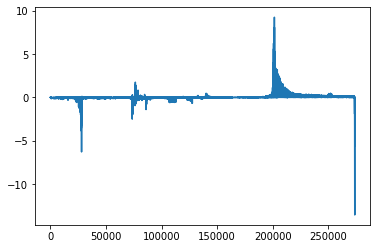

In [29]:
import matplotlib.pyplot as plt
plt.plot(list(fraction['TotalPM25'] - bio['TotalPM25'] - concentration_production.sum(axis=1)))
plt.show()

In [7]:
fraction['con_pro'] = concentration_production.sum(axis=1)
fraction['diff'] = fraction['TotalPM25'] - bio['TotalPM25'] - concentration_production.sum(axis=1)

In [33]:
fraction['ROW'] = concentration_production['ROW']

<AxesSubplot:>

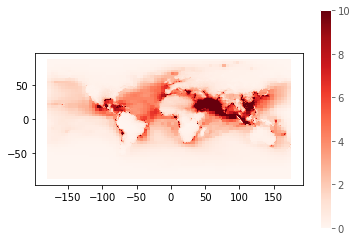

In [38]:
fig, ax = plt.subplots(1, 1)
mpl.rcParams['figure.figsize']=(20,9)
mpl.style.use('ggplot')
fraction.plot(linewidths=0,column='ROW',ax=ax,legend=True,vmin=0, vmax=10,cmap = 'Reds')

In [11]:
a = (fraction['TotalPM25'] - bio['TotalPM25'] + concentration_production.sum(axis=1))/2

In [14]:
percent_diff = list((fraction['TotalPM25'] - bio['TotalPM25'] - concentration_production.sum(axis=1))/a)

In [21]:
np.mean(np.abs(percent_diff)),np.max(np.abs(percent_diff))

(0.0020231735438945653, 0.2907559507564615)

<AxesSubplot:>

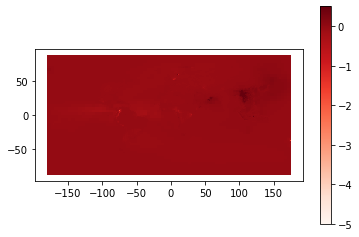

In [10]:
fig, ax = plt.subplots(1, 1)
fraction.plot(linewidths=0,column='diff',ax=ax,legend=True,vmin=-5, vmax=0.5,cmap = 'Reds')

In [158]:
diff = list(fraction['TotalPM25'] - bio['TotalPM25'] - concentration_production.sum(axis=1))
diff_index = []
for i in range(len(fraction)):
    if abs(diff[i]) > 5:
        diff_index.append(i)

In [168]:
len(diff_index)

91

In [160]:
country_classify = pd.read_csv('C:/Users/15311/Desktop/country_classify.csv',index_col=0)

In [167]:
country_classify.iloc[diff_index[50:100]]

AllCause   BasePM25       NH3        NOx      PNH4       PNO3  \
201502       0.0  23.875244  0.393003  13.127577  0.275308  12.068150   
201503       0.0  23.875244  0.429766  14.348162  0.301062  13.190231   
201504       0.0  23.875244  0.452946  15.140105  0.317300  13.918263   
201505       0.0  29.427797  0.266021   9.711273  0.279763  10.696953   
201506       0.0  29.427797  0.241800   8.824537  0.254291   9.720214   
201830       0.0  45.486824  0.322775  10.122129  0.199925   9.412681   
273661       0.0   2.423264  0.000834   0.068852  0.000195   0.009391   
273662       0.0   2.423264  0.000849   0.071832  0.000199   0.009797   
273672       0.0   2.423264  0.000823   0.075246  0.000193   0.010263   
273673       0.0   2.423264  0.000842   0.078174  0.000197   0.010662   
273674       0.0   2.423264  0.000849   0.078650  0.000199   0.010727   
273675       0.0   2.423264  0.000842   0.077196  0.000197   0.010529   
273676       0.0   2.423264  0.000824   0.074760  0.000193   0.010197   
273679       0.0   2.423264  0.000779   0.069770  0.000182   0.009516   
273682       0.0   2.423264  0.000830   0.078618  0.000194   0.010723   
273683       0.0   2.423264  0.000848   0.081641  0.000199   0.011135   
273684       0.0   2.423264  0.000847   0.081301  0.000198   0.011089   
273685       0.0   2.423264  0.000832   0.078395  0.000195   0.010693   
273686       0.0   2.423264  0.000800   0.073687  0.000187   0.010050   
273692       0.0   2.589360  0.000614   0.051261  0.000159   0.008429   
273699       0.0   2.423264  0.000762   0.068898  0.000179   0.009397   
273700       0.0   2.423264  0.000809   0.074754  0.000189   0.010196   
273701       0.0   2.423264  0.000839   0.079693  0.000196   0.010870   
273702       0.0   2.423264  0.000847   0.081260  0.000198   0.011083   
273703       0.0   2.423264  0.000832   0.079353  0.000195   0.010823   
273704       0.0   2.423264  0.000806   0.075235  0.000189   0.010262   
273705       0.0   2.423264  0.000740   0.066967  0.000173   0.009134   
273710       0.0   2.423264  0.000734   0.067257  0.000172   0.009173   
273711       0.0   2.423264  0.000787   0.073900  0.000184   0.010079   
273712       0.0   2.423264  0.000795   0.075835  0.000186   0.010343   
273713       0.0   2.423264  0.000790   0.075735  0.000185   0.010330   
273714       0.0   2.423264  0.000748   0.070773  0.000175   0.009653   
273715       0.0   2.423264  0.000732   0.067889  0.000171   0.009260   
273717       0.0   2.423264  0.000659   0.062757  0.000154   0.008560   
273718       0.0   2.423264  0.000714   0.068256  0.000167   0.009310   
273722       0.0   2.589360  0.000475   0.046347  0.000123   0.007621   
273723       0.0   2.423264  0.000668   0.064298  0.000156   0.008770   
273724       0.0   2.423264  0.000569   0.055550  0.000133   0.007577   
273725       0.0   2.423264  0.000616   0.059890  0.000144   0.008169   
273737       0.0   2.423264  0.000397   0.039902  0.000093   0.005442   
273738       0.0   2.423264  0.000458   0.044527  0.000107   0.006073   

            PSO4        SOA       SOx  TotalPM25      TotalPop  TotalPopD  \
201502  0.111035   9.797612  0.000088  42.627639   1449.167643        0.0   
201503  0.119156  10.797965  0.000293  46.246023   5487.235805        0.0   
201504  0.124512  11.436012  0.000326  48.682513   2438.248504        0.0   
201505  0.095049  13.396866  0.003639  39.450715  30045.514086        0.0   
201506  0.087467  12.105466  0.003559  35.964527   4639.326268        0.0   
201830  0.082374   7.357589  0.000901  31.731793  85943.639729        0.0   
273661  0.000498   0.066034  0.000035   0.106101  31618.399117        0.0   
273662  0.000502   0.070232  0.000039   0.110828  25340.381366        0.0   
273672  0.000468   0.067736  0.000049   0.107012  30633.433156        0.0   
273673  0.000474   0.071637  0.000055   0.111572  38716.617632        0.0   
273674  0.000477   0.073407  0.000057   0.113411  15891.594142        0.0   
273675  0.000472 